# 数据预处理

## 去除未标注的图片
为了节省时间，往往将图片分发给多个人标注。由于少量图片存在模糊、倾斜、重复等情况而未被标注，所以标签个数小于等于图片个数。当将标注好的图片以及标签汇总的时候，可以用这里的代码将多余的图片移动到其他地方。

In [4]:
import os, shutil

'''
默认图片名称与标签名称一致。
默认该文件与待处理文件夹处于同一目录下。
'''

base = os.getcwd()
label_file = os.path.join(base, '镀锌数据集标注')#标签所在文件夹
img_file  = os.path.join(base, '镀锌数据集图片')#图片所在文件夹
dstfile = os.path.join(base, '冗余图片与标注')#多余图片输出目标文件夹
if not os.path.exists(dstfile):
    os.mkdir(dstfile)
    
labels = os.listdir(label_file)
imgs = os.listdir(img_file)

labels.sort()
imgs.sort()
print('标签个数：{}个，图片张数：{}张'.format(len(labels), len(imgs)))
diff_list = []

for i in labels:
    for j in imgs:
        if i[:-5] == j[:-4]:#标签后缀为.json，图片后缀为.jpg
            imgs.remove(j)

for i in imgs:
    imgsrc = os.path.join(img_file, i)
    shutil.move(imgsrc, dstfile)#移动文件

print('移动图片张数：{}张'.format(len(imgs)))

标签个数：548个，图片张数：548张
移动图片张数：0张


## 绘制字符统计图
从标注文件中统计每个字符的个数，并绘制成统计图。

In [5]:
import json
import os
import matplotlib.pylab as plt

#files = ['角铁数据集标注', '剩余数据集标注', '镀锌数据集标注']
files = [ '镀锌数据集标注']
base = os.getcwd()
char_dic = {}#字符字典
for file in files:
    file_path = os.path.join(base, file)#文件路径
    files_json = os.listdir(file_path)#得到文件中所有json文件的名字
    for json_file in files_json:
        json_full_path = os.path.join(file_path, json_file)#得到每个json文件的完整路径
        with open(json_full_path, 'rb') as json_file:#打开json文件
            json_dic = json.load(json_file)#加载json的内容
            for shape in json_dic['shapes']:#标签块保存在shaps中
                label = shape['label']#取到每个块的内容，方便后续统计。
                if file == '角铁数据集标注':#老的标注
                    char_dic.setdefault(label, 0)#如果键不存在于字典中，将会添加并将值设为默认值
                    char_dic[label] += 1#内容计数
                else:
                    for char in label:
                        char_dic.setdefault(char, 0)
                        char_dic[char] += 1#内容计数

print(char_dic)

{'f': 39, '&': 492, 'm': 380, 'l': 365, '-': 731, 'h': 755, 'v': 394, 'd': 380, 'c': 525, 'z': 160, 'e': 123, '2': 722, '3': 251, '7': 204, '*': 50, '6': 156, 'j': 498, 'p': 328, '4': 162, '1': 634, '0': 137, '5': 326, 'b': 39, '8': 161, 'a': 138, 'n': 8, '9': 110, 'y': 99, 'i': 20, 'x': 32, 's': 46, 'g': 16, 'k': 42, 'r': 7, 'q': 1, 't': 1, "'": 1}


In [6]:
def visualization(dictionary, save_name='未指定名称',verbose=True):
    """
    visualize：输入待统计的字典，输出直方图并可视化，将得到的直方图保存到同一目录下。
    
    输入：
    -dictionary：字典       -输入需要可视化的字典，键为横坐标字符串，值为纵坐标数值。
    -save_name：字符串      -需要保存的统计图的名称
    -verbose：布尔值        -是否在统计图上显示统计数字，默认为显示
    """
    sorted_list = sorted(dictionary.items(), key=lambda item: item[0]) #sort方法用于对原列表进行排序，key用来进行比较的元素
    x_num = range(len(sorted_list))
    x_label = [x[0] for x in sorted_list]
    y_data = [x[1] for x in sorted_list]
    plt.xticks(x_num, x_label)
    b = plt.bar(x_label, y_data)
    if verbose:
        for rect in b:
            h = rect.get_height()#统计个数
            w = rect.get_width()
            x = rect.get_x()
            plt.text(x+w/2, h, '%d'%int(h), ha='center', va='bottom')

    str_sum = '标签总数：{}个'.format(sum(y_data))
    plt.xlabel('标签名')
    plt.ylabel('标签个数')
    plt.title(str_sum)#设置图表标题
    print(str_sum)#数据总量1371为box个数
    plt.savefig(save_name)
    plt.show()

标签总数：8533个


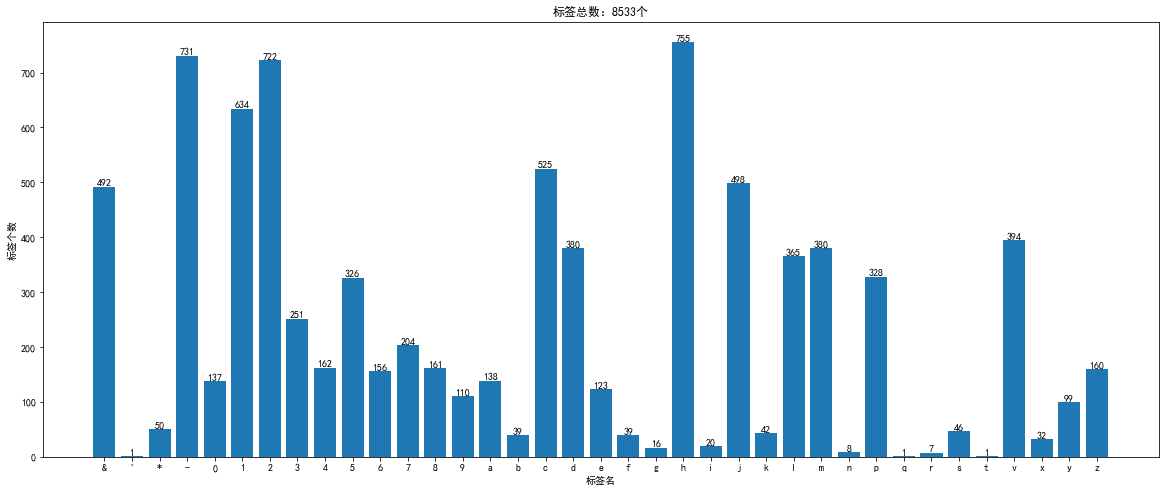

In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'#最近邻插值：像素为正方形
plt.rcParams['image.cmap'] = 'gray'#使用灰度输出而不是彩色输出
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签

visualization(char_dic, save_name='所有类别统计图.png',verbose=True)

合并同类项。其中新标注的数据里用&代替TC。

标签总数：8533个


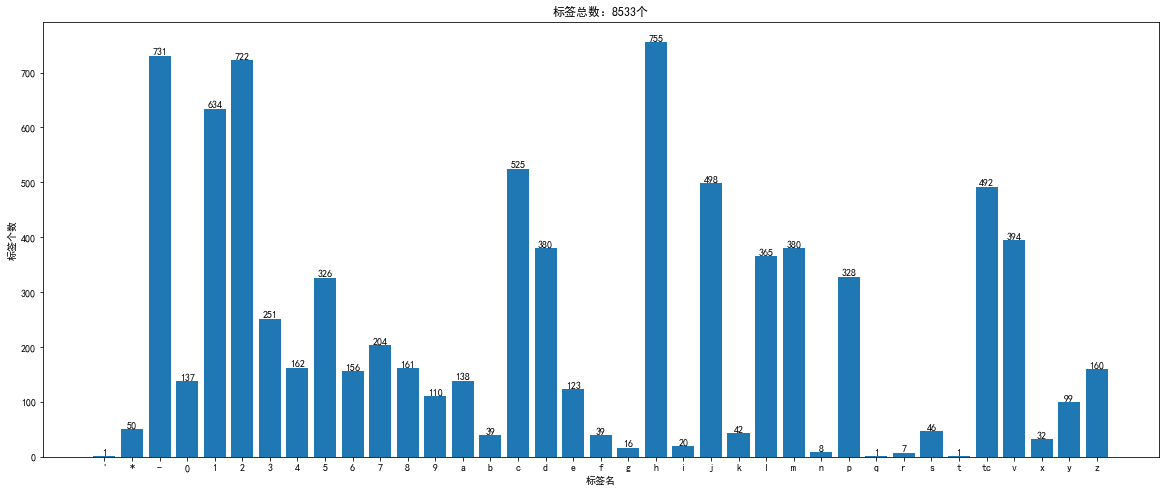

In [8]:
merged_dic = char_dic.copy()
if 'ct' in  merged_dic:
    merged_dic['tc'] += merged_dic['ct']#将ct类别合并到tc
    del merged_dic['ct']
for i, j in char_dic.items():
    l_list = i.split('_',1)
    if l_list[0].isupper():#把大写变成小写
        l_list[0] = l_list[0].lower()
        try:
            merged_dic[l_list[0]] += j
        except:
            merged_dic.setdefault(l_list[0], j)
        del merged_dic[i]
    if len(l_list) > 1:#例如c、c_f、c_n会被合并到一起
        merged_dic[l_list[0]] += j
        del merged_dic[i]

merged_dic.setdefault('tc', 0) 
merged_dic['tc'] += merged_dic['&']#将tc与&合并
del merged_dic['&']

visualization(merged_dic, save_name='合并统计图.png')

剔除数目少于50以及标签为box的类别。

标签总数：8281个


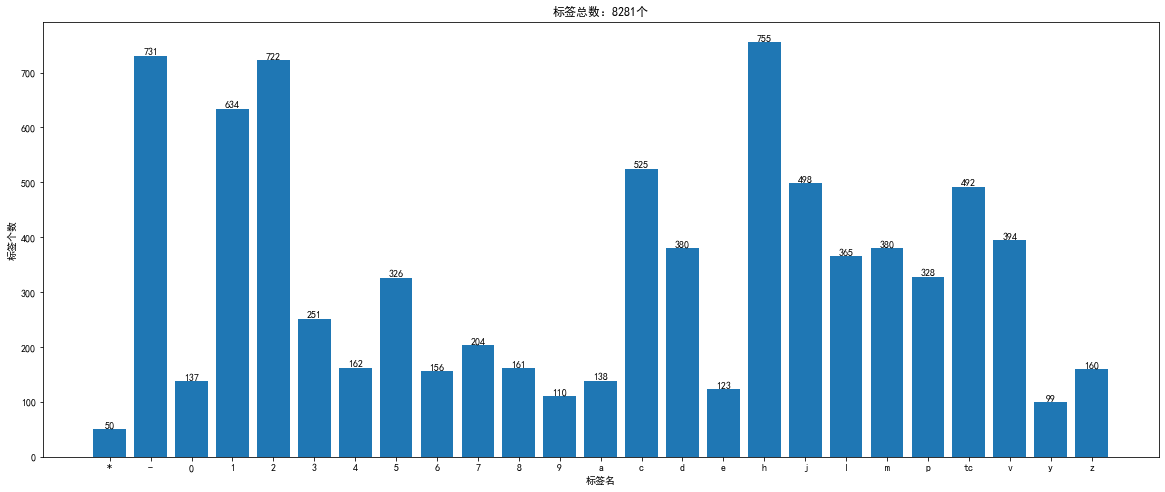

In [9]:
simplified_dic = merged_dic.copy()
if 'box'in simplified_dic: del simplified_dic['box']
new_dic = {}
for i, j in simplified_dic.items():
    if j >= 50:
        new_dic[i] = j

visualization(new_dic, save_name='50阈值统计图.png')

## 转换标注格式
处理Labelme得到的json文件，输出单个字符以及字符串图片。

In [10]:
import json
import json
import os.path

#import cv2#透视变换

from skimage import io
import numpy as np
from labelme import utils

def get_box_with_label(shapes, is_char=True):
    '''
    依据标注块的标签长度，将每个标注块等分，返回每个字符的标签以及字符的坐标。
    
    输入：
    -shapes:字典          -单个json文件里的shapes字典，包括该图片内的所有矩形框。
    
    输出：
    -annotations：字典    -键：表示区域的标号，范围：[0, N)，代表这张图片里有N个字符区域。
                        值：是一个列表list，list[0]为字符标签，list[1]为字符在图像中的左上角与右下角坐标。
    '''
    annotations = {}
    idx = 0
    for i in range(len(shapes)):
        pts = np.array(shapes[i]['points']).astype(np.int32)#坐标
        string = shapes[i]['label'].lower()#标签
        string = string.split('_')[0]#标签，去除类似c_n这种标注
        string = string.replace('*','%') # 将字符串里的*全部替换成%
        string = string.replace(' ','') # 将字符串里的空格删除
        if string == 'box':#跳过老的标注框
            continue
        if string == 'tc' or string == 'ct':#修改老的标注
            string = '&'
        
        if is_char and len(string)>1 or string=='%':
            if len(pts) == 2:
                pts_x = pts[:, 0]#所有点的x坐标
                pts_y = pts[:, 1]#所有点的y坐标
            else:
                pts_x = [min(pts[:, 0]), max(pts[:, 0])]#所有点的x坐标
                pts_y = [min(pts[:, 1]), max(pts[:, 1])]#所有点的y坐标
            img_width = np.abs(pts_x[0] - pts_x[1])#区域宽度
            '''if string == '%':
                img_height = np.abs(pts_y[0] - pts_y[1])#区域高度
                string = '%' * (img_height // img_width * 2)#按照区域长宽比增加标签'''
            box_width = img_width // len(string)  # 分割的单个box的宽度
            pts_label = np.array([[min(pts_x) + box_width, min(pts_y)],
                                 [min(pts_x), max(pts_y)]])#右上角与左下角坐标

            for label in string:
                annotations[idx] = [label, pts_label.copy()]
                idx += 1
                pts_label[:, 0] += box_width  # update box
        else:
            annotations[i] = [string, pts.copy()]#右上角与左下角坐标（或左上角与右下角坐标）。
        
    return annotations

def image_crop(img, annotations):
    '''
    输入图片以及标记信息，返回切割后的图片的集合。
    
    输入：
    -img：图片            -image = utils.img_b64_to_arr(json_data['imageData'])
    -annotations：字典    -键：表示区域的标号，范围：[0, N)，代表这张图片里有N个字符区域。
                        值：是一个列表list，list[0]为字符标签，
                        list[1]为字符在图像中的右上角与左下角坐标（或左上角与右下角坐标）。
    
    输出：
    -img_set：字典        -键：表示图片的标号，范围：[0, N)，代表这张图片里有N个字符区域。
                        值：是一个列表list，list[0]为图片标签，list[1]为裁剪后的图片。
    '''
    img_set = {}
    for idx, values in annotations.items():
        label, pts = values
        points_h = pts[:, 1]
        points_w = pts[:, 0]

        img_cropped = img[np.min(points_h):np.max(points_h), np.min(points_w):np.max(points_w), :]
        img_set[idx] = [label, img_cropped]
    return img_set

def img_generator(json_dir, output_dir, is_char=True, img_try = True, verbose=True, try_num=3):
    '''
    输入json所在文件路径以及输出图片文件路径，返回切割后的图片到输出文件中。
    
    输入：
    -json_dir：字符串     -json所在文件夹的全路径
    -output_dir：字符串   -键：输出文件夹的名称，与该notebook处于同一目录。
    -is_char：布尔值      -True：切割后的图片为单个字符；False：切割后的图片为字符串
    -img_try：布尔值      -True：尝试处理前三张图片方便debug；False：处理所有图片，比较耗时
    -verbose：布尔值      -True：打印输出信息；False：不打印信息
    '''
    json_file_list = os.listdir(json_dir)

    #读取labelme标注
    if img_try:#尝试输出前N张图片的结果
        json_file_list = json_file_list[:try_num]
    for i in range(len(json_file_list)):
        json_filename = json_file_list[i]
        if verbose:
                print('正在处理第{}张图片，文件名为{}'.format(i, json_filename))
        json_file = open(os.path.join(json_dir, json_filename))
        json_data = json.load(json_file)

        image = utils.img_b64_to_arr(json_data['imageData'])#解析原图片数据
        shapes = json_data['shapes']

        json_file.close()

        annotations = get_box_with_label(shapes, is_char=is_char)
        image_set = image_crop(image, annotations)

        for i,(label, img) in image_set.items():
        #for label, img in image_set.values():
            label = label.replace('*','%') # 将字符串里的*全部替换成%
            filename = f'{label}_{json_filename[:-5]}_{i}.jpg'
            if not os.path.exists(os.path.join(output_dir, filename)):
                try:
                    #print(f'Creating {filename}')
                    io.imsave(os.path.join(output_dir, filename), img)
                except:
                    print('创建{}失败，数据来源{}。该标注可能不符合要求！'.format(filename, json_filename))
                    
            else:
                if verbose:
                    print(f'{filename} already existed!')

In [11]:
base = os.getcwd()
dir_list = [ '镀锌数据集标注/',  '剩余数据集标注/', '角铁数据集标注/']
output_dir = os.path.join(base, 'data_cropped/')#输出图片位置
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

for file in dir_list:
    print('正在处理:{}'.format(file[:-1]))
    json_dir = os.path.join(base, file)#json所在位置
    #先得到单个字符的图片
    #img_generator(json_dir, output_dir, is_char=True, img_try = True, verbose=True, try_num=5)#实验
    img_generator(json_dir, output_dir, is_char=True, img_try = False, verbose=False)

dir_list = [ '镀锌数据集标注/',  '剩余数据集标注/']#当要用这里的方法切取字符串图片时，避免老的数据
for file in dir_list:
    print('正在处理:{}'.format(file[:-1]))
    json_dir = os.path.join(base, file)#json所在位置
    #先得到单个字符的图片
    #img_generator(json_dir, output_dir, is_char=False, img_try = True, verbose=True, try_num=3)#实验
    img_generator(json_dir, output_dir, is_char=False, img_try = False, verbose=False)


正在处理:镀锌数据集标注


C:\Users\FCT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:121: UserWarning: E:\研二\20.19.10.1计算机视觉入门\铁塔项目标注\铁塔项目方案\数据集2020331\data_cropped/m_IMG_20200327_142326_0.jpg is a low contrast image
C:\Users\FCT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:121: UserWarning: E:\研二\20.19.10.1计算机视觉入门\铁塔项目标注\铁塔项目方案\数据集2020331\data_cropped/l_IMG_20200327_142326_1.jpg is a low contrast image
C:\Users\FCT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:121: UserWarning: E:\研二\20.19.10.1计算机视觉入门\铁塔项目标注\铁塔项目方案\数据集2020331\data_cropped/-_IMG_20200327_143100_3.jpg is a low contrast image


正在处理:剩余数据集标注


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'E:\\研二\\20.19.10.1计算机视觉入门\\铁塔项目标注\\铁塔项目方案\\数据集2020331\\剩余数据集标注/'

<p>分别生成生成训练集与验证集的<code> groundTruth.txt </code>文件，此时，<code>groundTruth.txt</code> 应该为 <code>{图片路径}/t制表符{标签}/n回车</code> <br>
例如：</p>
<pre><code>test/word_1.png Tiredness
test/word_2.png kills
test/word_3.png A
...
</code></pre>

In [3]:
base = os.getcwd()
imgs_file = 'data_cropped/'
imgs_dir = os.path.join(base, imgs_file)#图片位置
gt_train = 'gt_train.txt'
gt_val = 'gt_val.txt'

imgs_list = os.listdir(imgs_dir)
print('图片张数：{}张'.format(len(imgs_list)))

data_dic = {}#键：标签；值：列表，列表内为属于该标签的所有图片历经，例如：[path/1.jpg,path/2.jpg]
train_dic = {}
val_dic = {}
for img_name in imgs_list:
    label = img_name.split('_')[0]#得到标签
    data_dic.setdefault(label, [])#设定初始值为空列表
    data_dic[label].append(imgs_file + img_name)

for label, x_list in data_dic.items():#将数据随机按0.92:0.08的比例分为训练集与验证集
    num = len(x_list)
    if num < 50:#样本太少的不加入验证集
        train_dic[label] = x_list
        continue
    mask = np.arange(num)
    np.random.shuffle(mask)#打乱数据
    train_idx = mask[:int(num*0.92)]
    val_idx = mask[int(num*0.92):]
    for idx in train_idx:
        train_dic.setdefault(label, [])#设定初始值为空列表
        train_dic[label].append(x_list[idx])
    for idx in val_idx:
        val_dic.setdefault(label, [])#设定初始值为空列表
        val_dic[label].append(x_list[idx])

with open(gt_train, "w") as f:#将train_dic的数据写入到记事本
    for label, train_list in train_dic.items():
        for img_dir in train_list:
            f.write('{}\t{}\n'.format(img_dir, label))

with open(gt_val, "w") as f:#将val_dic的数据写入到记事本
    for label, val_list in val_dic.items():
        for img_dir in val_list:
            f.write('{}\t{}\n'.format(img_dir, label))

图片张数：28835张


将图片与groundTruth.txt文件转换为lmdb格式的训练数据。

In [1]:
""" a modified version of CRNN torch repository https://github.com/bgshih/crnn/blob/master/tool/create_dataset.py """

import fire
import os
import lmdb
import cv2

import numpy as np


def checkImageIsValid(imageBin):
    if imageBin is None:
        return False
    imageBuf = np.frombuffer(imageBin, dtype=np.uint8)
    img = cv2.imdecode(imageBuf, cv2.IMREAD_GRAYSCALE)
    imgH, imgW = img.shape[0], img.shape[1]
    if imgH * imgW == 0:
        return False
    return True


def writeCache(env, cache):
    with env.begin(write=True) as txn:
        for k, v in cache.items():
            txn.put(k, v)


def createDataset(inputPath, gtFile, outputPath, checkValid=True, map_size=8589934592):
    """
    Create LMDB dataset for training and evaluation.
    ARGS:
        inputPath  : input folder path where starts imagePath
        outputPath : LMDB output path
        gtFile     : list of image path and label
        checkValid : if true, check the validity of every image
    """
    os.makedirs(outputPath, exist_ok=True)
    env = lmdb.open(outputPath, map_size=map_size)#85899345920/8Gb
    cache = {}
    cnt = 1

    with open(gtFile, 'r', encoding='utf-8') as data:
        datalist = data.readlines()

    nSamples = len(datalist)
    for i in range(nSamples):
        print(datalist[i])
        imagePath, label = datalist[i].strip('\n').split('\t')
        imagePath = os.path.join(inputPath, imagePath)

        # # only use alphanumeric data
        # if re.search('[^a-zA-Z0-9]', label):
        #     continue

        if not os.path.exists(imagePath):
            print('%s does not exist' % imagePath)
            continue
        with open(imagePath, 'rb') as f:
            imageBin = f.read()
        if checkValid:
            try:
                if not checkImageIsValid(imageBin):
                    print('%s is not a valid image' % imagePath)
                    continue
            except:
                print('error occured', i)
                with open(outputPath + '/error_image_log.txt', 'a') as log:
                    log.write('%s-th image data occured error\n' % str(i))
                continue

        imageKey = 'image-%09d'.encode() % cnt
        labelKey = 'label-%09d'.encode() % cnt
        cache[imageKey] = imageBin
        cache[labelKey] = label.encode()

        if cnt % 1000 == 0:
            writeCache(env, cache)
            cache = {}
            print('Written %d / %d' % (cnt, nSamples))
        cnt += 1
    nSamples = cnt-1
    cache['num-samples'.encode()] = str(nSamples).encode()
    writeCache(env, cache)
    print('Created dataset with %d samples' % nSamples)

生成训练集的lmdb文件。查看训练集图片所在文件夹的大小，将map_size设置一样的大小即可。

In [6]:
inputPath = ''
gtFile_train = 'gt_train.txt'
outputPath_trainset = 'Lmdb_trainset/'
if not os.path.exists(outputPath_trainset):
    os.mkdir(outputPath_trainset)

map_size = 0.57 * 1e9#1e9为953MB
createDataset(inputPath, gtFile_train, outputPath_trainset, checkValid=True, map_size=map_size)

data_cropped/%%%a%%%%_IMG_20200327_144010_0.jpg	%%%a%%%%

data_cropped/%%%a%_IMG_20200327_144130_2.jpg	%%%a%

data_cropped/%%%a-%%%_IMG_20200327_143948_0.jpg	%%%a-%%%

data_cropped/%%%h_IMG_20200327_144638_2.jpg	%%%h

data_cropped/%%%_IMG_20200327_140725_0.jpg	%%%

data_cropped/%%-hvdc-jp1_IMG_20200327_142846_0.jpg	%%-hvdc-jp1

data_cropped/%%-hvdc-jp1_IMG_20200327_142903_0.jpg	%%-hvdc-jp1

data_cropped/%%l_IMG_20200327_142705_0.jpg	%%l

data_cropped/%%_IMG_20200327_140049_0.jpg	%%

data_cropped/%%_IMG_20200327_142839_0.jpg	%%

data_cropped/%375_IMG_20200327_142431_1.jpg	%375

data_cropped/%vdc-ze2_IMG_20200327_143253_1.jpg	%vdc-ze2

data_cropped/%_IMG_20200327_142431_12.jpg	%

data_cropped/%_IMG_20200327_144007_5.jpg	%

data_cropped/%_IMG_20200327_142705_0.jpg	%

data_cropped/%_IMG_20200327_144007_8.jpg	%

data_cropped/%_IMG_20200327_144010_4.jpg	%

data_cropped/%_IMG_20200327_140304_2.jpg	%

data_cropped/%_IMG_20200327_140542_1.jpg	%

data_cropped/%_IMG_20200327_140049_1.jpg	%

data_


data_cropped/&2e3a-sz_IMG_2651_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_2019-10-26 115155_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2627_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2673_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2685_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2666_1.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2667_2.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2687_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2665_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2675_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_2019-10-26 115103_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_2019-10-26 115404_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2624_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2704_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2697_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2703_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2684_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2646_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2635_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_2019-10-26 115110_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_2


data_cropped/&b_IMG_2561_2.jpg	&b

data_cropped/&b_20191026_110309_2.jpg	&b

data_cropped/&b_IMG_2514_2.jpg	&b

data_cropped/&b_IMG_2607_2.jpg	&b

data_cropped/&b_IMG_2566_2.jpg	&b

data_cropped/&b_IMG_2597_2.jpg	&b

data_cropped/&b_IMG_2508_3.jpg	&b

data_cropped/&b_IMG_2585_2.jpg	&b

data_cropped/&b_IMG_2580_2.jpg	&b

data_cropped/&b_IMG_2571_2.jpg	&b

data_cropped/&b_IMG_2559_2.jpg	&b

data_cropped/&b_IMG_2484_2.jpg	&b

data_cropped/&b_IMG_2541_2.jpg	&b

data_cropped/&b_IMG_2553_2.jpg	&b

data_cropped/&b_IMG_2497_2.jpg	&b

data_cropped/&b_IMG_2466_2.jpg	&b

data_cropped/&b_2019-10-26 110744_2.jpg	&b

data_cropped/&b_IMG_2502_2.jpg	&b

data_cropped/&b_IMG_2586_2.jpg	&b

data_cropped/&b_IMG_2583_2.jpg	&b

data_cropped/&b_IMG_2517_2.jpg	&b

data_cropped/&b_IMG_20200327_140707_2.jpg	&b

data_cropped/&b_IMG_2483_2.jpg	&b

data_cropped/&b_IMG_2528_2.jpg	&b

data_cropped/&b_IMG_2474_2.jpg	&b

data_cropped/&b_IMG_2521_2.jpg	&b

data_cropped/&b_IMG_2491_2.jpg	&b

data_cropped/&b_IMG_2504_2.


data_cropped/&ml-hvdc-jp2_IMG_20200327_141348_0.jpg	&ml-hvdc-jp2

data_cropped/&ml-hvdc-jp2_IMG_20200327_141355_0.jpg	&ml-hvdc-jp2

data_cropped/&ml-hvdc-jp2_IMG_20200327_141500_1.jpg	&ml-hvdc-jp2

data_cropped/&ml-hvdc-jp2_IMG_20200327_141506_0.jpg	&ml-hvdc-jp2

data_cropped/&ml-hvdc-jp2_IMG_20200327_141623_0.jpg	&ml-hvdc-jp2

data_cropped/&ml-hvdc-jp2_IMG_20200327_141658_1.jpg	&ml-hvdc-jp2

data_cropped/&ml-hvdc-jp2_IMG_20200327_141715_0.jpg	&ml-hvdc-jp2

data_cropped/&ml-hvdc-jp2_IMG_20200327_141738_1.jpg	&ml-hvdc-jp2

data_cropped/&ml-hvdc-jp2_IMG_20200327_142204_0.jpg	&ml-hvdc-jp2

data_cropped/&ml-hvdc-jp2_IMG_20200327_142214_0.jpg	&ml-hvdc-jp2

data_cropped/&ml-hvdc-jp2_IMG_20200327_142218_0.jpg	&ml-hvdc-jp2

data_cropped/&ml-hvdc-jp2_IMG_20200327_142230_0.jpg	&ml-hvdc-jp2

data_cropped/&ml-hvdc-jp2_IMG_20200327_142240_0.jpg	&ml-hvdc-jp2

data_cropped/&ml-hvdc-jp2_IMG_20200327_142250_0.jpg	&ml-hvdc-jp2

data_cropped/&ml-hvdc-jp2_IMG_20200327_142258_0.jpg	&ml-hvdc-jp2

data_crop


data_cropped/&ml_IMG_20200327_142936_0.jpg	&ml

data_cropped/&ml_IMG_20200327_142939_0.jpg	&ml

data_cropped/&ml_IMG_20200327_142945_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143000_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143015_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143028_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143203_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143209_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143218_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143248_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143253_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143300_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143340_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143402_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143418_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143422_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143442_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143502_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143509_0.jpg	&ml

data_cropped/&ml_IMG_20200327_143529_0.jpg	&ml

data_cropped/&ml_IMG_20200327_145002_0.


data_cropped/&yj-jc27151a_IMG_20200327_144322_0.jpg	&yj-jc27151a

data_cropped/&yj-jc27151a_IMG_20200327_144408_0.jpg	&yj-jc27151a

data_cropped/&yj-jc27151a_IMG_20200327_142808_0.jpg	&yj-jc27151a

data_cropped/&yj-jc27151a_IMG_20200327_142844_0.jpg	&yj-jc27151a

data_cropped/&yj-jc27151a_IMG_20200327_143620_0.jpg	&yj-jc27151a

data_cropped/&yj-jc27151a_IMG_20200327_142812_0.jpg	&yj-jc27151a

data_cropped/&yj-jc27151a_IMG_20200327_144336_0.jpg	&yj-jc27151a

data_cropped/&yj-jc27151a_IMG_20200327_144659_0.jpg	&yj-jc27151a

data_cropped/&yj-jc27151a_IMG_20200327_144715_0.jpg	&yj-jc27151a

data_cropped/&yj-jc27151a_IMG_20200327_144034_0.jpg	&yj-jc27151a

data_cropped/&yj-jc2_IMG_20200327_143540_0.jpg	&yj-jc2

data_cropped/&yj-jc2_IMG_20200327_143544_0.jpg	&yj-jc2

data_cropped/&yj-jc2_IMG_20200327_144431_0.jpg	&yj-jc2

data_cropped/&yj_IMG_20200327_143656_0.jpg	&yj

data_cropped/&yj_IMG_20200327_143702_0.jpg	&yj

data_cropped/&yj_IMG_20200327_143707_0.jpg	&yj

data_cropped/&yj_IMG_202003


data_cropped/&_IMG_2545_4.jpg	&

data_cropped/&_IMG_20200327_141620_1.jpg	&

data_cropped/&_IMG_20200327_141926_1.jpg	&

data_cropped/&_IMG_20200327_144336_0.jpg	&

data_cropped/&_IMG_20200327_144654_0.jpg	&

data_cropped/&_IMG_2546_12.jpg	&

data_cropped/&_20191026_113121_17.jpg	&

data_cropped/&_IMG_2649_0.jpg	&

data_cropped/&_IMG_2694_0.jpg	&

data_cropped/&_2019-10-26 114607_11.jpg	&

data_cropped/&_IMG_20200327_144130_0.jpg	&

data_cropped/&_IMG_20200327_144424_0.jpg	&

data_cropped/&_20191026_111738_11.jpg	&

data_cropped/&_IMG_2681_0.jpg	&

data_cropped/&_IMG_2576_13.jpg	&

data_cropped/&_20191026_113621_15.jpg	&

data_cropped/&_2019-10-26 114122_14.jpg	&

data_cropped/&_IMG_2518_16.jpg	&

data_cropped/&_IMG_20200327_143302_0.jpg	&

data_cropped/&_20191026_113528_15.jpg	&

data_cropped/&_IMG_20200327_141046_1.jpg	&

data_cropped/&_20191026_120536_15.jpg	&

data_cropped/&_IMG_20200327_141338_1.jpg	&

data_cropped/&_IMG_20200327_140119_1.jpg	&

data_cropped/&_20191026_120229_15.


data_cropped/&_IMG_20200327_143954_9.jpg	&

data_cropped/&_IMG_2586_16.jpg	&

data_cropped/&_2019-10-26 103949_11.jpg	&

data_cropped/&_IMG_20200327_141847_1.jpg	&

data_cropped/&_2019-10-26 120932_12.jpg	&

data_cropped/&_IMG_2558_15.jpg	&

data_cropped/&_IMG_20200327_144933_0.jpg	&

data_cropped/&_IMG_20200327_140644_0.jpg	&

data_cropped/&_2019-10-26 115103_0.jpg	&

data_cropped/&_20191026_113237_17.jpg	&

data_cropped/&_20191026_113425_15.jpg	&

data_cropped/&_IMG_20200327_140504_1.jpg	&

data_cropped/&_2019-10-26 103955_11.jpg	&

data_cropped/&_IMG_2683_0.jpg	&

data_cropped/&_2019-10-26 121830_14.jpg	&

data_cropped/&_IMG_2628_0.jpg	&

data_cropped/&_2019-10-26 122443_4.jpg	&

data_cropped/&_20191026_113627_15.jpg	&

data_cropped/&_IMG_20200327_143702_0.jpg	&

data_cropped/&_IMG_2523_3.jpg	&

data_cropped/&_IMG_2642_0.jpg	&

data_cropped/&_IMG_2533_13.jpg	&

data_cropped/&_20191026_111446_11.jpg	&

data_cropped/&_IMG_20200327_142719_0.jpg	&

data_cropped/&_IMG_2540_4.jpg	&

data


data_cropped/&_2019-10-26 114506_10.jpg	&

data_cropped/&_IMG_2876_12.jpg	&

data_cropped/&_2019-10-26 114711_11.jpg	&

data_cropped/&_2019-10-26 121019_12.jpg	&

data_cropped/&_20191026_121033_15.jpg	&

data_cropped/&_20191026_115020_2.jpg	&

data_cropped/&_IMG_20200327_143008_0.jpg	&

data_cropped/&_20191026_121019_15.jpg	&

data_cropped/&_IMG_2663_2.jpg	&

data_cropped/&_2019-10-26 115404_0.jpg	&

data_cropped/&_20191026_121029_15.jpg	&

data_cropped/&_IMG_20200327_141914_1.jpg	&

data_cropped/&_2019-10-26 114719_14.jpg	&

data_cropped/&_20191026_115612_16.jpg	&

data_cropped/&_2019-10-26 121710_14.jpg	&

data_cropped/&_2019-10-26 115023_0.jpg	&

data_cropped/&_IMG_20200327_141230_0.jpg	&

data_cropped/&_2019-10-26 120121_14.jpg	&

data_cropped/&_IMG_2670_6.jpg	&

data_cropped/&_20191026_112929_3.jpg	&

data_cropped/&_20191026_105603_3.jpg	&

data_cropped/&_20191026_120722_15.jpg	&

data_cropped/&_2019-10-26 121751_14.jpg	&

data_cropped/&_IMG_20200327_144733_0.jpg	&

data_cropped/

data_cropped/&_IMG_2559_12.jpg	&

data_cropped/&_IMG_2694_2.jpg	&

data_cropped/&_IMG_20200327_143117_1.jpg	&

data_cropped/&_20191026_122115_15.jpg	&

data_cropped/&_IMG_2556_12.jpg	&

data_cropped/&_20191026_114421_17.jpg	&

data_cropped/&_IMG_2467_20.jpg	&

data_cropped/&_2019-10-26 114550_10.jpg	&

data_cropped/&_IMG_20200327_140225_16.jpg	&

data_cropped/&_IMG_2634_2.jpg	&

data_cropped/&_IMG_2875_12.jpg	&

data_cropped/&_IMG_2699_0.jpg	&

data_cropped/&_IMG_20200327_140439_1.jpg	&

data_cropped/&_IMG_20200327_140848_1.jpg	&

data_cropped/&_2019-10-26 114321_10.jpg	&

data_cropped/&_IMG_2709_3.jpg	&

data_cropped/&_IMG_2712_0.jpg	&

data_cropped/&_2019-10-26 120759_12.jpg	&

data_cropped/&_IMG_2492_12.jpg	&

data_cropped/&_20191026_120543_15.jpg	&

data_cropped/&_IMG_20200327_143656_0.jpg	&

data_cropped/&_IMG_2927_12.jpg	&

data_cropped/&_IMG_2645_2.jpg	&

data_cropped/&_IMG_20200327_140458_1.jpg	&

data_cropped/&_IMG_2535_3.jpg	&

data_cropped/&_IMG_20200327_141344_4.jpg	&

data


data_cropped/&_IMG_20200327_142214_0.jpg	&

data_cropped/&_20191026_113229_17.jpg	&

data_cropped/&_2019-10-26 115059_0.jpg	&

data_cropped/&_20191026_122200_15.jpg	&

data_cropped/&_IMG_20200327_142919_0.jpg	&

data_cropped/&_20191026_113331_17.jpg	&

data_cropped/&_2019-10-26 115642_0.jpg	&

data_cropped/&_IMG_2486_12.jpg	&

data_cropped/&_IMG_20200327_140515_1.jpg	&

data_cropped/&_IMG_20200327_145059_0.jpg	&

data_cropped/&_IMG_20200327_143213_0.jpg	&

data_cropped/&_IMG_20200327_140556_1.jpg	&

data_cropped/&_20191026_120742_14.jpg	&

data_cropped/&_IMG_20200327_143804_0.jpg	&

data_cropped/&_IMG_20200327_142609_0.jpg	&

data_cropped/&_IMG_20200327_141325_1.jpg	&

data_cropped/&_2019-10-26 120830_12.jpg	&

data_cropped/&_IMG_20200327_141112_1.jpg	&

data_cropped/&_IMG_20200327_140736_1.jpg	&

data_cropped/&_IMG_20200327_145234_0.jpg	&

data_cropped/&_IMG_2924_2.jpg	&

data_cropped/&_IMG_2517_15.jpg	&

data_cropped/&_IMG_20200327_143145_0.jpg	&

data_cropped/&_2019-10-26 115131_0.


data_cropped/&_IMG_2877_12.jpg	&

data_cropped/&_IMG_2707_1.jpg	&

data_cropped/&_IMG_2481_12.jpg	&

data_cropped/&_IMG_20200327_143108_1.jpg	&

data_cropped/&_IMG_20200327_143156_0.jpg	&

data_cropped/&_IMG_2711_0.jpg	&

data_cropped/&_IMG_2641_2.jpg	&

data_cropped/&_IMG_20200327_141610_1.jpg	&

data_cropped/&_IMG_20200327_142900_0.jpg	&

data_cropped/&_IMG_2587_15.jpg	&

data_cropped/&_20191026_110350_12.jpg	&

data_cropped/&_IMG_20200327_145146_0.jpg	&

data_cropped/&_IMG_2519_16.jpg	&

data_cropped/&_IMG_20200327_142750_0.jpg	&

data_cropped/&_IMG_20200327_140017_1.jpg	&

data_cropped/&_20191026_121723_15.jpg	&

data_cropped/&_IMG_2630_2.jpg	&

data_cropped/&_IMG_2705_1.jpg	&

data_cropped/&_IMG_20200327_145115_0.jpg	&

data_cropped/&_IMG_2856_18.jpg	&

data_cropped/&_IMG_2576_16.jpg	&

data_cropped/&_IMG_2648_0.jpg	&

data_cropped/&_IMG_20200327_142647_0.jpg	&

data_cropped/&_IMG_2564_15.jpg	&

data_cropped/&_IMG_20200327_143218_0.jpg	&

data_cropped/&_2019-10-26 115443_0.jpg	&



data_cropped/&_2019-10-26 121928_14.jpg	&

data_cropped/&_20191026_111504_11.jpg	&

data_cropped/&_2019-10-26 122439_4.jpg	&

data_cropped/&_IMG_2548_4.jpg	&

data_cropped/&_2019-10-26 120330_11.jpg	&

data_cropped/&_IMG_2688_0.jpg	&

data_cropped/&_IMG_20200327_141236_0.jpg	&

data_cropped/&_IMG_2604_14.jpg	&

data_cropped/&_IMG_2582_16.jpg	&

data_cropped/&_IMG_2708_3.jpg	&

data_cropped/&_20191026_120834_15.jpg	&

data_cropped/&_20191026_114405_16.jpg	&

data_cropped/&_2019-10-26 115119_0.jpg	&

data_cropped/&_IMG_20200327_140309_1.jpg	&

data_cropped/&_IMG_20200327_142138_0.jpg	&

data_cropped/&_2019-10-26 115436_0.jpg	&

data_cropped/&_IMG_20200327_141801_1.jpg	&

data_cropped/'_IMG_20200327_143029_16.jpg	'

data_cropped/-hvdc-jp1_IMG_20200327_141011_0.jpg	-hvdc-jp1

data_cropped/-hvdc-jp1_IMG_20200327_141016_2.jpg	-hvdc-jp1

data_cropped/-hvdc-jp1_IMG_20200327_142839_1.jpg	-hvdc-jp1

data_cropped/-hvdc-jp1_IMG_20200327_142903_4.jpg	-hvdc-jp1

data_cropped/-_IMG_20200327_144654_3


data_cropped/-_20191026_105642_13.jpg	-

data_cropped/-_IMG_2891_3.jpg	-

data_cropped/-_IMG_2910_3.jpg	-

data_cropped/-_IMG_2702_6.jpg	-

data_cropped/-_IMG_20200327_144638_3.jpg	-

data_cropped/-_IMG_20200327_141157_8.jpg	-

data_cropped/-_2019-10-26 122307_5.jpg	-

data_cropped/-_IMG_2663_7.jpg	-

data_cropped/-_IMG_2473_3.jpg	-

data_cropped/-_20191026_113055_3.jpg	-

data_cropped/-_IMG_20200327_140445_9.jpg	-

data_cropped/-_IMG_2639_5.jpg	-

data_cropped/-_20191026_112921_5.jpg	-

data_cropped/-_IMG_20200327_140622_9.jpg	-

data_cropped/-_IMG_20200327_142008_8.jpg	-

data_cropped/-_IMG_20200327_140759_4.jpg	-

data_cropped/-_IMG_2498_4.jpg	-

data_cropped/-_IMG_20200327_140621_4.jpg	-

data_cropped/-_IMG_2470_5.jpg	-

data_cropped/-_20191026_105823_13.jpg	-

data_cropped/-_2019-10-26 110643_3.jpg	-

data_cropped/-_IMG_20200327_143335_4.jpg	-

data_cropped/-_IMG_2509_3.jpg	-

data_cropped/-_IMG_2897_3.jpg	-

data_cropped/-_IMG_2515_3.jpg	-

data_cropped/-_IMG_2820_4.jpg	-

data_


data_cropped/-_20191026_113144_12.jpg	-

data_cropped/-_IMG_2873_3.jpg	-

data_cropped/-_IMG_2753_4.jpg	-

data_cropped/-_IMG_20200327_143422_7.jpg	-

data_cropped/-_2019-10-26 115329_5.jpg	-

data_cropped/-_20191026_115121_12.jpg	-

data_cropped/-_IMG_20200327_141642_8.jpg	-

data_cropped/-_IMG_20200327_142214_3.jpg	-

data_cropped/-_20191026_114718_8.jpg	-

data_cropped/-_IMG_20200327_145018_3.jpg	-

data_cropped/-_IMG_2803_4.jpg	-

data_cropped/-_IMG_20200327_141816_5.jpg	-

data_cropped/-_IMG_20200327_142326_2.jpg	-

data_cropped/-_IMG_20200327_143430_3.jpg	-

data_cropped/-_20191026_120825_6.jpg	-

data_cropped/-_IMG_20200327_143213_3.jpg	-

data_cropped/-_20191026_112947_5.jpg	-

data_cropped/-_2019-10-26 114719_5.jpg	-

data_cropped/-_IMG_20200327_140740_9.jpg	-

data_cropped/-_IMG_2641_5.jpg	-

data_cropped/-_IMG_2662_6.jpg	-

data_cropped/-_IMG_20200327_141620_2.jpg	-

data_cropped/-_20191026_110431_3.jpg	-

data_cropped/-_IMG_20200327_142143_7.jpg	-

data_cropped/-_IMG_20200


data_cropped/-_IMG_2722_4.jpg	-

data_cropped/-_IMG_2626_5.jpg	-

data_cropped/-_2019-10-26 111608_3.jpg	-

data_cropped/-_IMG_20200327_142250_3.jpg	-

data_cropped/-_IMG_2740_5.jpg	-

data_cropped/-_IMG_20200327_144825_16.jpg	-

data_cropped/-_IMG_20200327_141719_2.jpg	-

data_cropped/-_IMG_2671_5.jpg	-

data_cropped/-_20191026_120907_6.jpg	-

data_cropped/-_IMG_20200327_143455_8.jpg	-

data_cropped/-_IMG_2478_3.jpg	-

data_cropped/-_20191026_113216_6.jpg	-

data_cropped/-_IMG_20200327_143306_8.jpg	-

data_cropped/-_IMG_20200327_140924_7.jpg	-

data_cropped/-_IMG_2847_2.jpg	-

data_cropped/-_IMG_20200327_143021_3.jpg	-

data_cropped/-_20191026_114113_11.jpg	-

data_cropped/-_20191026_113028_5.jpg	-

data_cropped/-_IMG_20200327_141344_7.jpg	-

data_cropped/-_IMG_20200327_140817_9.jpg	-

data_cropped/-_IMG_2669_5.jpg	-

data_cropped/-_20191026_113302_3.jpg	-

data_cropped/-_IMG_2666_6.jpg	-

data_cropped/-_IMG_2840_5.jpg	-

data_cropped/-_IMG_20200327_140139_9.jpg	-

data_cropped/-_IMG


data_cropped/-_IMG_2778_4.jpg	-

data_cropped/-_20191026_111347_3.jpg	-

data_cropped/-_IMG_20200327_140218_2.jpg	-

data_cropped/-_IMG_20200327_142021_7.jpg	-

data_cropped/-_20191026_110131_13.jpg	-

data_cropped/-_20191026_105959_13.jpg	-

data_cropped/-_IMG_20200327_140952_3.jpg	-

data_cropped/-_IMG_20200327_140024_9.jpg	-

data_cropped/-_20191026_122237_6.jpg	-

data_cropped/-_IMG_2762_4.jpg	-

data_cropped/-_IMG_2625_5.jpg	-

data_cropped/-_IMG_20200327_140640_2.jpg	-

data_cropped/-_20191026_113920_6.jpg	-

data_cropped/-_IMG_2653_7.jpg	-

data_cropped/-_20191026_113139_6.jpg	-

data_cropped/-_20191026_110239_13.jpg	-

data_cropped/-_IMG_20200327_141748_9.jpg	-

data_cropped/-_IMG_2764_4.jpg	-

data_cropped/-_IMG_2508_4.jpg	-

data_cropped/-_IMG_20200327_142903_23.jpg	-

data_cropped/-_20191026_120059_6.jpg	-

data_cropped/-_IMG_2673_5.jpg	-

data_cropped/-_IMG_2511_3.jpg	-

data_cropped/-_20191026_120156_6.jpg	-

data_cropped/-_20191026_122134_5.jpg	-

data_cropped/-_IMG_2467


data_cropped/-_IMG_20200327_141437_22.jpg	-

data_cropped/-_IMG_2819_4.jpg	-

data_cropped/-_IMG_2659_5.jpg	-

data_cropped/-_IMG_20200327_142159_7.jpg	-

data_cropped/-_IMG_2874_3.jpg	-

data_cropped/-_IMG_2488_3.jpg	-

data_cropped/-_2019-10-26 120440_3.jpg	-

data_cropped/-_20191026_121712_6.jpg	-

data_cropped/-_20191026_105843_13.jpg	-

data_cropped/-_2019-10-26 121935_4.jpg	-

data_cropped/-_20191026_120758_6.jpg	-

data_cropped/-_IMG_20200327_142629_3.jpg	-

data_cropped/-_IMG_20200327_140453_9.jpg	-

data_cropped/-_20191026_110255_3.jpg	-

data_cropped/-_IMG_20200327_142107_7.jpg	-

data_cropped/-_IMG_2903_15.jpg	-

data_cropped/-_IMG_20200327_140610_4.jpg	-

data_cropped/-_IMG_20200327_142158_3.jpg	-

data_cropped/-_IMG_2916_3.jpg	-

data_cropped/-_IMG_20200327_142204_3.jpg	-

data_cropped/-_IMG_20200327_142121_2.jpg	-

data_cropped/-_IMG_2853_5.jpg	-

data_cropped/-_IMG_20200327_141506_16.jpg	-

data_cropped/-_IMG_20200327_142711_7.jpg	-

data_cropped/-_20191026_113150_12.jp


data_cropped/-_IMG_20200327_143001_3.jpg	-

data_cropped/-_2019-10-26 110851_3.jpg	-

data_cropped/-_20191026_113600_6.jpg	-

data_cropped/-_20191026_122210_5.jpg	-

data_cropped/-_IMG_20200327_140303_9.jpg	-

data_cropped/-_IMG_20200327_141506_3.jpg	-

data_cropped/-_IMG_20200327_140249_9.jpg	-

data_cropped/-_IMG_20200327_142426_5.jpg	-

data_cropped/-_IMG_2666_9.jpg	-

data_cropped/-_IMG_20200327_143213_8.jpg	-

data_cropped/-_IMG_20200327_141418_10.jpg	-

data_cropped/-_IMG_2642_5.jpg	-

data_cropped/-_IMG_20200327_140411_9.jpg	-

data_cropped/-_IMG_20200327_141523_3.jpg	-

data_cropped/-_20191026_122226_6.jpg	-

data_cropped/-_20191026_113607_6.jpg	-

data_cropped/-_2019-10-26 120932_3.jpg	-

data_cropped/-_2019-10-26 120759_3.jpg	-

data_cropped/-_2019-10-26 111618_3.jpg	-

data_cropped/-_20191026_111714_3.jpg	-

data_cropped/-_IMG_2914_3.jpg	-

data_cropped/-_IMG_2512_3.jpg	-

data_cropped/-_IMG_2698_5.jpg	-

data_cropped/-_IMG_2466_3.jpg	-

data_cropped/-_IMG_20200327_140049_4


data_cropped/-_IMG_20200327_143933_3.jpg	-

data_cropped/-_IMG_2859_10.jpg	-

data_cropped/-_IMG_20200327_140903_9.jpg	-

data_cropped/-_20191026_105931_13.jpg	-

data_cropped/-_IMG_20200327_142409_3.jpg	-

data_cropped/-_IMG_2686_5.jpg	-

data_cropped/-_IMG_20200327_143227_4.jpg	-

data_cropped/-_20191026_121002_6.jpg	-

data_cropped/-_IMG_20200327_143954_14.jpg	-

data_cropped/-_IMG_2493_4.jpg	-

data_cropped/-_IMG_20200327_143430_8.jpg	-

data_cropped/-_IMG_20200327_142644_3.jpg	-

data_cropped/-_IMG_20200327_141114_5.jpg	-

data_cropped/-_IMG_2796_12.jpg	-

data_cropped/-_IMG_2869_3.jpg	-

data_cropped/-_IMG_2713_7.jpg	-

data_cropped/-_20191026_111522_3.jpg	-

data_cropped/-_IMG_20200327_140515_4.jpg	-

data_cropped/-_IMG_2704_5.jpg	-

data_cropped/-_20191026_114216_3.jpg	-

data_cropped/-_IMG_2504_4.jpg	-

data_cropped/-_20191026_121550_11.jpg	-

data_cropped/-_20191026_111750_3.jpg	-

data_cropped/-_2019-10-26 121659_4.jpg	-

data_cropped/-_IMG_2664_9.jpg	-

data_cropped/-_IMG_


data_cropped/0_20191026_113111_12.jpg	0

data_cropped/0_IMG_20200327_141042_13.jpg	0

data_cropped/0_IMG_2519_6.jpg	0

data_cropped/0_IMG_2518_6.jpg	0

data_cropped/0_IMG_2559_5.jpg	0

data_cropped/0_2019-10-26 121745_13.jpg	0

data_cropped/0_IMG_2537_11.jpg	0

data_cropped/0_IMG_20200327_141658_2.jpg	0

data_cropped/0_IMG_20200327_140721_7.jpg	0

data_cropped/0_IMG_2541_15.jpg	0

data_cropped/0_IMG_2569_5.jpg	0

data_cropped/0_20191026_113200_15.jpg	0

data_cropped/0_IMG_2677_12.jpg	0

data_cropped/0_2019-10-26 114924_8.jpg	0

data_cropped/0_20191026_113302_12.jpg	0

data_cropped/0_IMG_2518_11.jpg	0

data_cropped/0_IMG_2552_10.jpg	0

data_cropped/0_IMG_2567_5.jpg	0

data_cropped/0_IMG_2532_10.jpg	0

data_cropped/0_IMG_20200327_140748_16.jpg	0

data_cropped/0_IMG_20200327_141620_12.jpg	0

data_cropped/0_IMG_2555_5.jpg	0

data_cropped/0_2019-10-26 115642_13.jpg	0

data_cropped/0_IMG_2591_5.jpg	0

data_cropped/0_IMG_2540_16.jpg	0

data_cropped/0_IMG_2701_15.jpg	0

data_cropped/0_IMG_260


data_cropped/0_IMG_20200327_142509_11.jpg	0

data_cropped/0_IMG_2535_10.jpg	0

data_cropped/0_20191026_120025_10.jpg	0

data_cropped/0_IMG_2525_15.jpg	0

data_cropped/0_IMG_20200327_144455_15.jpg	0

data_cropped/0_IMG_20200327_143117_9.jpg	0

data_cropped/0_IMG_2570_6.jpg	0

data_cropped/0_IMG_2518_12.jpg	0

data_cropped/0_IMG_2607_5.jpg	0

data_cropped/0_20191026_103517_15.jpg	0

data_cropped/0_2019-10-26 121726_15.jpg	0

data_cropped/0_IMG_2562_6.jpg	0

data_cropped/0_IMG_2540_10.jpg	0

data_cropped/0_IMG_2552_5.jpg	0

data_cropped/0_20191026_113246_15.jpg	0

data_cropped/0_20191026_103744_11.jpg	0

data_cropped/0_IMG_2667_13.jpg	0

data_cropped/0_20191026_114349_12.jpg	0

data_cropped/0_2019-10-26 114603_8.jpg	0

data_cropped/0_IMG_2523_15.jpg	0

data_cropped/0_IMG_2519_13.jpg	0

data_cropped/0_IMG_2529_10.jpg	0

data_cropped/0_IMG_2671_10.jpg	0

data_cropped/0_IMG_2571_5.jpg	0

data_cropped/0_20191026_113237_15.jpg	0

data_cropped/0_IMG_2527_11.jpg	0

data_cropped/0_2019-10-26 121


data_cropped/0_IMG_2521_12.jpg	0

data_cropped/0_20191026_103744_12.jpg	0

data_cropped/0_IMG_2592_5.jpg	0

data_cropped/0_IMG_2523_5.jpg	0

data_cropped/0_IMG_2542_10.jpg	0

data_cropped/0_IMG_2581_7.jpg	0

data_cropped/0_IMG_2698_12.jpg	0

data_cropped/0_IMG_20200327_142046_14.jpg	0

data_cropped/0_IMG_2616_15.jpg	0

data_cropped/0_20191026_114421_14.jpg	0

data_cropped/0_IMG_2684_12.jpg	0

data_cropped/0_IMG_2531_10.jpg	0

data_cropped/0_2019-10-26 103539_5.jpg	0

data_cropped/0_IMG_2570_5.jpg	0

data_cropped/0_IMG_2708_15.jpg	0

data_cropped/0_20191026_113349_15.jpg	0

data_cropped/0_2019-10-26 115014_12.jpg	0

data_cropped/0_IMG_20200327_141638_13.jpg	0

data_cropped/0_2019-10-26 122302_14.jpg	0

data_cropped/0_IMG_2522_16.jpg	0

data_cropped/0_20191026_103739_14.jpg	0

data_cropped/0_IMG_2541_10.jpg	0

data_cropped/0_IMG_20200327_142452_11.jpg	0

data_cropped/0_IMG_2573_5.jpg	0

data_cropped/0_IMG_20200327_141625_10.jpg	0

data_cropped/0_IMG_2520_11.jpg	0

data_cropped/0_IMG_202


data_cropped/117h_IMG_20200327_143804_1.jpg	117h

data_cropped/117_2019-10-26 114321_1.jpg	117

data_cropped/118_2019-10-26 114325_1.jpg	118

data_cropped/118_2019-10-26 114418_1.jpg	118

data_cropped/1203p_20191026_120025_1.jpg	1203p

data_cropped/1206h_IMG_20200327_140249_2.jpg	1206h

data_cropped/120_2019-10-26 114318_1.jpg	120

data_cropped/120_IMG_20200327_141555_3.jpg	120

data_cropped/1211h_IMG_20200327_140122_3.jpg	1211h

data_cropped/1211h_IMG_20200327_140128_3.jpg	1211h

data_cropped/1211h_IMG_20200327_140848_2.jpg	1211h

data_cropped/1211h_IMG_20200327_141338_4.jpg	1211h

data_cropped/1215h_IMG_20200327_140858_2.jpg	1215h

data_cropped/1215_IMG_20200327_140839_0.jpg	1215

data_cropped/1217h_IMG_20200327_140903_2.jpg	1217h

data_cropped/121h_2019-10-26 114624_1.jpg	121h

data_cropped/1220p_IMG_20200327_140748_2.jpg	1220p

data_cropped/1222p_IMG_20200327_141157_1.jpg	1222p

data_cropped/1222p_IMG_20200327_141209_1.jpg	1222p

data_cropped/1222p_IMG_20200327_141317_1.jpg	1222p



data_cropped/1_2019-10-26 111339_6.jpg	1

data_cropped/1_IMG_20200327_142544_12.jpg	1

data_cropped/1_20191026_113311_10.jpg	1

data_cropped/1_IMG_2858_2.jpg	1

data_cropped/1_IMG_2726_14.jpg	1

data_cropped/1_IMG_2506_11.jpg	1

data_cropped/1_IMG_2500_10.jpg	1

data_cropped/1_20191026_113953_10.jpg	1

data_cropped/1_IMG_20200327_140644_11.jpg	1

data_cropped/1_IMG_2649_9.jpg	1

data_cropped/1_IMG_20200327_144107_12.jpg	1

data_cropped/1_20191026_110338_10.jpg	1

data_cropped/1_IMG_20200327_142841_15.jpg	1

data_cropped/1_20191026_103728_5.jpg	1

data_cropped/1_IMG_2588_4.jpg	1

data_cropped/1_20191026_120123_12.jpg	1

data_cropped/1_IMG_2502_12.jpg	1

data_cropped/1_IMG_20200327_144455_8.jpg	1

data_cropped/1_IMG_2652_14.jpg	1

data_cropped/1_IMG_2730_12.jpg	1

data_cropped/1_20191026_110401_11.jpg	1

data_cropped/1_IMG_2634_12.jpg	1

data_cropped/1_IMG_20200327_142128_7.jpg	1

data_cropped/1_IMG_2539_9.jpg	1

data_cropped/1_IMG_2663_12.jpg	1

data_cropped/1_IMG_2848_2.jpg	1

data_cr


data_cropped/1_IMG_20200327_144831_8.jpg	1

data_cropped/1_IMG_2619_9.jpg	1

data_cropped/1_IMG_2494_11.jpg	1

data_cropped/1_IMG_20200327_140122_12.jpg	1

data_cropped/1_20191026_120526_13.jpg	1

data_cropped/1_20191026_120149_13.jpg	1

data_cropped/1_20191026_103941_6.jpg	1

data_cropped/1_2019-10-26 120323_6.jpg	1

data_cropped/1_IMG_2642_9.jpg	1

data_cropped/1_2019-10-26 115421_11.jpg	1

data_cropped/1_IMG_2765_0.jpg	1

data_cropped/1_20191026_113150_14.jpg	1

data_cropped/1_2019-10-26 122407_6.jpg	1

data_cropped/1_IMG_20200327_141738_1.jpg	1

data_cropped/1_IMG_20200327_145125_7.jpg	1

data_cropped/1_2019-10-26 120351_9.jpg	1

data_cropped/1_2019-10-26 114107_10.jpg	1

data_cropped/1_IMG_20200327_142201_9.jpg	1

data_cropped/1_IMG_2572_13.jpg	1

data_cropped/1_20191026_120240_12.jpg	1

data_cropped/1_IMG_2713_1.jpg	1

data_cropped/1_20191026_110239_6.jpg	1

data_cropped/1_IMG_20200327_143340_12.jpg	1

data_cropped/1_IMG_20200327_143804_11.jpg	1

data_cropped/1_20191026_121550_1


data_cropped/1_20191026_114113_10.jpg	1

data_cropped/1_20191026_120844_12.jpg	1

data_cropped/1_IMG_20200327_144552_8.jpg	1

data_cropped/1_IMG_20200327_140752_13.jpg	1

data_cropped/1_20191026_113302_7.jpg	1

data_cropped/1_IMG_2621_9.jpg	1

data_cropped/1_IMG_20200327_142145_11.jpg	1

data_cropped/1_20191026_121058_9.jpg	1

data_cropped/1_2019-10-26 111755_6.jpg	1

data_cropped/1_20191026_105913_7.jpg	1

data_cropped/1_20191026_121830_10.jpg	1

data_cropped/1_2019-10-26 114250_10.jpg	1

data_cropped/1_IMG_2531_4.jpg	1

data_cropped/1_IMG_20200327_144558_10.jpg	1

data_cropped/1_IMG_20200327_140751_2.jpg	1

data_cropped/1_IMG_20200327_143332_11.jpg	1

data_cropped/1_20191026_120107_12.jpg	1

data_cropped/1_IMG_20200327_143624_10.jpg	1

data_cropped/1_2019-10-26 120628_6.jpg	1

data_cropped/1_IMG_2646_12.jpg	1

data_cropped/1_IMG_2679_9.jpg	1

data_cropped/1_IMG_20200327_144638_8.jpg	1

data_cropped/1_IMG_20200327_141003_14.jpg	1

data_cropped/1_IMG_2592_9.jpg	1

data_cropped/1_IMG_2


data_cropped/1_2019-10-26 115319_10.jpg	1

data_cropped/1_20191026_105634_7.jpg	1

data_cropped/1_IMG_20200327_142844_12.jpg	1

data_cropped/1_IMG_2509_8.jpg	1

data_cropped/1_20191026_105745_5.jpg	1

data_cropped/1_20191026_120939_8.jpg	1

data_cropped/1_IMG_20200327_145115_7.jpg	1

data_cropped/1_IMG_20200327_140155_13.jpg	1

data_cropped/1_IMG_2503_10.jpg	1

data_cropped/1_IMG_2922_7.jpg	1

data_cropped/1_IMG_2501_7.jpg	1

data_cropped/1_IMG_20200327_140531_15.jpg	1

data_cropped/1_20191026_120156_9.jpg	1

data_cropped/1_2019-10-26 120342_6.jpg	1

data_cropped/1_2019-10-26 115310_9.jpg	1

data_cropped/1_IMG_2628_11.jpg	1

data_cropped/1_IMG_2609_11.jpg	1

data_cropped/1_IMG_20200327_142018_7.jpg	1

data_cropped/1_IMG_2546_10.jpg	1

data_cropped/1_IMG_2498_8.jpg	1

data_cropped/1_IMG_20200327_142211_12.jpg	1

data_cropped/1_20191026_110255_10.jpg	1

data_cropped/1_2019-10-26 122250_12.jpg	1

data_cropped/1_2019-10-26 110851_10.jpg	1

data_cropped/1_IMG_2618_9.jpg	1

data_cropped/1_I


data_cropped/1_IMG_2612_4.jpg	1

data_cropped/1_IMG_20200327_144937_10.jpg	1

data_cropped/1_2019-10-26 120759_6.jpg	1

data_cropped/1_20191026_105923_6.jpg	1

data_cropped/1_20191026_120543_13.jpg	1

data_cropped/1_20191026_121550_10.jpg	1

data_cropped/1_IMG_2515_10.jpg	1

data_cropped/1_IMG_20200327_142344_14.jpg	1

data_cropped/1_IMG_2701_11.jpg	1

data_cropped/1_IMG_20200327_140508_12.jpg	1

data_cropped/1_IMG_2754_1.jpg	1

data_cropped/1_IMG_2579_4.jpg	1

data_cropped/1_IMG_2594_4.jpg	1

data_cropped/1_IMG_2480_10.jpg	1

data_cropped/1_20191026_120557_12.jpg	1

data_cropped/1_IMG_2837_10.jpg	1

data_cropped/1_IMG_20200327_142004_14.jpg	1

data_cropped/1_20191026_120758_9.jpg	1

data_cropped/1_IMG_20200327_143609_14.jpg	1

data_cropped/1_20191026_110229_7.jpg	1

data_cropped/1_IMG_20200327_140439_11.jpg	1

data_cropped/1_IMG_20200327_140501_13.jpg	1

data_cropped/1_20191026_111531_7.jpg	1

data_cropped/1_20191026_113216_14.jpg	1

data_cropped/1_IMG_2505_12.jpg	1

data_cropped/1_I


data_cropped/1_IMG_2659_9.jpg	1

data_cropped/1_IMG_2583_5.jpg	1

data_cropped/1_IMG_2495_12.jpg	1

data_cropped/1_IMG_2881_7.jpg	1

data_cropped/1_IMG_20200327_142705_12.jpg	1

data_cropped/1_IMG_20200327_143721_10.jpg	1

data_cropped/1_20191026_111446_7.jpg	1

data_cropped/1_IMG_2668_10.jpg	1

data_cropped/1_2019-10-26 120451_9.jpg	1

data_cropped/1_IMG_2513_13.jpg	1

data_cropped/1_IMG_2497_11.jpg	1

data_cropped/1_20191026_114203_12.jpg	1

data_cropped/1_20191026_121024_9.jpg	1

data_cropped/1_20191026_120722_13.jpg	1

data_cropped/1_IMG_2524_9.jpg	1

data_cropped/1_IMG_2513_12.jpg	1

data_cropped/1_IMG_20200327_143743_7.jpg	1

data_cropped/1_IMG_2499_12.jpg	1

data_cropped/1_IMG_20200327_140128_12.jpg	1

data_cropped/1_20191026_105823_7.jpg	1

data_cropped/1_IMG_2636_12.jpg	1

data_cropped/1_IMG_20200327_144751_8.jpg	1

data_cropped/1_IMG_20200327_141138_0.jpg	1

data_cropped/1_IMG_2573_9.jpg	1

data_cropped/1_IMG_20200327_144837_9.jpg	1

data_cropped/1_IMG_20200327_141003_11.jpg


data_cropped/1_IMG_20200327_143533_16.jpg	1

data_cropped/1_2019-10-26 104058_8.jpg	1

data_cropped/1_IMG_2588_10.jpg	1

data_cropped/1_IMG_2516_13.jpg	1

data_cropped/1_20191026_120834_13.jpg	1

data_cropped/1_2019-10-26 115404_9.jpg	1

data_cropped/1_2019-10-26 122315_9.jpg	1

data_cropped/1_20191026_113237_13.jpg	1

data_cropped/1_IMG_2660_11.jpg	1

data_cropped/1_IMG_2758_1.jpg	1

data_cropped/1_20191026_110517_11.jpg	1

data_cropped/1_IMG_2480_7.jpg	1

data_cropped/1_IMG_20200327_144834_10.jpg	1

data_cropped/1_IMG_20200327_141354_14.jpg	1

data_cropped/1_IMG_2729_2.jpg	1

data_cropped/1_IMG_20200327_142420_9.jpg	1

data_cropped/1_IMG_20200327_145111_7.jpg	1

data_cropped/1_2019-10-26 122250_11.jpg	1

data_cropped/1_IMG_20200327_142121_9.jpg	1

data_cropped/1_IMG_20200327_143015_12.jpg	1

data_cropped/1_20191026_111504_7.jpg	1

data_cropped/1_IMG_2476_11.jpg	1

data_cropped/1_IMG_20200327_143430_13.jpg	1

data_cropped/1_IMG_20200327_141502_11.jpg	1

data_cropped/1_IMG_2591_10.jpg


data_cropped/1_20191026_113458_10.jpg	1

data_cropped/1_IMG_20200327_142839_14.jpg	1

data_cropped/1_IMG_2506_12.jpg	1

data_cropped/1_IMG_2923_7.jpg	1

data_cropped/1_IMG_20200327_142149_9.jpg	1

data_cropped/1_IMG_2571_13.jpg	1

data_cropped/1_IMG_20200327_145115_9.jpg	1

data_cropped/1_IMG_20200327_144733_9.jpg	1

data_cropped/1_20191026_120627_13.jpg	1

data_cropped/1_20191026_105545_7.jpg	1

data_cropped/1_IMG_2500_8.jpg	1

data_cropped/1_2019-10-26 115131_15.jpg	1

data_cropped/1_2019-10-26 122105_2.jpg	1

data_cropped/1_2019-10-26 111907_6.jpg	1

data_cropped/1_IMG_2643_14.jpg	1

data_cropped/1_IMG_2702_12.jpg	1

data_cropped/1_IMG_2493_11.jpg	1

data_cropped/1_IMG_2576_4.jpg	1

data_cropped/1_IMG_20200327_142819_10.jpg	1

data_cropped/1_IMG_2706_9.jpg	1

data_cropped/1_20191026_105802_7.jpg	1

data_cropped/1_20191026_113331_14.jpg	1

data_cropped/1_IMG_20200327_144355_9.jpg	1

data_cropped/1_20191026_122151_10.jpg	1

data_cropped/1_IMG_20200327_144647_9.jpg	1

data_cropped/1_2


data_cropped/1_IMG_2483_12.jpg	1

data_cropped/1_2019-10-26 120700_9.jpg	1

data_cropped/1_20191026_113037_9.jpg	1

data_cropped/1_2019-10-26 122053_2.jpg	1

data_cropped/1_IMG_20200327_143008_13.jpg	1

data_cropped/1_20191026_120829_12.jpg	1

data_cropped/1_IMG_20200327_143601_10.jpg	1

data_cropped/1_20191026_120758_13.jpg	1

data_cropped/1_IMG_2642_10.jpg	1

data_cropped/1_2019-10-26 114737_9.jpg	1

data_cropped/1_IMG_2524_4.jpg	1

data_cropped/1_IMG_20200327_140908_2.jpg	1

data_cropped/1_IMG_20200327_143735_12.jpg	1

data_cropped/1_IMG_20200327_143954_8.jpg	1

data_cropped/1_IMG_2859_2.jpg	1

data_cropped/1_20191026_120304_12.jpg	1

data_cropped/1_IMG_2728_10.jpg	1

data_cropped/1_IMG_20200327_141437_14.jpg	1

data_cropped/1_IMG_2482_8.jpg	1

data_cropped/1_IMG_2588_7.jpg	1

data_cropped/1_IMG_2535_13.jpg	1

data_cropped/1_IMG_2910_7.jpg	1

data_cropped/1_IMG_2619_12.jpg	1

data_cropped/1_IMG_20200327_143731_12.jpg	1

data_cropped/1_2019-10-26 120503_9.jpg	1

data_cropped/1_IMG_2


data_cropped/1_IMG_2481_13.jpg	1

data_cropped/1_IMG_2664_10.jpg	1

data_cropped/1_IMG_2634_14.jpg	1

data_cropped/1_IMG_20200327_141047_11.jpg	1

data_cropped/1_IMG_20200327_142652_10.jpg	1

data_cropped/1_20191026_113154_10.jpg	1

data_cropped/1_IMG_20200327_142134_7.jpg	1

data_cropped/1_IMG_2730_10.jpg	1

data_cropped/1_20191026_112815_7.jpg	1

data_cropped/1_IMG_2853_10.jpg	1

data_cropped/1_20191026_113912_8.jpg	1

data_cropped/1_IMG_2566_10.jpg	1

data_cropped/1_20191026_120107_13.jpg	1

data_cropped/1_IMG_2573_12.jpg	1

data_cropped/1_IMG_2772_1.jpg	1

data_cropped/1_IMG_20200327_143302_1.jpg	1

data_cropped/1_20191026_113754_10.jpg	1

data_cropped/1_IMG_20200327_144326_8.jpg	1

data_cropped/1_20191026_120811_13.jpg	1

data_cropped/1_IMG_2477_12.jpg	1

data_cropped/1_20191026_113144_14.jpg	1

data_cropped/1_20191026_120648_13.jpg	1

data_cropped/1_IMG_2589_13.jpg	1

data_cropped/1_IMG_2787_1.jpg	1

data_cropped/1_IMG_2591_7.jpg	1

data_cropped/1_2019-10-26 122439_2.jpg	1

data


data_cropped/1_IMG_20200327_142141_12.jpg	1

data_cropped/1_IMG_20200327_143137_9.jpg	1

data_cropped/1_IMG_2557_4.jpg	1

data_cropped/1_IMG_20200327_143551_10.jpg	1

data_cropped/1_20191026_120059_9.jpg	1

data_cropped/1_IMG_2553_10.jpg	1

data_cropped/1_2019-10-26 120606_6.jpg	1

data_cropped/1_20191026_111724_7.jpg	1

data_cropped/1_IMG_20200327_141729_12.jpg	1

data_cropped/1_IMG_2685_9.jpg	1

data_cropped/1_2019-10-26 122238_9.jpg	1

data_cropped/1_IMG_2903_11.jpg	1

data_cropped/1_IMG_20200327_145111_9.jpg	1

data_cropped/1_IMG_20200327_142344_11.jpg	1

data_cropped/1_IMG_2508_12.jpg	1

data_cropped/1_20191026_120714_9.jpg	1

data_cropped/1_IMG_2495_7.jpg	1

data_cropped/1_20191026_113134_13.jpg	1

data_cropped/1_IMG_20200327_141552_14.jpg	1

data_cropped/1_2019-10-26 110744_10.jpg	1

data_cropped/1_20191026_120714_13.jpg	1

data_cropped/1_2019-10-26 121029_6.jpg	1

data_cropped/1_IMG_2606_4.jpg	1

data_cropped/1_IMG_2489_13.jpg	1

data_cropped/1_IMG_2914_7.jpg	1

data_cropped/1


data_cropped/1_IMG_20200327_144408_14.jpg	1

data_cropped/1_IMG_2571_10.jpg	1

data_cropped/1_IMG_2641_12.jpg	1

data_cropped/1_2019-10-26 111457_15.jpg	1

data_cropped/1_IMG_20200327_140540_15.jpg	1

data_cropped/1_2019-10-26 115246_0.jpg	1

data_cropped/1_2019-10-26 120723_6.jpg	1

data_cropped/1_IMG_2659_14.jpg	1

data_cropped/1_20191026_121745_10.jpg	1

data_cropped/1_IMG_2562_12.jpg	1

data_cropped/1_IMG_2673_9.jpg	1

data_cropped/1_20191026_114414_12.jpg	1

data_cropped/1_20191026_113311_13.jpg	1

data_cropped/1_IMG_20200327_143306_13.jpg	1

data_cropped/1_IMG_2868_7.jpg	1

data_cropped/1_IMG_2692_9.jpg	1

data_cropped/1_2019-10-26 115338_12.jpg	1

data_cropped/1_IMG_2582_4.jpg	1

data_cropped/1_2019-10-26 114232_9.jpg	1

data_cropped/1_IMG_2560_4.jpg	1

data_cropped/1_20191026_121054_9.jpg	1

data_cropped/1_IMG_2599_11.jpg	1

data_cropped/1_IMG_20200327_143721_15.jpg	1

data_cropped/1_IMG_20200327_143601_14.jpg	1

data_cropped/1_IMG_2567_10.jpg	1

data_cropped/1_20191026_105726


data_cropped/219_IMG_2616_1.jpg	219

data_cropped/22%3h_IMG_20200327_143001_2.jpg	22%3h

data_cropped/222fh_IMG_20200327_142128_3.jpg	222fh

data_cropped/222h_IMG_20200327_142121_3.jpg	222h

data_cropped/2237p-04_IMG_20200327_140736_3.jpg	2237p-04

data_cropped/2237p_IMG_20200327_140725_2.jpg	2237p

data_cropped/223h_IMG_20200327_142114_3.jpg	223h

data_cropped/223h_IMG_2811_2.jpg	223h

data_cropped/223h_IMG_2813_1.jpg	223h

data_cropped/223h_IMG_2814_2.jpg	223h

data_cropped/223h_IMG_2815_1.jpg	223h

data_cropped/223h_IMG_2816_2.jpg	223h

data_cropped/223h_IMG_2817_2.jpg	223h

data_cropped/223h_IMG_2818_2.jpg	223h

data_cropped/223h_IMG_2819_1.jpg	223h

data_cropped/223h_IMG_2820_1.jpg	223h

data_cropped/223h_IMG_2821_1.jpg	223h

data_cropped/223h_IMG_2822_1.jpg	223h

data_cropped/223h_IMG_2823_1.jpg	223h

data_cropped/223h_IMG_2824_1.jpg	223h

data_cropped/223h_IMG_2825_1.jpg	223h

data_cropped/223h_IMG_2826_2.jpg	223h

data_cropped/223h_IMG_2827_2.jpg	223h

data_cropped/223h_IMG_28


data_cropped/2511_IMG_2483_1.jpg	2511

data_cropped/2511_IMG_2484_1.jpg	2511

data_cropped/2511_IMG_2486_1.jpg	2511

data_cropped/2511_IMG_2487_1.jpg	2511

data_cropped/2511_IMG_2488_1.jpg	2511

data_cropped/2511_IMG_2489_1.jpg	2511

data_cropped/2511_IMG_2490_1.jpg	2511

data_cropped/2511_IMG_2491_1.jpg	2511

data_cropped/2511_IMG_2492_1.jpg	2511

data_cropped/2511_IMG_2493_1.jpg	2511

data_cropped/2511_IMG_2494_1.jpg	2511

data_cropped/2511_IMG_2496_1.jpg	2511

data_cropped/2511_IMG_2497_1.jpg	2511

data_cropped/2511_IMG_2498_1.jpg	2511

data_cropped/2511_IMG_2499_1.jpg	2511

data_cropped/2511_IMG_2500_1.jpg	2511

data_cropped/2511_IMG_2501_1.jpg	2511

data_cropped/2511_IMG_2509_1.jpg	2511

data_cropped/2511_IMG_2510_1.jpg	2511

data_cropped/2519_2019-10-26 110630_1.jpg	2519

data_cropped/2519_2019-10-26 110643_1.jpg	2519

data_cropped/2519_2019-10-26 110851_1.jpg	2519

data_cropped/251fh_IMG_20200327_142134_3.jpg	251fh

data_cropped/251h_IMG_20200327_142141_2.jpg	251h

data_cropped


data_cropped/2e3a-szc_IMG_2813_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2796_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2804_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2784_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2722_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2748_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2734_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2724_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2713_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2726_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2715_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2774_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2720_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2770_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2796_1.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2777_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2797_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2714_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2750_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2751_0.jpg	2e3a-szc

data_cropped/2e3a-szc_IMG_2821_0.jpg	2e3a-szc

data_cropped


data_cropped/2f8-szc1_20191026_110309_0.jpg	2f8-szc1

data_cropped/2f8-szc1_IMG_2888_0.jpg	2f8-szc1

data_cropped/2f8-szc1_2019-10-26 114157_0.jpg	2f8-szc1

data_cropped/2f8-szc1_IMG_2903_2.jpg	2f8-szc1

data_cropped/2f8-szc1_20191026_111453_0.jpg	2f8-szc1

data_cropped/2f8-szc1_2019-10-26 114638_0.jpg	2f8-szc1

data_cropped/2f8-szc1_IMG_2505_0.jpg	2f8-szc1

data_cropped/2f8-szc1_IMG_2477_0.jpg	2f8-szc1

data_cropped/2f8-szc1_20191026_113302_0.jpg	2f8-szc1

data_cropped/2f8-szc1_20191026_111248_0.jpg	2f8-szc1

data_cropped/2f8-szc1_20191026_110320_0.jpg	2f8-szc1

data_cropped/2f8-szc1_IMG_2895_0.jpg	2f8-szc1

data_cropped/2f8-szc1_20191026_111724_0.jpg	2f8-szc1

data_cropped/2f8-szc1_20191026_111648_0.jpg	2f8-szc1

data_cropped/2f8-szc1_20191026_110431_0.jpg	2f8-szc1

data_cropped/2f8-szc1_IMG_2928_0.jpg	2f8-szc1

data_cropped/2f8-szc1_IMG_2887_0.jpg	2f8-szc1

data_cropped/2f8-szc1_IMG_2886_0.jpg	2f8-szc1

data_cropped/2f8-szc1_IMG_2907_0.jpg	2f8-szc1

data_cropped/2f8-szc1_2019-10-26


data_cropped/2_IMG_20200327_142711_11.jpg	2

data_cropped/2_20191026_105802_8.jpg	2

data_cropped/2_IMG_2621_1.jpg	2

data_cropped/2_IMG_2510_10.jpg	2

data_cropped/2_2019-10-26 114321_11.jpg	2

data_cropped/2_IMG_2466_0.jpg	2

data_cropped/2_IMG_20200327_141623_12.jpg	2

data_cropped/2_IMG_2828_0.jpg	2

data_cropped/2_20191026_105726_9.jpg	2

data_cropped/2_IMG_20200327_142601_10.jpg	2

data_cropped/2_IMG_20200327_140315_15.jpg	2

data_cropped/2_20191026_114306_12.jpg	2

data_cropped/2_20191026_120620_5.jpg	2

data_cropped/2_2019-10-26 121830_9.jpg	2

data_cropped/2_IMG_20200327_141236_11.jpg	2

data_cropped/2_20191026_113748_3.jpg	2

data_cropped/2_IMG_20200327_141228_10.jpg	2

data_cropped/2_IMG_2663_11.jpg	2

data_cropped/2_20191026_114833_9.jpg	2

data_cropped/2_IMG_2509_0.jpg	2

data_cropped/2_IMG_2653_3.jpg	2

data_cropped/2_IMG_20200327_142522_0.jpg	2

data_cropped/2_IMG_2469_4.jpg	2

data_cropped/2_IMG_2897_0.jpg	2

data_cropped/2_20191026_111750_0.jpg	2

data_cropped/2_IMG_2


data_cropped/2_IMG_2607_6.jpg	2

data_cropped/2_20191026_105707_8.jpg	2

data_cropped/2_2019-10-26 120330_0.jpg	2

data_cropped/2_IMG_2511_8.jpg	2

data_cropped/2_20191026_110320_0.jpg	2

data_cropped/2_20191026_112947_0.jpg	2

data_cropped/2_20191026_121814_3.jpg	2

data_cropped/2_IMG_20200327_143954_2.jpg	2

data_cropped/2_IMG_2830_0.jpg	2

data_cropped/2_IMG_2498_1.jpg	2

data_cropped/2_IMG_2824_8.jpg	2

data_cropped/2_IMG_20200327_142121_12.jpg	2

data_cropped/2_20191026_120526_5.jpg	2

data_cropped/2_2019-10-26 120503_12.jpg	2

data_cropped/2_IMG_2820_8.jpg	2

data_cropped/2_IMG_2662_9.jpg	2

data_cropped/2_IMG_2602_6.jpg	2

data_cropped/2_IMG_2506_8.jpg	2

data_cropped/2_IMG_2566_11.jpg	2

data_cropped/2_IMG_20200327_144828_6.jpg	2

data_cropped/2_2019-10-26 120323_9.jpg	2

data_cropped/2_20191026_121013_5.jpg	2

data_cropped/2_2019-10-26 114543_12.jpg	2

data_cropped/2_20191026_121739_3.jpg	2

data_cropped/2_IMG_2739_10.jpg	2

data_cropped/2_IMG_2734_0.jpg	2

data_cropped/2_IMG


data_cropped/2_IMG_2710_11.jpg	2

data_cropped/2_IMG_2725_10.jpg	2

data_cropped/2_IMG_20200327_144708_11.jpg	2

data_cropped/2_20191026_113521_3.jpg	2

data_cropped/2_20191026_120620_16.jpg	2

data_cropped/2_IMG_2674_1.jpg	2

data_cropped/2_IMG_2850_1.jpg	2

data_cropped/2_IMG_2860_10.jpg	2

data_cropped/2_IMG_2710_1.jpg	2

data_cropped/2_IMG_2682_2.jpg	2

data_cropped/2_IMG_20200327_143022_10.jpg	2

data_cropped/2_IMG_20200327_141315_15.jpg	2

data_cropped/2_2019-10-26 114137_9.jpg	2

data_cropped/2_IMG_2648_3.jpg	2

data_cropped/2_2019-10-26 111509_0.jpg	2

data_cropped/2_IMG_20200327_142548_11.jpg	2

data_cropped/2_2019-10-26 115059_1.jpg	2

data_cropped/2_20191026_120722_3.jpg	2

data_cropped/2_IMG_20200327_144638_6.jpg	2

data_cropped/2_IMG_2589_9.jpg	2

data_cropped/2_IMG_2655_1.jpg	2

data_cropped/2_20191026_113920_16.jpg	2

data_cropped/2_20191026_113409_16.jpg	2

data_cropped/2_20191026_120815_5.jpg	2

data_cropped/2_IMG_20200327_140810_14.jpg	2

data_cropped/2_IMG_20200327_


data_cropped/2_20191026_120648_5.jpg	2

data_cropped/2_IMG_2672_9.jpg	2

data_cropped/2_IMG_20200327_140237_12.jpg	2

data_cropped/2_20191026_121013_3.jpg	2

data_cropped/2_20191026_113139_18.jpg	2

data_cropped/2_IMG_20200327_142615_13.jpg	2

data_cropped/2_IMG_20200327_144217_8.jpg	2

data_cropped/2_20191026_110053_9.jpg	2

data_cropped/2_IMG_2698_1.jpg	2

data_cropped/2_IMG_2759_0.jpg	2

data_cropped/2_IMG_20200327_140726_12.jpg	2

data_cropped/2_IMG_2911_0.jpg	2

data_cropped/2_IMG_2703_4.jpg	2

data_cropped/2_2019-10-26 120121_12.jpg	2

data_cropped/2_IMG_2745_0.jpg	2

data_cropped/2_20191026_105823_8.jpg	2

data_cropped/2_IMG_20200327_144552_6.jpg	2

data_cropped/2_20191026_113144_3.jpg	2

data_cropped/2_20191026_113442_3.jpg	2

data_cropped/2_IMG_2738_10.jpg	2

data_cropped/2_20191026_113920_3.jpg	2

data_cropped/2_20191026_120912_3.jpg	2

data_cropped/2_IMG_2589_14.jpg	2

data_cropped/2_IMG_2500_10.jpg	2

data_cropped/2_IMG_2490_0.jpg	2

data_cropped/2_IMG_2557_11.jpg	2

data_


data_cropped/2_IMG_2713_3.jpg	2

data_cropped/2_IMG_2840_0.jpg	2

data_cropped/2_IMG_20200327_143340_10.jpg	2

data_cropped/2_IMG_20200327_141301_11.jpg	2

data_cropped/2_20191026_120237_4.jpg	2

data_cropped/2_2019-10-26 121029_2.jpg	2

data_cropped/2_IMG_2864_10.jpg	2

data_cropped/2_2019-10-26 122256_0.jpg	2

data_cropped/2_IMG_2470_1.jpg	2

data_cropped/2_2019-10-26 111322_9.jpg	2

data_cropped/2_IMG_2641_11.jpg	2

data_cropped/2_IMG_2645_11.jpg	2

data_cropped/2_IMG_2517_0.jpg	2

data_cropped/2_2019-10-26 111020_0.jpg	2

data_cropped/2_2019-10-26 122315_1.jpg	2

data_cropped/2_20191026_110239_8.jpg	2

data_cropped/2_20191026_113255_0.jpg	2

data_cropped/2_IMG_2505_10.jpg	2

data_cropped/2_IMG_20200327_144336_6.jpg	2

data_cropped/2_2019-10-26 114456_11.jpg	2

data_cropped/2_IMG_20200327_140330_13.jpg	2

data_cropped/2_IMG_2680_2.jpg	2

data_cropped/2_IMG_2780_0.jpg	2

data_cropped/2_IMG_20200327_141806_12.jpg	2

data_cropped/2_20191026_105707_9.jpg	2

data_cropped/2_IMG_2807_0.jp


data_cropped/2_2019-10-26 111457_9.jpg	2

data_cropped/2_IMG_2568_13.jpg	2

data_cropped/2_IMG_2605_11.jpg	2

data_cropped/2_2019-10-26 115340_11.jpg	2

data_cropped/2_IMG_20200327_141017_1.jpg	2

data_cropped/2_2019-10-26 111918_0.jpg	2

data_cropped/2_IMG_2903_12.jpg	2

data_cropped/2_IMG_2546_6.jpg	2

data_cropped/2_IMG_20200327_141801_12.jpg	2

data_cropped/2_2019-10-26 122329_1.jpg	2

data_cropped/2_2019-10-26 120545_0.jpg	2

data_cropped/2_IMG_2712_2.jpg	2

data_cropped/2_20191026_110255_8.jpg	2

data_cropped/2_IMG_20200327_140820_13.jpg	2

data_cropped/2_IMG_2673_11.jpg	2

data_cropped/2_20191026_120311_5.jpg	2

data_cropped/2_IMG_2498_0.jpg	2

data_cropped/2_IMG_2481_10.jpg	2

data_cropped/2_IMG_20200327_142719_10.jpg	2

data_cropped/2_2019-10-26 110851_0.jpg	2

data_cropped/2_IMG_2684_2.jpg	2

data_cropped/2_20191026_103545_8.jpg	2

data_cropped/2_20191026_105650_9.jpg	2

data_cropped/2_20191026_115149_3.jpg	2

data_cropped/2_IMG_2476_10.jpg	2

data_cropped/2_IMG_2624_1.jpg	2


data_cropped/2_IMG_20200327_140549_12.jpg	2

data_cropped/2_IMG_2542_10.jpg	2

data_cropped/2_2019-10-26 122114_0.jpg	2

data_cropped/2_2019-10-26 111727_2.jpg	2

data_cropped/2_2019-10-26 120651_0.jpg	2

data_cropped/2_IMG_20200327_143100_11.jpg	2

data_cropped/2_IMG_2701_2.jpg	2

data_cropped/2_IMG_2666_1.jpg	2

data_cropped/2_IMG_2475_8.jpg	2

data_cropped/2_20191026_122303_0.jpg	2

data_cropped/2_2019-10-26 111608_2.jpg	2

data_cropped/2_IMG_2470_2.jpg	2

data_cropped/2_IMG_20200327_143020_10.jpg	2

data_cropped/2_IMG_20200327_141658_16.jpg	2

data_cropped/2_IMG_20200327_141107_12.jpg	2

data_cropped/2_IMG_20200327_142258_11.jpg	2

data_cropped/2_IMG_2563_11.jpg	2

data_cropped/2_20191026_115115_12.jpg	2

data_cropped/2_20191026_103728_6.jpg	2

data_cropped/2_IMG_20200327_141950_11.jpg	2

data_cropped/2_IMG_20200327_140634_10.jpg	2

data_cropped/2_2019-10-26 121820_9.jpg	2

data_cropped/2_2019-10-26 104148_21.jpg	2

data_cropped/2_IMG_2666_5.jpg	2

data_cropped/2_IMG_2629_13.jpg	2


data_cropped/2_20191026_120944_5.jpg	2

data_cropped/2_2019-10-26 121659_9.jpg	2

data_cropped/2_IMG_2719_3.jpg	2

data_cropped/2_IMG_2501_2.jpg	2

data_cropped/2_IMG_20200327_140103_11.jpg	2

data_cropped/2_IMG_2494_8.jpg	2

data_cropped/2_IMG_20200327_144946_13.jpg	2

data_cropped/2_IMG_2865_0.jpg	2

data_cropped/2_20191026_110220_9.jpg	2

data_cropped/2_2019-10-26 115359_1.jpg	2

data_cropped/2_20191026_114220_11.jpg	2

data_cropped/2_20191026_111552_0.jpg	2

data_cropped/2_2019-10-26 120351_0.jpg	2

data_cropped/2_2019-10-26 122412_2.jpg	2

data_cropped/2_IMG_2639_3.jpg	2

data_cropped/2_IMG_2787_0.jpg	2

data_cropped/2_IMG_20200327_140504_10.jpg	2

data_cropped/2_IMG_2560_7.jpg	2

data_cropped/2_IMG_2696_1.jpg	2

data_cropped/2_IMG_2915_0.jpg	2

data_cropped/2_IMG_2571_11.jpg	2

data_cropped/2_IMG_2505_1.jpg	2

data_cropped/2_20191026_113311_3.jpg	2

data_cropped/2_IMG_2741_10.jpg	2

data_cropped/2_2019-10-26 115310_1.jpg	2

data_cropped/2_20191026_120722_16.jpg	2

data_cropped/2


data_cropped/2_20191026_120748_5.jpg	2

data_cropped/2_20191026_110041_8.jpg	2

data_cropped/2_IMG_20200327_142915_10.jpg	2

data_cropped/2_2019-10-26 120121_0.jpg	2

data_cropped/2_IMG_20200327_140458_12.jpg	2

data_cropped/2_IMG_20200327_143533_14.jpg	2

data_cropped/2_IMG_2627_13.jpg	2

data_cropped/2_IMG_2757_0.jpg	2

data_cropped/2_20191026_114405_3.jpg	2

data_cropped/2_IMG_2524_14.jpg	2

data_cropped/2_20191026_110229_8.jpg	2

data_cropped/2_IMG_20200327_142534_12.jpg	2

data_cropped/2_IMG_20200327_141115_8.jpg	2

data_cropped/2_IMG_20200327_141830_12.jpg	2

data_cropped/2_IMG_20200327_144549_14.jpg	2

data_cropped/2_IMG_2629_11.jpg	2

data_cropped/2_IMG_2478_10.jpg	2

data_cropped/2_IMG_2788_0.jpg	2

data_cropped/2_IMG_20200327_145234_5.jpg	2

data_cropped/2_IMG_2774_0.jpg	2

data_cropped/2_IMG_2700_11.jpg	2

data_cropped/2_IMG_2623_1.jpg	2

data_cropped/2_IMG_20200327_140736_12.jpg	2

data_cropped/2_IMG_2506_1.jpg	2

data_cropped/2_IMG_20200327_140408_7.jpg	2

data_cropped/2_


data_cropped/2_IMG_2673_1.jpg	2

data_cropped/2_20191026_113716_3.jpg	2

data_cropped/2_IMG_20200327_141206_10.jpg	2

data_cropped/2_IMG_2855_1.jpg	2

data_cropped/2_20191026_120834_16.jpg	2

data_cropped/2_2019-10-26 115319_2.jpg	2

data_cropped/2_IMG_2507_8.jpg	2

data_cropped/2_IMG_20200327_142018_5.jpg	2

data_cropped/2_IMG_2587_11.jpg	2

data_cropped/2_IMG_20200327_141359_11.jpg	2

data_cropped/2_IMG_2645_3.jpg	2

data_cropped/2_IMG_2863_0.jpg	2

data_cropped/2_IMG_2480_1.jpg	2

data_cropped/2_IMG_2514_0.jpg	2

data_cropped/2_IMG_2529_14.jpg	2

data_cropped/2_IMG_20200327_144715_12.jpg	2

data_cropped/2_20191026_110448_8.jpg	2

data_cropped/2_IMG_2707_11.jpg	2

data_cropped/2_IMG_20200327_140820_11.jpg	2

data_cropped/2_2019-10-26 120440_0.jpg	2

data_cropped/2_20191026_120156_3.jpg	2

data_cropped/2_20191026_113912_16.jpg	2

data_cropped/2_IMG_2829_0.jpg	2

data_cropped/2_IMG_20200327_140945_12.jpg	2

data_cropped/2_IMG_20200327_142551_13.jpg	2

data_cropped/2_IMG_20200327_14013


data_cropped/2_IMG_2906_0.jpg	2

data_cropped/2_IMG_2838_8.jpg	2

data_cropped/2_20191026_110431_0.jpg	2

data_cropped/2_IMG_20200327_143015_11.jpg	2

data_cropped/2_IMG_2491_1.jpg	2

data_cropped/2_20191026_121656_9.jpg	2

data_cropped/2_2019-10-26 121054_2.jpg	2

data_cropped/2_20191026_114315_3.jpg	2

data_cropped/2_IMG_2761_0.jpg	2

data_cropped/2_IMG_2527_15.jpg	2

data_cropped/2_IMG_20200327_143332_8.jpg	2

data_cropped/2_IMG_2658_3.jpg	2

data_cropped/2_20191026_120954_5.jpg	2

data_cropped/2_20191026_121054_3.jpg	2

data_cropped/2_2019-10-26 120723_2.jpg	2

data_cropped/2_IMG_20200327_143137_10.jpg	2

data_cropped/2_2019-10-26 122238_1.jpg	2

data_cropped/2_IMG_20200327_143656_11.jpg	2

data_cropped/2_2019-10-26 120545_2.jpg	2

data_cropped/2_IMG_2486_1.jpg	2

data_cropped/2_2019-10-26 111907_9.jpg	2

data_cropped/2_IMG_2590_11.jpg	2

data_cropped/2_IMG_2586_7.jpg	2

data_cropped/2_IMG_2621_11.jpg	2

data_cropped/2_IMG_2689_2.jpg	2

data_cropped/2_20191026_110203_8.jpg	2

data


data_cropped/2_IMG_20200327_140725_12.jpg	2

data_cropped/2_20191026_121002_5.jpg	2

data_cropped/2_IMG_2528_5.jpg	2

data_cropped/2_2019-10-26 121037_2.jpg	2

data_cropped/2_2019-10-26 121726_9.jpg	2

data_cropped/2_IMG_2872_0.jpg	2

data_cropped/2_IMG_2513_0.jpg	2

data_cropped/2_IMG_20200327_142017_11.jpg	2

data_cropped/2_IMG_2775_0.jpg	2

data_cropped/2_20191026_120805_3.jpg	2

data_cropped/2_IMG_20200327_141356_10.jpg	2

data_cropped/2_IMG_2758_0.jpg	2

data_cropped/2_20191026_110152_9.jpg	2

data_cropped/2_IMG_20200327_144825_12.jpg	2

data_cropped/2_IMG_20200327_140715_4.jpg	2

data_cropped/2_IMG_2537_11.jpg	2

data_cropped/2_IMG_20200327_143616_6.jpg	2

data_cropped/2_IMG_2680_1.jpg	2

data_cropped/2_20191026_112947_1.jpg	2

data_cropped/2_20191026_120304_16.jpg	2

data_cropped/2_IMG_20200327_144431_8.jpg	2

data_cropped/2_IMG_20200327_142342_12.jpg	2

data_cropped/2_IMG_2513_1.jpg	2

data_cropped/2_IMG_2466_1.jpg	2

data_cropped/2_IMG_2644_3.jpg	2

data_cropped/2_IMG_2020032


data_cropped/3101h_IMG_20200327_141705_3.jpg	3101h

data_cropped/3101h_IMG_20200327_141729_3.jpg	3101h

data_cropped/3102h_IMG_20200327_141556_0.jpg	3102h

data_cropped/3102h_IMG_20200327_141658_0.jpg	3102h

data_cropped/3102h_IMG_20200327_141738_0.jpg	3102h

data_cropped/311h_IMG_20200327_140155_1.jpg	311h

data_cropped/311h_IMG_20200327_140218_1.jpg	311h

data_cropped/311h_IMG_20200327_140700_1.jpg	311h

data_cropped/311h_IMG_20200327_140707_1.jpg	311h

data_cropped/311h_IMG_20200327_143348_3.jpg	311h

data_cropped/3205_2019-10-26 103955_1.jpg	3205

data_cropped/3206_2019-10-26 103949_1.jpg	3206

data_cropped/321h_IMG_20200327_140448_2.jpg	321h

data_cropped/321h_IMG_20200327_140531_2.jpg	321h

data_cropped/321h_IMG_20200327_140540_2.jpg	321h

data_cropped/323h_IMG_20200327_141017_0.jpg	323h

data_cropped/325h_2019-10-26 115049_1.jpg	325h

data_cropped/325h_2019-10-26 115053_1.jpg	325h

data_cropped/325h_IMG_20200327_145220_2.jpg	325h

data_cropped/326h_IMG_20200327_140802_1.jpg	326


data_cropped/3_IMG_2561_4.jpg	3

data_cropped/3_2019-10-26 115359_3.jpg	3

data_cropped/3_20191026_114349_11.jpg	3

data_cropped/3_20191026_121723_12.jpg	3

data_cropped/3_IMG_20200327_141437_12.jpg	3

data_cropped/3_IMG_2572_6.jpg	3

data_cropped/3_IMG_2727_2.jpg	3

data_cropped/3_IMG_2598_2.jpg	3

data_cropped/3_IMG_2547_7.jpg	3

data_cropped/3_IMG_2578_3.jpg	3

data_cropped/3_IMG_2564_2.jpg	3

data_cropped/3_IMG_20200327_141729_11.jpg	3

data_cropped/3_IMG_2611_2.jpg	3

data_cropped/3_2019-10-26 104058_6.jpg	3

data_cropped/3_IMG_2746_5.jpg	3

data_cropped/3_IMG_2714_13.jpg	3

data_cropped/3_2019-10-26 114341_7.jpg	3

data_cropped/3_IMG_20200327_145049_16.jpg	3

data_cropped/3_2019-10-26 121954_1.jpg	3

data_cropped/3_IMG_2577_2.jpg	3

data_cropped/3_IMG_2569_4.jpg	3

data_cropped/3_2019-10-26 115709_11.jpg	3

data_cropped/3_IMG_2635_5.jpg	3

data_cropped/3_IMG_2667_9.jpg	3

data_cropped/3_IMG_2542_7.jpg	3

data_cropped/3_IMG_2698_4.jpg	3

data_cropped/3_IMG_2649_3.jpg	3

data_crop


data_cropped/3_IMG_2815_10.jpg	3

data_cropped/3_IMG_2591_2.jpg	3

data_cropped/3_IMG_2521_3.jpg	3

data_cropped/3_IMG_2613_2.jpg	3

data_cropped/3_IMG_2830_2.jpg	3

data_cropped/3_IMG_2729_13.jpg	3

data_cropped/3_2019-10-26 121851_2.jpg	3

data_cropped/3_2019-10-26 122352_12.jpg	3

data_cropped/3_IMG_20200327_140626_13.jpg	3

data_cropped/3_IMG_20200327_142017_12.jpg	3

data_cropped/3_IMG_2654_5.jpg	3

data_cropped/3_IMG_2735_2.jpg	3

data_cropped/3_IMG_2706_4.jpg	3

data_cropped/3_IMG_20200327_141239_1.jpg	3

data_cropped/3_20191026_122151_12.jpg	3

data_cropped/3_20191026_103739_9.jpg	3

data_cropped/3_IMG_2745_2.jpg	3

data_cropped/3_20191026_111648_9.jpg	3

data_cropped/3_IMG_20200327_144250_0.jpg	3

data_cropped/3_IMG_2726_9.jpg	3

data_cropped/3_IMG_20200327_140531_13.jpg	3

data_cropped/3_IMG_2651_3.jpg	3

data_cropped/3_IMG_2788_2.jpg	3

data_cropped/3_IMG_2730_3.jpg	3

data_cropped/3_IMG_2525_8.jpg	3

data_cropped/3_2019-10-26 114321_6.jpg	3

data_cropped/3_2019-10-26 11420


data_cropped/3_IMG_2645_5.jpg	3

data_cropped/3_IMG_2631_5.jpg	3

data_cropped/3_IMG_2753_2.jpg	3

data_cropped/3_IMG_2767_7.jpg	3

data_cropped/3_IMG_20200327_143925_13.jpg	3

data_cropped/3_IMG_2530_7.jpg	3

data_cropped/3_IMG_2723_5.jpg	3

data_cropped/3_IMG_2571_5.jpg	3

data_cropped/3_IMG_20200327_145115_12.jpg	3

data_cropped/3_IMG_2520_3.jpg	3

data_cropped/3_IMG_2758_2.jpg	3

data_cropped/3_IMG_20200327_142230_14.jpg	3

data_cropped/3_IMG_20200327_142304_12.jpg	3

data_cropped/3_IMG_20200327_141108_12.jpg	3

data_cropped/3_20191026_121532_9.jpg	3

data_cropped/3_IMG_20200327_143116_15.jpg	3

data_cropped/3_IMG_2893_9.jpg	3

data_cropped/3_IMG_2599_2.jpg	3

data_cropped/3_IMG_2708_6.jpg	3

data_cropped/3_IMG_20200327_141642_12.jpg	3

data_cropped/3_IMG_2558_2.jpg	3

data_cropped/3_IMG_2810_2.jpg	3

data_cropped/3_IMG_2548_8.jpg	3

data_cropped/3_IMG_2534_2.jpg	3

data_cropped/3_IMG_2754_2.jpg	3

data_cropped/3_IMG_2848_15.jpg	3

data_cropped/3_IMG_2666_4.jpg	3

data_cropped/3_I


data_cropped/3_20191026_121953_12.jpg	3

data_cropped/3_IMG_2570_3.jpg	3

data_cropped/3_IMG_2734_9.jpg	3

data_cropped/3_IMG_2580_6.jpg	3

data_cropped/3_IMG_20200327_144050_13.jpg	3

data_cropped/3_IMG_2591_6.jpg	3

data_cropped/3_IMG_20200327_143943_2.jpg	3

data_cropped/3_IMG_2726_2.jpg	3

data_cropped/3_IMG_20200327_141418_5.jpg	3

data_cropped/3_IMG_2533_7.jpg	3

data_cropped/3_20191026_111513_9.jpg	3

data_cropped/3_IMG_2548_2.jpg	3

data_cropped/3_IMG_2572_2.jpg	3

data_cropped/3_IMG_2466_8.jpg	3

data_cropped/3_20191026_122003_12.jpg	3

data_cropped/3_20191026_103728_8.jpg	3

data_cropped/3_IMG_2650_5.jpg	3

data_cropped/3_IMG_20200327_143638_13.jpg	3

data_cropped/3_IMG_2613_3.jpg	3

data_cropped/3_IMG_2862_11.jpg	3

data_cropped/3_IMG_2684_4.jpg	3

data_cropped/3_IMG_2712_4.jpg	3

data_cropped/3_IMG_2668_4.jpg	3

data_cropped/3_IMG_2580_9.jpg	3

data_cropped/3_IMG_20200327_142839_11.jpg	3

data_cropped/3_20191026_115631_6.jpg	3

data_cropped/3_IMG_20200327_140736_13.jpg	3




data_cropped/3_IMG_2694_3.jpg	3

data_cropped/3_20191026_111329_9.jpg	3

data_cropped/3_IMG_2736_9.jpg	3

data_cropped/3_IMG_20200327_143927_2.jpg	3

data_cropped/3_IMG_20200327_140620_13.jpg	3

data_cropped/3_IMG_2672_3.jpg	3

data_cropped/3_IMG_20200327_141102_16.jpg	3

data_cropped/3_IMG_2565_3.jpg	3

data_cropped/3_IMG_20200327_140017_14.jpg	3

data_cropped/3_IMG_2522_8.jpg	3

data_cropped/3_IMG_2687_3.jpg	3

data_cropped/3_IMG_2842_6.jpg	3

data_cropped/3_IMG_2825_2.jpg	3

data_cropped/3_IMG_2710_6.jpg	3

data_cropped/3_2019-10-26 121916_1.jpg	3

data_cropped/3_IMG_2703_6.jpg	3

data_cropped/3_20191026_111522_9.jpg	3

data_cropped/3_IMG_2633_3.jpg	3

data_cropped/3_IMG_2917_9.jpg	3

data_cropped/3_IMG_2848_9.jpg	3

data_cropped/3_IMG_2682_9.jpg	3

data_cropped/3_IMG_20200327_142715_11.jpg	3

data_cropped/3_IMG_2748_2.jpg	3

data_cropped/3_IMG_2532_2.jpg	3

data_cropped/3_IMG_2726_5.jpg	3

data_cropped/3_IMG_2589_2.jpg	3

data_cropped/3_IMG_2549_3.jpg	3

data_cropped/3_IMG_2792_2.


data_cropped/3_IMG_2835_7.jpg	3

data_cropped/3_IMG_2790_2.jpg	3

data_cropped/3_IMG_20200327_140427_4.jpg	3

data_cropped/3_IMG_2571_3.jpg	3

data_cropped/3_2019-10-26 115155_3.jpg	3

data_cropped/3_IMG_2686_3.jpg	3

data_cropped/3_IMG_20200327_142657_11.jpg	3

data_cropped/3_IMG_20200327_140139_14.jpg	3

data_cropped/3_IMG_20200327_140730_13.jpg	3

data_cropped/3_IMG_2537_3.jpg	3

data_cropped/3_2019-10-26 103802_9.jpg	3

data_cropped/3_2019-10-26 110955_9.jpg	3

data_cropped/3_20191026_121536_14.jpg	3

data_cropped/3_IMG_2642_3.jpg	3

data_cropped/3_IMG_2715_2.jpg	3

data_cropped/3_2019-10-26 104058_23.jpg	3

data_cropped/3_IMG_2524_3.jpg	3

data_cropped/3_IMG_2548_7.jpg	3

data_cropped/3_IMG_2856_9.jpg	3

data_cropped/3_20191026_111601_9.jpg	3

data_cropped/3_IMG_2647_5.jpg	3

data_cropped/3_2019-10-26 122221_7.jpg	3

data_cropped/3_20191026_111406_9.jpg	3

data_cropped/3_IMG_2829_2.jpg	3

data_cropped/3_IMG_2662_3.jpg	3

data_cropped/3_IMG_2574_6.jpg	3

data_cropped/3_20191026_11


data_cropped/421_2019-10-26 111418_1.jpg	421

data_cropped/421_2019-10-26 111429_1.jpg	421

data_cropped/421_2019-10-26 111446_1.jpg	421

data_cropped/421_2019-10-26 111457_1.jpg	421

data_cropped/421_2019-10-26 111457_3.jpg	421

Written 12000 / 26706
data_cropped/421_2019-10-26 111509_1.jpg	421

data_cropped/421_2019-10-26 111519_1.jpg	421

data_cropped/421_2019-10-26 111519_3.jpg	421

data_cropped/421_2019-10-26 111546_1.jpg	421

data_cropped/421_2019-10-26 111546_3.jpg	421

data_cropped/421_2019-10-26 111608_1.jpg	421

data_cropped/421_2019-10-26 111618_1.jpg	421

data_cropped/421_2019-10-26 111636_1.jpg	421

data_cropped/421_2019-10-26 111704_1.jpg	421

data_cropped/421_2019-10-26 111722_1.jpg	421

data_cropped/421_2019-10-26 111727_1.jpg	421

data_cropped/421_2019-10-26 111755_1.jpg	421

data_cropped/421_2019-10-26 111848_1.jpg	421

data_cropped/421_2019-10-26 111857_1.jpg	421

data_cropped/421_2019-10-26 111907_1.jpg	421

data_cropped/421_2019-10-26 111918_1.jpg	421

data_croppe


data_cropped/4_IMG_2700_13.jpg	4

data_cropped/4_IMG_20200327_140232_15.jpg	4

data_cropped/4_IMG_20200327_140904_9.jpg	4

data_cropped/4_IMG_2670_0.jpg	4

data_cropped/4_IMG_2751_9.jpg	4

data_cropped/4_IMG_20200327_145231_12.jpg	4

data_cropped/4_IMG_2718_13.jpg	4

data_cropped/4_IMG_2660_10.jpg	4

data_cropped/4_IMG_2512_11.jpg	4

data_cropped/4_20191026_111601_8.jpg	4

data_cropped/4_2019-10-26 122114_9.jpg	4

data_cropped/4_IMG_2779_9.jpg	4

data_cropped/4_IMG_2698_10.jpg	4

data_cropped/4_IMG_2642_10.jpg	4

data_cropped/4_20191026_115035_10.jpg	4

data_cropped/4_20191026_113808_12.jpg	4

data_cropped/4_IMG_20200327_144424_12.jpg	4

data_cropped/4_IMG_2798_9.jpg	4

data_cropped/4_IMG_2702_13.jpg	4

data_cropped/4_20191026_111215_8.jpg	4

data_cropped/4_IMG_2666_11.jpg	4

data_cropped/4_20191026_113450_11.jpg	4

data_cropped/4_IMG_20200327_142243_10.jpg	4

data_cropped/4_20191026_111446_8.jpg	4

data_cropped/4_IMG_2512_9.jpg	4

data_cropped/4_IMG_2625_10.jpg	4

data_cropped/4_IMG_


data_cropped/4_20191026_113528_11.jpg	4

data_cropped/4_20191026_122055_13.jpg	4

data_cropped/4_IMG_2920_10.jpg	4

data_cropped/4_2019-10-26 111857_8.jpg	4

data_cropped/4_IMG_2653_12.jpg	4

data_cropped/4_20191026_111248_8.jpg	4

data_cropped/4_IMG_20200327_144137_1.jpg	4

data_cropped/4_20191026_111637_8.jpg	4

data_cropped/4_2019-10-26 111704_8.jpg	4

data_cropped/4_IMG_20200327_143308_12.jpg	4

data_cropped/4_IMG_2631_10.jpg	4

data_cropped/4_IMG_20200327_141217_12.jpg	4

data_cropped/4_IMG_2663_10.jpg	4

data_cropped/4_IMG_2721_9.jpg	4

data_cropped/4_IMG_2778_9.jpg	4

data_cropped/4_IMG_20200327_144431_16.jpg	4

data_cropped/4_2019-10-26 111457_13.jpg	4

data_cropped/4_IMG_2673_10.jpg	4

data_cropped/4_IMG_2723_9.jpg	4

data_cropped/4_20191026_122226_13.jpg	4

data_cropped/4_IMG_2714_10.jpg	4

data_cropped/4_20191026_111504_8.jpg	4

data_cropped/4_20191026_122048_12.jpg	4

data_cropped/4_IMG_20200327_141754_1.jpg	4

data_cropped/4_IMG_2639_10.jpg	4

data_cropped/4_IMG_2659_12.j


data_cropped/4_2019-10-26 114142_10.jpg	4

data_cropped/4_IMG_20200327_142152_11.jpg	4

data_cropped/4_IMG_2803_9.jpg	4

data_cropped/4_IMG_2516_9.jpg	4

data_cropped/4_IMG_20200327_141437_1.jpg	4

data_cropped/4_20191026_113450_12.jpg	4

data_cropped/4_2019-10-26 114114_9.jpg	4

data_cropped/4_2019-10-26 114635_10.jpg	4

data_cropped/4_IMG_2704_10.jpg	4

data_cropped/4_20191026_113801_11.jpg	4

data_cropped/4_IMG_2643_10.jpg	4

data_cropped/4_IMG_20200327_144408_13.jpg	4

data_cropped/4_IMG_2668_11.jpg	4

data_cropped/4_20191026_113621_11.jpg	4

data_cropped/4_IMG_20200327_141112_12.jpg	4

data_cropped/4_IMG_20200327_141532_12.jpg	4

data_cropped/4_20191026_115149_10.jpg	4

data_cropped/4_IMG_2619_10.jpg	4

data_cropped/4_IMG_2838_7.jpg	4

data_cropped/4_IMG_20200327_140309_15.jpg	4

data_cropped/4_2019-10-26 111907_8.jpg	4

data_cropped/4_IMG_2645_12.jpg	4

data_cropped/4_IMG_20200327_141840_13.jpg	4

data_cropped/4_20191026_113607_12.jpg	4

data_cropped/4_IMG_20200327_142508_10.jpg


data_cropped/534_2019-10-26 121820_1.jpg	534

data_cropped/534_2019-10-26 121830_1.jpg	534

data_cropped/534_2019-10-26 121838_1.jpg	534

data_cropped/535h_IMG_2883_3.jpg	535h

data_cropped/535h_IMG_2884_1.jpg	535h

data_cropped/535h_IMG_2885_1.jpg	535h

data_cropped/535h_IMG_2886_1.jpg	535h

data_cropped/535h_IMG_2887_1.jpg	535h

data_cropped/535h_IMG_2888_1.jpg	535h

data_cropped/535h_IMG_2889_1.jpg	535h

data_cropped/535h_IMG_2890_1.jpg	535h

data_cropped/535h_IMG_2891_1.jpg	535h

data_cropped/535h_IMG_2892_1.jpg	535h

data_cropped/535h_IMG_2893_1.jpg	535h

data_cropped/535h_IMG_2894_1.jpg	535h

data_cropped/535h_IMG_2895_1.jpg	535h

data_cropped/535h_IMG_2896_1.jpg	535h

data_cropped/535h_IMG_2897_1.jpg	535h

data_cropped/535h_IMG_2898_1.jpg	535h

data_cropped/535h_IMG_2899_1.jpg	535h

data_cropped/535h_IMG_2900_1.jpg	535h

data_cropped/535h_IMG_2901_1.jpg	535h

data_cropped/535h_IMG_2902_1.jpg	535h

data_cropped/535h_IMG_2903_0.jpg	535h

data_cropped/535h_IMG_2904_1.jpg	535h

dat


data_cropped/5_2019-10-26 120503_8.jpg	5

data_cropped/5_IMG_2867_8.jpg	5

data_cropped/5_IMG_2857_13.jpg	5

data_cropped/5_2019-10-26 120330_8.jpg	5

data_cropped/5_IMG_2907_10.jpg	5

data_cropped/5_IMG_2895_8.jpg	5

data_cropped/5_IMG_20200327_145125_8.jpg	5

data_cropped/5_IMG_20200327_144828_15.jpg	5

data_cropped/5_2019-10-26 115226_11.jpg	5

data_cropped/5_2019-10-26 110851_9.jpg	5

data_cropped/5_20191026_120829_11.jpg	5

data_cropped/5_IMG_20200327_144831_14.jpg	5

data_cropped/5_2019-10-26 120112_2.jpg	5

data_cropped/5_IMG_2881_8.jpg	5

data_cropped/5_IMG_2878_8.jpg	5

data_cropped/5_IMG_2491_11.jpg	5

data_cropped/5_IMG_20200327_143340_13.jpg	5

data_cropped/5_20191026_122200_11.jpg	5

data_cropped/5_IMG_2886_8.jpg	5

Written 13000 / 26706
data_cropped/5_IMG_20200327_144322_9.jpg	5

data_cropped/5_IMG_20200327_141654_10.jpg	5

data_cropped/5_IMG_2771_10.jpg	5

data_cropped/5_IMG_20200327_141523_12.jpg	5

data_cropped/5_IMG_2872_8.jpg	5

data_cropped/5_IMG_20200327_141437_5.


data_cropped/5_2019-10-26 115131_3.jpg	5

data_cropped/5_IMG_20200327_144034_12.jpg	5

data_cropped/5_IMG_2892_8.jpg	5

data_cropped/5_20191026_120311_11.jpg	5

data_cropped/5_20191026_120557_11.jpg	5

data_cropped/5_IMG_2894_8.jpg	5

data_cropped/5_2019-10-26 120451_8.jpg	5

data_cropped/5_20191026_121919_11.jpg	5

data_cropped/5_IMG_2909_10.jpg	5

data_cropped/5_IMG_20200327_142300_11.jpg	5

data_cropped/5_IMG_20200327_144740_9.jpg	5

data_cropped/5_2019-10-26 122315_11.jpg	5

data_cropped/5_20191026_121723_11.jpg	5

data_cropped/5_IMG_20200327_143843_14.jpg	5

data_cropped/5_2019-10-26 115404_12.jpg	5

data_cropped/5_IMG_20200327_142121_8.jpg	5

data_cropped/5_IMG_20200327_143540_9.jpg	5

data_cropped/5_IMG_20200327_144552_9.jpg	5

data_cropped/5_2019-10-26 120440_8.jpg	5

data_cropped/5_IMG_20200327_144552_12.jpg	5

data_cropped/5_IMG_20200327_143248_13.jpg	5

data_cropped/5_IMG_20200327_142643_13.jpg	5

data_cropped/5_20191026_120536_11.jpg	5

data_cropped/5_IMG_2889_8.jpg	5

dat


data_cropped/5_IMG_20200327_140431_13.jpg	5

data_cropped/5_20191026_120258_11.jpg	5

data_cropped/5_IMG_20200327_143229_13.jpg	5

data_cropped/5_IMG_2889_10.jpg	5

data_cropped/5_IMG_20200327_142018_11.jpg	5

data_cropped/5_IMG_20200327_144751_9.jpg	5

data_cropped/5_IMG_20200327_144431_11.jpg	5

data_cropped/5_20191026_105903_10.jpg	5

data_cropped/5_IMG_2488_9.jpg	5

data_cropped/5_20191026_113920_12.jpg	5

data_cropped/5_20191026_121712_11.jpg	5

data_cropped/5_20191026_105737_10.jpg	5

data_cropped/5_IMG_2493_9.jpg	5

data_cropped/5_IMG_2877_8.jpg	5

data_cropped/5_IMG_2905_10.jpg	5

data_cropped/5_IMG_20200327_145026_9.jpg	5

data_cropped/5_IMG_2784_10.jpg	5

data_cropped/5_IMG_20200327_141610_14.jpg	5

data_cropped/5_IMG_2467_1.jpg	5

data_cropped/5_2019-10-26 115310_10.jpg	5

data_cropped/5_20191026_121631_11.jpg	5

data_cropped/5_20191026_120156_11.jpg	5

data_cropped/5_IMG_2895_10.jpg	5

data_cropped/5_IMG_20200327_144857_6.jpg	5

data_cropped/5_IMG_20200327_144834_9.jpg	5




data_cropped/5_2019-10-26 110630_9.jpg	5

data_cropped/5_IMG_20200327_141943_11.jpg	5

data_cropped/5_IMG_2913_8.jpg	5

data_cropped/5_20191026_105939_10.jpg	5

data_cropped/5_IMG_20200327_143204_1.jpg	5

data_cropped/5_2019-10-26 104058_12.jpg	5

data_cropped/5_20191026_120137_9.jpg	5

data_cropped/5_20191026_122003_11.jpg	5

data_cropped/5_2019-10-26 120342_8.jpg	5

data_cropped/5_IMG_20200327_143015_13.jpg	5

data_cropped/5_IMG_20200327_144933_9.jpg	5

data_cropped/5_IMG_2775_10.jpg	5

data_cropped/5_2019-10-26 121838_11.jpg	5

data_cropped/5_2019-10-26 121820_11.jpg	5

data_cropped/5_IMG_2717_10.jpg	5

data_cropped/5_IMG_20200327_145234_8.jpg	5

data_cropped/5_IMG_20200327_141053_2.jpg	5

data_cropped/5_20191026_103116_4.jpg	5

data_cropped/5_IMG_20200327_143624_9.jpg	5

data_cropped/5_IMG_2924_8.jpg	5

data_cropped/5_20191026_105634_10.jpg	5

data_cropped/5_IMG_2720_10.jpg	5

data_cropped/5_20191026_121846_11.jpg	5

data_cropped/5_IMG_2859_13.jpg	5

data_cropped/5_IMG_20200327_14


data_cropped/640_2019-10-26 121757_1.jpg	640

data_cropped/645h_IMG_20200327_142252_2.jpg	645h

data_cropped/645h_IMG_2717_2.jpg	645h

data_cropped/645h_IMG_2718_2.jpg	645h

data_cropped/645h_IMG_2719_2.jpg	645h

data_cropped/645h_IMG_2720_2.jpg	645h

data_cropped/645h_IMG_2769_2.jpg	645h

data_cropped/645h_IMG_2770_2.jpg	645h

data_cropped/645h_IMG_2771_2.jpg	645h

data_cropped/645h_IMG_2772_2.jpg	645h

data_cropped/645h_IMG_2773_2.jpg	645h

data_cropped/645h_IMG_2774_2.jpg	645h

data_cropped/645h_IMG_2775_2.jpg	645h

data_cropped/645h_IMG_2776_2.jpg	645h

data_cropped/645h_IMG_2777_2.jpg	645h

data_cropped/645h_IMG_2778_2.jpg	645h

data_cropped/645h_IMG_2779_2.jpg	645h

data_cropped/645h_IMG_2780_2.jpg	645h

data_cropped/645h_IMG_2781_2.jpg	645h

data_cropped/645h_IMG_2782_2.jpg	645h

data_cropped/645h_IMG_2783_2.jpg	645h

data_cropped/645h_IMG_2784_2.jpg	645h

data_cropped/645h_IMG_2785_2.jpg	645h

data_cropped/645h_IMG_2786_2.jpg	645h

data_cropped/645h_IMG_2787_2.jpg	645h

data_c


data_cropped/6_IMG_2570_9.jpg	6

data_cropped/6_2019-10-26 114733_2.jpg	6

data_cropped/6_2019-10-26 120545_8.jpg	6

data_cropped/6_20191026_121739_13.jpg	6

Written 14000 / 26706
data_cropped/6_IMG_2547_9.jpg	6

data_cropped/6_2019-10-26 120812_8.jpg	6

data_cropped/6_IMG_20200327_140809_15.jpg	6

data_cropped/6_20191026_120954_11.jpg	6

data_cropped/6_IMG_2756_10.jpg	6

data_cropped/6_IMG_20200327_145238_13.jpg	6

data_cropped/6_IMG_2872_10.jpg	6

data_cropped/6_20191026_120922_11.jpg	6

data_cropped/6_IMG_2772_8.jpg	6

data_cropped/6_IMG_2470_2.jpg	6

data_cropped/6_IMG_2857_19.jpg	6

data_cropped/6_IMG_20200327_142638_13.jpg	6

data_cropped/6_20191026_114306_4.jpg	6

data_cropped/6_IMG_20200327_142021_11.jpg	6

data_cropped/6_IMG_2588_9.jpg	6

data_cropped/6_IMG_20200327_141319_14.jpg	6

data_cropped/6_IMG_2611_12.jpg	6

data_cropped/6_20191026_121024_11.jpg	6

data_cropped/6_IMG_2613_12.jpg	6

data_cropped/6_IMG_20200327_143954_21.jpg	6

data_cropped/6_20191026_121830_13.jpg	6

d


data_cropped/6_20191026_121919_13.jpg	6

data_cropped/6_IMG_2546_14.jpg	6

data_cropped/6_IMG_2844_2.jpg	6

data_cropped/6_IMG_2766_10.jpg	6

data_cropped/6_20191026_115115_9.jpg	6

data_cropped/6_IMG_2544_0.jpg	6

data_cropped/6_20191026_121927_13.jpg	6

data_cropped/6_IMG_20200327_144217_3.jpg	6

data_cropped/6_IMG_2790_8.jpg	6

data_cropped/6_2019-10-26 121710_13.jpg	6

data_cropped/6_20191026_121103_11.jpg	6

data_cropped/6_IMG_2841_2.jpg	6

data_cropped/6_IMG_2798_8.jpg	6

data_cropped/6_20191026_114321_5.jpg	6

data_cropped/6_IMG_20200327_142612_10.jpg	6

data_cropped/6_IMG_2879_10.jpg	6

data_cropped/6_IMG_2863_2.jpg	6

data_cropped/6_IMG_20200327_142354_11.jpg	6

data_cropped/6_2019-10-26 120713_8.jpg	6

data_cropped/6_IMG_20200327_140340_12.jpg	6

data_cropped/6_IMG_20200327_141108_4.jpg	6

data_cropped/6_IMG_20200327_141325_13.jpg	6

data_cropped/6_IMG_2591_12.jpg	6

data_cropped/6_20191026_121712_13.jpg	6

data_cropped/6_2019-10-26 121745_11.jpg	6

data_cropped/6_IMG_2752_8


data_cropped/7_2019-10-26 121037_10.jpg	7

data_cropped/7_20191026_121009_13.jpg	7

data_cropped/7_IMG_2731_8.jpg	7

data_cropped/7_2019-10-26 122221_8.jpg	7

data_cropped/7_IMG_2606_12.jpg	7

data_cropped/7_IMG_2520_12.jpg	7

data_cropped/7_2019-10-26 120901_10.jpg	7

data_cropped/7_IMG_20200327_142107_12.jpg	7

data_cropped/7_IMG_2604_12.jpg	7

data_cropped/7_IMG_2518_12.jpg	7

data_cropped/7_IMG_20200327_140759_13.jpg	7

data_cropped/7_20191026_120958_13.jpg	7

data_cropped/7_IMG_20200327_142844_7.jpg	7

data_cropped/7_IMG_20200327_140659_13.jpg	7

data_cropped/7_IMG_20200327_140501_16.jpg	7

data_cropped/7_IMG_20200327_144733_6.jpg	7

data_cropped/7_IMG_20200327_140556_6.jpg	7

data_cropped/7_IMG_20200327_141847_14.jpg	7

data_cropped/7_2019-10-26 120941_10.jpg	7

data_cropped/7_IMG_20200327_145026_14.jpg	7

data_cropped/7_20191026_120855_13.jpg	7

data_cropped/7_2019-10-26 120749_2.jpg	7

data_cropped/7_2019-10-26 120920_10.jpg	7

data_cropped/7_2019-10-26 121045_10.jpg	7

data_c


data_cropped/7_IMG_20200327_144250_9.jpg	7

data_cropped/7_IMG_20200327_144552_13.jpg	7

data_cropped/7_IMG_2522_17.jpg	7

data_cropped/7_20191026_121029_13.jpg	7

data_cropped/7_IMG_20200327_140535_8.jpg	7

data_cropped/7_IMG_20200327_140431_15.jpg	7

data_cropped/7_IMG_20200327_140453_15.jpg	7

data_cropped/7_IMG_20200327_142211_6.jpg	7

data_cropped/7_IMG_20200327_142135_12.jpg	7

data_cropped/7_IMG_20200327_145238_6.jpg	7

data_cropped/7_IMG_20200327_143804_14.jpg	7

data_cropped/7_20191026_103728_17.jpg	7

data_cropped/7_20191026_120040_11.jpg	7

data_cropped/7_IMG_20200327_144431_9.jpg	7

data_cropped/7_IMG_2602_12.jpg	7

data_cropped/7_IMG_20200327_141253_14.jpg	7

data_cropped/7_20191026_120912_13.jpg	7

data_cropped/7_IMG_20200327_142105_12.jpg	7

data_cropped/7_IMG_20200327_140628_13.jpg	7

data_cropped/7_20191026_121631_13.jpg	7

data_cropped/7_IMG_20200327_140725_14.jpg	7

data_cropped/7_IMG_20200327_140431_8.jpg	7

data_cropped/7_IMG_20200327_144506_3.jpg	7

data_cropped/


data_cropped/845h_IMG_20200327_141754_0.jpg	845h

data_cropped/845_IMG_20200327_143030_1.jpg	845

data_cropped/846h_IMG_20200327_141748_0.jpg	846h

data_cropped/847h_IMG_20200327_142627_2.jpg	847h

data_cropped/848h_IMG_20200327_142904_2.jpg	848h

data_cropped/848_IMG_20200327_144137_0.jpg	848

data_cropped/849h_IMG_20200327_142524_2.jpg	849h

data_cropped/849_IMG_20200327_144113_2.jpg	849

data_cropped/850h_IMG_20200327_142023_2.jpg	850h

data_cropped/8563_IMG_20200327_141654_2.jpg	8563

data_cropped/856h_IMG_20200327_141816_0.jpg	856h

data_cropped/857h_IMG_20200327_141805_0.jpg	857h

data_cropped/858h_IMG_20200327_142748_2.jpg	858h

data_cropped/859h_IMG_20200327_142632_2.jpg	859h

data_cropped/859h_IMG_20200327_142636_2.jpg	859h

data_cropped/859h_IMG_20200327_142738_2.jpg	859h

data_cropped/85gh_IMG_20200327_142504_2.jpg	85gh

data_cropped/868_IMG_20200327_142350_2.jpg	868

data_cropped/868_IMG_20200327_142354_2.jpg	868

data_cropped/8691h_IMG_20200327_143721_1.jpg	8691h

data_cr


data_cropped/8_IMG_20200327_141901_10.jpg	8

data_cropped/8_IMG_2852_12.jpg	8

data_cropped/8_IMG_20200327_142904_13.jpg	8

data_cropped/8_IMG_20200327_141359_15.jpg	8

data_cropped/8_20191026_121712_5.jpg	8

data_cropped/8_20191026_105650_12.jpg	8

data_cropped/8_20191026_113912_12.jpg	8

Written 15000 / 26706
data_cropped/8_IMG_20200327_144828_13.jpg	8

data_cropped/8_IMG_2481_3.jpg	8

data_cropped/8_20191026_103512_10.jpg	8

data_cropped/8_IMG_2736_8.jpg	8

data_cropped/8_IMG_2874_2.jpg	8

data_cropped/8_20191026_113708_5.jpg	8

data_cropped/8_20191026_122011_5.jpg	8

data_cropped/8_20191026_113129_5.jpg	8

data_cropped/8_20191026_111637_2.jpg	8

data_cropped/8_20191026_110320_2.jpg	8

data_cropped/8_2019-10-26 115443_12.jpg	8

data_cropped/8_IMG_20200327_144137_0.jpg	8

data_cropped/8_20191026_110239_12.jpg	8

data_cropped/8_IMG_2893_2.jpg	8

data_cropped/8_IMG_2536_12.jpg	8

data_cropped/8_20191026_114000_13.jpg	8

data_cropped/8_IMG_2920_2.jpg	8

data_cropped/8_20191026_122048_4


data_cropped/8_IMG_20200327_142017_13.jpg	8

data_cropped/8_2019-10-26 103605_12.jpg	8

data_cropped/8_IMG_2540_12.jpg	8

data_cropped/8_IMG_2863_12.jpg	8

data_cropped/8_IMG_2899_2.jpg	8

data_cropped/8_20191026_113801_5.jpg	8

data_cropped/8_IMG_20200327_140237_14.jpg	8

data_cropped/8_IMG_2538_17.jpg	8

data_cropped/8_20191026_113302_2.jpg	8

data_cropped/8_20191026_113521_5.jpg	8

data_cropped/8_IMG_20200327_141506_18.jpg	8

data_cropped/8_IMG_2532_17.jpg	8

data_cropped/8_20191026_113107_2.jpg	8

data_cropped/8_IMG_2911_2.jpg	8

data_cropped/8_20191026_105823_12.jpg	8

data_cropped/8_IMG_20200327_143925_12.jpg	8

data_cropped/8_IMG_2726_8.jpg	8

data_cropped/8_IMG_2492_3.jpg	8

data_cropped/8_20191026_113927_13.jpg	8

data_cropped/8_20191026_103517_10.jpg	8

data_cropped/8_2019-10-26 110744_2.jpg	8

data_cropped/8_IMG_2513_2.jpg	8

data_cropped/8_IMG_20200327_140704_5.jpg	8

data_cropped/8_IMG_2894_2.jpg	8

data_cropped/8_20191026_115149_12.jpg	8

data_cropped/8_20191026_113946_5


data_cropped/8_IMG_2888_2.jpg	8

data_cropped/8_IMG_2500_2.jpg	8

data_cropped/8_20191026_103916_12.jpg	8

data_cropped/8_IMG_2499_2.jpg	8

data_cropped/8_IMG_20200327_140730_11.jpg	8

data_cropped/8_IMG_20200327_141108_11.jpg	8

data_cropped/8_IMG_2501_4.jpg	8

data_cropped/8_IMG_20200327_142354_12.jpg	8

data_cropped/8_20191026_121901_5.jpg	8

data_cropped/8_IMG_2881_2.jpg	8

data_cropped/8_IMG_20200327_143229_12.jpg	8

data_cropped/8_IMG_2492_2.jpg	8

data_cropped/8_20191026_113621_5.jpg	8

data_cropped/8_20191026_121846_5.jpg	8

data_cropped/8_20191026_111347_2.jpg	8

data_cropped/8_20191026_105726_12.jpg	8

data_cropped/8_IMG_20200327_142403_14.jpg	8

data_cropped/8_IMG_2611_10.jpg	8

data_cropped/8_IMG_2871_2.jpg	8

data_cropped/8_IMG_2866_2.jpg	8

data_cropped/8_IMG_2729_12.jpg	8

data_cropped/8_IMG_2531_12.jpg	8

data_cropped/8_IMG_2480_3.jpg	8

data_cropped/8_20191026_113425_5.jpg	8

data_cropped/8_20191026_113544_5.jpg	8

data_cropped/8_IMG_2897_2.jpg	8

data_cropped/8_IMG_2


data_cropped/9_IMG_20200327_141114_13.jpg	9

data_cropped/9_IMG_2725_9.jpg	9

data_cropped/9_IMG_2576_13.jpg	9

data_cropped/9_IMG_20200327_143523_13.jpg	9

data_cropped/9_20191026_113837_13.jpg	9

data_cropped/9_IMG_20200327_141023_16.jpg	9

data_cropped/9_IMG_20200327_140721_0.jpg	9

data_cropped/9_IMG_2747_8.jpg	9

data_cropped/9_IMG_2584_13.jpg	9

data_cropped/9_IMG_20200327_143302_10.jpg	9

data_cropped/9_2019-10-26 114157_10.jpg	9

data_cropped/9_IMG_2592_10.jpg	9

data_cropped/9_IMG_20200327_143016_3.jpg	9

data_cropped/9_IMG_20200327_141759_11.jpg	9

data_cropped/9_IMG_20200327_141012_15.jpg	9

data_cropped/9_IMG_20200327_144359_14.jpg	9

data_cropped/9_IMG_20200327_144309_1.jpg	9

data_cropped/9_IMG_20200327_142403_12.jpg	9

data_cropped/9_IMG_20200327_141046_13.jpg	9

data_cropped/9_20191026_113716_13.jpg	9

data_cropped/9_IMG_20200327_144654_12.jpg	9

data_cropped/9_IMG_20200327_144326_13.jpg	9

data_cropped/9_IMG_20200327_140751_1.jpg	9

data_cropped/9_IMG_2586_10.jpg	9

d


data_cropped/a_2019-10-26 120830_7.jpg	a

data_cropped/a_IMG_20200327_140908_3.jpg	a

data_cropped/a_2019-10-26 103802_13.jpg	a

data_cropped/a_2019-10-26 111352_7.jpg	a

data_cropped/a_IMG_20200327_143948_3.jpg	a

data_cropped/a_2019-10-26 120538_7.jpg	a

data_cropped/a_IMG_20200327_144336_11.jpg	a

data_cropped/a_IMG_20200327_144558_18.jpg	a

data_cropped/a_IMG_2588_7.jpg	a

data_cropped/a_IMG_2780_3.jpg	a

data_cropped/a_IMG_2539_7.jpg	a

data_cropped/a_IMG_2564_7.jpg	a

data_cropped/a_2019-10-26 115340_4.jpg	a

data_cropped/a_IMG_20200327_142808_11.jpg	a

data_cropped/a_IMG_2622_4.jpg	a

data_cropped/a_IMG_2779_3.jpg	a

data_cropped/a_IMG_2598_7.jpg	a

data_cropped/a_20191026_120734_10.jpg	a

data_cropped/a_20191026_120742_9.jpg	a

data_cropped/a_IMG_20200327_142211_10.jpg	a

data_cropped/a_IMG_20200327_143632_11.jpg	a

data_cropped/a_20191026_121042_10.jpg	a

data_cropped/a_IMG_20200327_144659_11.jpg	a

data_cropped/a_IMG_2553_12.jpg	a

data_cropped/a_IMG_2579_10.jpg	a

data_crop


data_cropped/a_IMG_2574_10.jpg	a

data_cropped/a_IMG_2666_8.jpg	a

data_cropped/a_IMG_2714_3.jpg	a

data_cropped/a_20191026_120648_10.jpg	a

data_cropped/a_IMG_2586_8.jpg	a

data_cropped/a_20191026_121009_10.jpg	a

data_cropped/a_20191026_103734_14.jpg	a

data_cropped/a_IMG_2714_4.jpg	a

data_cropped/a_IMG_2685_4.jpg	a

data_cropped/a_20191026_120917_10.jpg	a

data_cropped/a_IMG_2832_3.jpg	a

data_cropped/a_IMG_2556_12.jpg	a

data_cropped/a_IMG_2533_7.jpg	a

data_cropped/a_IMG_2700_4.jpg	a

data_cropped/a_IMG_2702_4.jpg	a

data_cropped/a_20191026_121054_10.jpg	a

data_cropped/a_IMG_2644_6.jpg	a

data_cropped/a_IMG_2796_3.jpg	a

data_cropped/a_20191026_120834_10.jpg	a

data_cropped/a_IMG_2753_3.jpg	a

data_cropped/a_IMG_2520_8.jpg	a

data_cropped/a_IMG_2566_7.jpg	a

data_cropped/a_IMG_2569_7.jpg	a

data_cropped/a_IMG_2552_12.jpg	a

data_cropped/a_IMG_2708_4.jpg	a

data_cropped/a_IMG_2524_12.jpg	a

data_cropped/a_IMG_2534_12.jpg	a

data_cropped/a_IMG_2724_4.jpg	a

data_cropped/a_IMG_202


data_cropped/a_IMG_2564_8.jpg	a

data_cropped/a_IMG_2518_7.jpg	a

data_cropped/a_20191026_120311_10.jpg	a

data_cropped/a_IMG_2579_7.jpg	a

data_cropped/a_IMG_2781_3.jpg	a

data_cropped/a_IMG_2744_3.jpg	a

data_cropped/a_IMG_2466_8.jpg	a

data_cropped/a_IMG_2537_7.jpg	a

data_cropped/a_IMG_2673_5.jpg	a

data_cropped/a_IMG_2599_7.jpg	a

data_cropped/a_IMG_2528_7.jpg	a

data_cropped/a_20191026_120620_10.jpg	a

data_cropped/a_IMG_2765_8.jpg	a

data_cropped/a_IMG_2563_7.jpg	a

data_cropped/a_IMG_2541_7.jpg	a

data_cropped/a_IMG_20200327_145238_10.jpg	a

data_cropped/a_IMG_2569_8.jpg	a

data_cropped/a_IMG_2718_3.jpg	a

data_cropped/a_IMG_20200327_140423_3.jpg	a

data_cropped/a_IMG_2775_3.jpg	a

data_cropped/a_IMG_2725_4.jpg	a

data_cropped/a_IMG_20200327_145111_10.jpg	a

data_cropped/a_IMG_20200327_140408_12.jpg	a

data_cropped/a_2019-10-26 121830_3.jpg	a

data_cropped/a_IMG_2728_3.jpg	a

data_cropped/a_2019-10-26 111446_7.jpg	a

data_cropped/a_IMG_2726_6.jpg	a

data_cropped/a_IMG_2573_11.


data_cropped/b_IMG_2518_2.jpg	b

data_cropped/b_IMG_2560_1.jpg	b

data_cropped/b_20191026_110053_4.jpg	b

data_cropped/b_IMG_2603_15.jpg	b

data_cropped/b_20191026_105913_4.jpg	b

data_cropped/b_IMG_20200327_140531_0.jpg	b

data_cropped/b_IMG_2569_2.jpg	b

data_cropped/b_IMG_2605_14.jpg	b

data_cropped/b_20191026_110239_4.jpg	b

data_cropped/b_IMG_2577_14.jpg	b

data_cropped/b_IMG_2534_6.jpg	b

data_cropped/b_IMG_2586_14.jpg	b

data_cropped/b_2019-10-26 114232_4.jpg	b

data_cropped/b_20191026_110505_13.jpg	b

data_cropped/b_IMG_2584_1.jpg	b

data_cropped/b_IMG_2527_10.jpg	b

data_cropped/b_IMG_2562_16.jpg	b

data_cropped/b_2019-10-26 110643_13.jpg	b

data_cropped/b_2019-10-26 115709_5.jpg	b

data_cropped/b_IMG_2539_1.jpg	b

data_cropped/b_IMG_2559_16.jpg	b

data_cropped/b_IMG_2532_6.jpg	b

data_cropped/b_IMG_2528_3.jpg	b

data_cropped/b_20191026_103916_4.jpg	b

data_cropped/b_IMG_2510_16.jpg	b

data_cropped/b_IMG_2595_1.jpg	b

data_cropped/b_20191026_110338_13.jpg	b

data_cropped/b_IM


data_cropped/b_20191026_105923_4.jpg	b

data_cropped/b_IMG_2539_14.jpg	b

data_cropped/b_20191026_105832_4.jpg	b

data_cropped/b_IMG_2566_2.jpg	b

data_cropped/b_IMG_2585_14.jpg	b

data_cropped/b_IMG_2577_17.jpg	b

data_cropped/b_IMG_2530_1.jpg	b

data_cropped/b_IMG_2503_13.jpg	b

data_cropped/b_IMG_20200327_143939_1.jpg	b

data_cropped/b_IMG_2491_16.jpg	b

data_cropped/b_20191026_114414_7.jpg	b

data_cropped/b_IMG_20200327_140448_0.jpg	b

data_cropped/b_IMG_2567_2.jpg	b

data_cropped/b_IMG_20200327_141926_12.jpg	b

data_cropped/b_IMG_2539_4.jpg	b

data_cropped/b_20191026_113037_4.jpg	b

data_cropped/b_IMG_2477_16.jpg	b

data_cropped/b_IMG_2605_1.jpg	b

data_cropped/b_IMG_2563_2.jpg	b

data_cropped/b_IMG_2567_1.jpg	b

data_cropped/b_20191026_105737_4.jpg	b

data_cropped/b_IMG_2529_14.jpg	b

data_cropped/b_IMG_2568_16.jpg	b

data_cropped/b_IMG_2522_6.jpg	b

data_cropped/b_IMG_2540_3.jpg	b

data_cropped/b_2019-10-26 114201_3.jpg	b

data_cropped/b_IMG_2562_1.jpg	b

data_cropped/b_IMG_202


data_cropped/b_IMG_2548_13.jpg	b

data_cropped/b_20191026_115045_7.jpg	b

data_cropped/b_IMG_2572_16.jpg	b

data_cropped/b_20191026_110350_13.jpg	b

data_cropped/b_IMG_20200327_140408_1.jpg	b

data_cropped/b_IMG_2542_3.jpg	b

data_cropped/b_IMG_2579_14.jpg	b

data_cropped/b_IMG_2553_1.jpg	b

data_cropped/b_IMG_2583_17.jpg	b

data_cropped/b_IMG_2546_4.jpg	b

data_cropped/b_IMG_2570_16.jpg	b

data_cropped/b_IMG_2589_1.jpg	b

data_cropped/b_20191026_115612_17.jpg	b

data_cropped/b_IMG_2591_4.jpg	b

data_cropped/b_2019-10-26 110851_13.jpg	b

data_cropped/b_20191026_105650_4.jpg	b

data_cropped/b_IMG_2547_1.jpg	b

data_cropped/b_IMG_2542_6.jpg	b

data_cropped/b_IMG_2535_1.jpg	b

data_cropped/b_20191026_103734_4.jpg	b

data_cropped/b_IMG_2564_13.jpg	b

data_cropped/b_20191026_114333_6.jpg	b

data_cropped/b_IMG_2525_3.jpg	b

data_cropped/b_IMG_2581_1.jpg	b

data_cropped/b_IMG_2505_13.jpg	b

data_cropped/b_IMG_2593_1.jpg	b

data_cropped/b_IMG_2511_16.jpg	b

data_cropped/b_IMG_2546_1.jpg	b

da


data_cropped/c1_IMG_2678_1.jpg	c1

data_cropped/c1_IMG_2626_1.jpg	c1

data_cropped/c1_IMG_2630_1.jpg	c1

data_cropped/c1_IMG_2639_1.jpg	c1

data_cropped/c1_IMG_2691_1.jpg	c1

data_cropped/c1_IMG_2677_1.jpg	c1

data_cropped/c1_IMG_2683_1.jpg	c1

data_cropped/c1_IMG_2705_1.jpg	c1

data_cropped/c1_IMG_2686_1.jpg	c1

data_cropped/c1_IMG_2633_1.jpg	c1

data_cropped/c1_IMG_2690_1.jpg	c1

data_cropped/c1_IMG_2663_0.jpg	c1

data_cropped/c1_IMG_2694_1.jpg	c1

data_cropped/c1_IMG_2698_1.jpg	c1

data_cropped/c1_IMG_2649_1.jpg	c1

data_cropped/c1_IMG_2710_1.jpg	c1

data_cropped/c1_IMG_2619_1.jpg	c1

data_cropped/c1_IMG_2625_1.jpg	c1

data_cropped/c1_IMG_2644_1.jpg	c1

data_cropped/c1_IMG_2636_1.jpg	c1

data_cropped/c1_2019-10-26 115151_0.jpg	c1

data_cropped/c1_IMG_2638_1.jpg	c1

data_cropped/c1_IMG_2635_1.jpg	c1

data_cropped/c1_IMG_2696_1.jpg	c1

data_cropped/c1_IMG_2656_1.jpg	c1

data_cropped/c1_IMG_2655_1.jpg	c1

data_cropped/c1_IMG_2654_1.jpg	c1

data_cropped/c1_IMG_2669_1.jpg	c1

data_cropp


data_cropped/c_IMG_20200327_142325_7.jpg	c

data_cropped/c_20191026_111700_6.jpg	c

data_cropped/c_IMG_20200327_143034_15.jpg	c

data_cropped/c_IMG_2645_10.jpg	c

data_cropped/c_20191026_110517_6.jpg	c

data_cropped/c_20191026_105923_16.jpg	c

data_cropped/c_IMG_2702_8.jpg	c

data_cropped/c_IMG_2662_12.jpg	c

data_cropped/c_20191026_121002_8.jpg	c

data_cropped/c_2019-10-26 110630_6.jpg	c

data_cropped/c_IMG_20200327_141042_7.jpg	c

data_cropped/c_2019-10-26 120852_5.jpg	c

data_cropped/c_IMG_2815_7.jpg	c

data_cropped/c_2019-10-26 120440_5.jpg	c

data_cropped/c_2019-10-26 115319_4.jpg	c

data_cropped/c_IMG_20200327_143638_5.jpg	c

data_cropped/c_IMG_2703_8.jpg	c

data_cropped/c_IMG_2763_7.jpg	c

data_cropped/c_IMG_20200327_141423_4.jpg	c

data_cropped/c_2019-10-26 121000_0.jpg	c

data_cropped/c_IMG_20200327_143601_5.jpg	c

data_cropped/c_IMG_20200327_140810_10.jpg	c

data_cropped/c_2019-10-26 111339_1.jpg	c

data_cropped/c_IMG_20200327_143957_7.jpg	c

data_cropped/c_IMG_2889_6.jpg	c



data_cropped/c_20191026_120656_4.jpg	c

data_cropped/c_2019-10-26 121054_1.jpg	c

data_cropped/c_IMG_2683_8.jpg	c

data_cropped/c_IMG_2897_6.jpg	c

data_cropped/c_IMG_20200327_141738_12.jpg	c

data_cropped/c_2019-10-26 114250_3.jpg	c

data_cropped/c_IMG_2673_8.jpg	c

data_cropped/c_IMG_20200327_141926_1.jpg	c

data_cropped/c_IMG_20200327_142255_6.jpg	c

data_cropped/c_IMG_2653_10.jpg	c

data_cropped/c_20191026_120311_4.jpg	c

data_cropped/c_IMG_2904_6.jpg	c

data_cropped/c_IMG_2813_7.jpg	c

data_cropped/c_IMG_20200327_143838_8.jpg	c

data_cropped/c_2019-10-26 114737_3.jpg	c

data_cropped/c_20191026_120258_8.jpg	c

data_cropped/c_2019-10-26 111722_5.jpg	c

data_cropped/c_2019-10-26 120409_5.jpg	c

data_cropped/c_2019-10-26 114243_3.jpg	c

data_cropped/c_IMG_2867_6.jpg	c

data_cropped/c_2019-10-26 120821_5.jpg	c

data_cropped/c_20191026_122303_6.jpg	c

data_cropped/c_IMG_20200327_141715_7.jpg	c

data_cropped/c_IMG_2657_10.jpg	c

data_cropped/c_IMG_2865_3.jpg	c

data_cropped/c_IMG_2652_1


data_cropped/c_IMG_20200327_144113_2.jpg	c

data_cropped/c_20191026_120917_8.jpg	c

data_cropped/c_IMG_2494_6.jpg	c

data_cropped/c_IMG_2655_8.jpg	c

data_cropped/c_20191026_120805_8.jpg	c

data_cropped/c_IMG_20200327_141244_7.jpg	c

data_cropped/c_20191026_121807_9.jpg	c

data_cropped/c_20191026_121647_9.jpg	c

data_cropped/c_2019-10-26 111339_5.jpg	c

data_cropped/c_20191026_120258_4.jpg	c

data_cropped/c_IMG_2635_8.jpg	c

data_cropped/c_20191026_122237_9.jpg	c

data_cropped/c_IMG_2841_3.jpg	c

data_cropped/c_20191026_103517_14.jpg	c

data_cropped/c_20191026_105939_16.jpg	c

data_cropped/c_IMG_20200327_142653_6.jpg	c

data_cropped/c_20191026_103545_16.jpg	c

data_cropped/c_IMG_2707_8.jpg	c

data_cropped/c_IMG_20200327_142856_7.jpg	c

data_cropped/c_IMG_20200327_142041_7.jpg	c

data_cropped/c_2019-10-26 111403_1.jpg	c

data_cropped/c_IMG_2658_8.jpg	c

data_cropped/c_20191026_120702_4.jpg	c

data_cropped/c_20191026_110033_16.jpg	c

data_cropped/c_IMG_2658_10.jpg	c

data_cropped/c_IMG_


data_cropped/c_2019-10-26 122114_7.jpg	c

data_cropped/c_IMG_20200327_141226_7.jpg	c

data_cropped/c_20191026_121009_8.jpg	c

data_cropped/c_20191026_111232_6.jpg	c

data_cropped/c_IMG_2794_7.jpg	c

data_cropped/c_20191026_120907_4.jpg	c

data_cropped/c_IMG_20200327_140809_8.jpg	c

data_cropped/c_IMG_20200327_140407_8.jpg	c

data_cropped/c_IMG_2810_7.jpg	c

data_cropped/c_IMG_2502_7.jpg	c

data_cropped/c_20191026_122011_9.jpg	c

data_cropped/c_IMG_20200327_140942_3.jpg	c

data_cropped/c_2019-10-26 111446_5.jpg	c

data_cropped/c_20191026_114026_9.jpg	c

data_cropped/c_20191026_122134_8.jpg	c

data_cropped/c_IMG_2891_6.jpg	c

data_cropped/c_IMG_20200327_141253_7.jpg	c

data_cropped/c_IMG_2921_6.jpg	c

data_cropped/c_IMG_2498_6.jpg	c

data_cropped/c_20191026_113134_9.jpg	c

Written 18000 / 26706
data_cropped/c_IMG_20200327_140439_8.jpg	c

data_cropped/c_IMG_2491_7.jpg	c

data_cropped/c_20191026_113544_9.jpg	c

data_cropped/c_IMG_20200327_144654_7.jpg	c

data_cropped/c_IMG_2709_11.jpg	c




data_cropped/c_IMG_20200327_142344_6.jpg	c

data_cropped/c_IMG_20200327_144828_5.jpg	c

data_cropped/c_IMG_20200327_140620_6.jpg	c

data_cropped/c_IMG_20200327_141443_7.jpg	c

data_cropped/c_IMG_2926_6.jpg	c

data_cropped/c_IMG_20200327_142524_6.jpg	c

data_cropped/c_20191026_110309_6.jpg	c

data_cropped/c_20191026_120656_8.jpg	c

data_cropped/c_IMG_2717_10.jpg	c

data_cropped/c_IMG_20200327_143235_7.jpg	c

data_cropped/c_20191026_105657_15.jpg	c

data_cropped/c_20191026_121656_15.jpg	c

data_cropped/c_2019-10-26 121019_5.jpg	c

data_cropped/c_20191026_120734_8.jpg	c

data_cropped/c_IMG_2481_7.jpg	c

data_cropped/c_20191026_122003_9.jpg	c

data_cropped/c_IMG_20200327_143954_7.jpg	c

data_cropped/c_20191026_110401_6.jpg	c

data_cropped/c_20191026_120648_8.jpg	c

data_cropped/c_20191026_120722_8.jpg	c

data_cropped/c_20191026_111522_6.jpg	c

data_cropped/c_20191026_120811_8.jpg	c

data_cropped/c_IMG_2480_7.jpg	c

data_cropped/c_IMG_20200327_143028_6.jpg	c

data_cropped/c_IMG_2625_8.jpg	


data_cropped/c_2019-10-26 120920_1.jpg	c

data_cropped/c_IMG_20200327_140652_20.jpg	c

data_cropped/c_IMG_2661_8.jpg	c

data_cropped/c_20191026_111406_6.jpg	c

data_cropped/c_IMG_2741_8.jpg	c

data_cropped/c_2019-10-26 120911_1.jpg	c

data_cropped/c_IMG_20200327_143447_7.jpg	c

data_cropped/c_20191026_120748_8.jpg	c

data_cropped/c_2019-10-26 115359_8.jpg	c

data_cropped/c_IMG_2734_7.jpg	c

data_cropped/c_IMG_2851_3.jpg	c

data_cropped/c_IMG_2488_6.jpg	c

data_cropped/c_IMG_2748_7.jpg	c

data_cropped/c_IMG_20200327_144552_5.jpg	c

data_cropped/c_IMG_2629_10.jpg	c

data_cropped/c_IMG_2620_8.jpg	c

data_cropped/c_IMG_20200327_141344_11.jpg	c

data_cropped/c_20191026_120607_8.jpg	c

data_cropped/c_IMG_2498_7.jpg	c

data_cropped/c_IMG_2652_8.jpg	c

data_cropped/c_20191026_113650_9.jpg	c

data_cropped/c_IMG_2758_7.jpg	c

data_cropped/c_IMG_2647_10.jpg	c

data_cropped/c_IMG_20200327_143332_7.jpg	c

data_cropped/c_IMG_2743_8.jpg	c

data_cropped/c_2019-10-26 114137_5.jpg	c

data_cropped/c_IMG


data_cropped/c_IMG_20200327_140659_6.jpg	c

data_cropped/c_IMG_20200327_141017_4.jpg	c

data_cropped/c_20191026_113515_9.jpg	c

data_cropped/c_IMG_20200327_143253_6.jpg	c

data_cropped/c_20191026_121745_9.jpg	c

data_cropped/c_IMG_20200327_143735_7.jpg	c

data_cropped/c_2019-10-26 111429_1.jpg	c

data_cropped/c_IMG_20200327_143731_7.jpg	c

data_cropped/c_20191026_120304_4.jpg	c

data_cropped/c_IMG_20200327_143203_6.jpg	c

data_cropped/c_IMG_20200327_140802_6.jpg	c

data_cropped/c_IMG_2674_8.jpg	c

data_cropped/c_IMG_2628_10.jpg	c

data_cropped/c_20191026_114405_5.jpg	c

data_cropped/c_2019-10-26 115049_0.jpg	c

data_cropped/c_20191026_103808_16.jpg	c

data_cropped/c_IMG_20200327_143804_7.jpg	c

data_cropped/c_20191026_111453_6.jpg	c

data_cropped/c_IMG_2514_6.jpg	c

data_cropped/c_20191026_120107_8.jpg	c

data_cropped/c_20191026_120304_8.jpg	c

data_cropped/c_2019-10-26 114827_6.jpg	c

data_cropped/c_20191026_105650_16.jpg	c

data_cropped/c_IMG_2753_7.jpg	c

data_cropped/c_IMG_2020032


data_cropped/d_IMG_20200327_141418_13.jpg	d

data_cropped/d_IMG_20200327_142508_4.jpg	d

data_cropped/d_IMG_20200327_142021_5.jpg	d

data_cropped/d_IMG_20200327_141849_5.jpg	d

data_cropped/d_IMG_20200327_142725_5.jpg	d

data_cropped/d_IMG_20200327_140640_5.jpg	d

data_cropped/d_IMG_20200327_140017_7.jpg	d

data_cropped/d_IMG_20200327_140024_7.jpg	d

data_cropped/d_IMG_20200327_141115_15.jpg	d

data_cropped/d_IMG_20200327_142719_5.jpg	d

data_cropped/d_IMG_20200327_143015_5.jpg	d

data_cropped/d_IMG_20200327_140330_7.jpg	d

data_cropped/d_IMG_20200327_140312_7.jpg	d

data_cropped/d_IMG_20200327_141650_6.jpg	d

data_cropped/d_IMG_20200327_141816_15.jpg	d

data_cropped/d_IMG_20200327_141246_13.jpg	d

data_cropped/d_IMG_20200327_141217_6.jpg	d

data_cropped/d_IMG_20200327_142653_5.jpg	d

data_cropped/d_IMG_20200327_142452_5.jpg	d

data_cropped/d_IMG_20200327_143837_BURST002_7.jpg	d

data_cropped/d_IMG_20200327_143837_BURST001_COVER_7.jpg	d

data_cropped/d_IMG_20200327_141228_6.jpg	d

dat


data_cropped/d_IMG_20200327_143248_5.jpg	d

data_cropped/d_IMG_20200327_142742_5.jpg	d

data_cropped/d_IMG_20200327_141523_6.jpg	d

data_cropped/d_IMG_20200327_140814_7.jpg	d

data_cropped/d_20191026_120034_8.jpg	d

data_cropped/d_IMG_20200327_142255_5.jpg	d

data_cropped/d_IMG_20200327_142342_5.jpg	d

data_cropped/d_IMG_20200327_142403_6.jpg	d

data_cropped/d_IMG_20200327_141840_7.jpg	d

data_cropped/d_IMG_20200327_142629_6.jpg	d

data_cropped/d_IMG_20200327_141658_11.jpg	d

data_cropped/d_2019-10-26 115023_5.jpg	d

data_cropped/d_IMG_20200327_142548_5.jpg	d

data_cropped/d_IMG_20200327_142250_6.jpg	d

data_cropped/d_IMG_20200327_143743_4.jpg	d

data_cropped/d_IMG_20200327_142738_6.jpg	d

data_cropped/d_IMG_20200327_142657_5.jpg	d

data_cropped/d_IMG_20200327_142633_5.jpg	d

data_cropped/d_IMG_20200327_142243_5.jpg	d

data_cropped/d_IMG_20200327_143335_2.jpg	d

data_cropped/d_IMG_20200327_141209_6.jpg	d

Written 19000 / 26706
data_cropped/d_IMG_20200327_141325_6.jpg	d

data_cropped/d


data_cropped/e_IMG_2645_2.jpg	e

data_cropped/e_IMG_2743_2.jpg	e

data_cropped/e_IMG_20200327_141451_2.jpg	e

data_cropped/e_IMG_2663_3.jpg	e

data_cropped/e_IMG_2654_4.jpg	e

data_cropped/e_IMG_2639_2.jpg	e

data_cropped/e_IMG_20200327_143447_9.jpg	e

data_cropped/e_IMG_2697_5.jpg	e

data_cropped/e_2019-10-26 115402_2.jpg	e

data_cropped/e_20191026_103116_5.jpg	e

data_cropped/e_IMG_2661_2.jpg	e

data_cropped/e_IMG_2618_2.jpg	e

data_cropped/e_IMG_2467_2.jpg	e

data_cropped/e_IMG_20200327_143523_10.jpg	e

data_cropped/e_IMG_2684_2.jpg	e

data_cropped/e_IMG_2796_9.jpg	e

data_cropped/e_IMG_2716_2.jpg	e

data_cropped/e_IMG_2643_2.jpg	e

data_cropped/e_IMG_2670_3.jpg	e

data_cropped/e_2019-10-26 121947_1.jpg	e

data_cropped/e_IMG_20200327_142939_9.jpg	e

data_cropped/e_IMG_2810_1.jpg	e

data_cropped/e_IMG_2858_1.jpg	e

data_cropped/e_IMG_2644_4.jpg	e

data_cropped/e_2019-10-26 114122_1.jpg	e

data_cropped/e_IMG_20200327_140024_11.jpg	e

data_cropped/e_IMG_20200327_140504_9.jpg	e

data_c


data_cropped/e_IMG_2741_2.jpg	e

data_cropped/e_IMG_2660_2.jpg	e

data_cropped/e_IMG_2640_4.jpg	e

data_cropped/e_2019-10-26 115110_2.jpg	e

data_cropped/e_IMG_2765_6.jpg	e

data_cropped/e_IMG_20200327_143502_9.jpg	e

data_cropped/e_IMG_20200327_142756_1.jpg	e

data_cropped/e_IMG_2822_1.jpg	e

data_cropped/e_2019-10-26 121710_1.jpg	e

data_cropped/e_IMG_2694_3.jpg	e

data_cropped/e_IMG_20200327_142558_9.jpg	e

data_cropped/e_IMG_20200327_143402_9.jpg	e

data_cropped/f&_IMG_20200327_140017_0.jpg	f&

data_cropped/f&_IMG_20200327_140024_0.jpg	f&

data_cropped/f&_IMG_20200327_140131_0.jpg	f&

data_cropped/f&_IMG_20200327_140139_0.jpg	f&

data_cropped/f&_IMG_20200327_140312_0.jpg	f&

data_cropped/f&_IMG_20200327_140327_1.jpg	f&

data_cropped/f&_IMG_20200327_140330_0.jpg	f&

data_cropped/f&_IMG_20200327_140336_0.jpg	f&

data_cropped/f&_IMG_20200327_140458_0.jpg	f&

data_cropped/f&_IMG_20200327_140515_0.jpg	f&

data_cropped/f&_IMG_20200327_140523_0.jpg	f&

data_cropped/f_IMG_2484_2.jpg	f

da


data_cropped/f_20191026_105737_11.jpg	f

data_cropped/f_IMG_2515_2.jpg	f

data_cropped/f_20191026_111601_1.jpg	f

data_cropped/f_20191026_113349_4.jpg	f

data_cropped/f_20191026_114000_4.jpg	f

data_cropped/f_20191026_113433_4.jpg	f

data_cropped/f_IMG_2487_2.jpg	f

data_cropped/f_20191026_122003_4.jpg	f

data_cropped/f_IMG_2513_3.jpg	f

data_cropped/f_20191026_113927_4.jpg	f

data_cropped/f_20191026_113521_4.jpg	f

data_cropped/f_IMG_2924_1.jpg	f

data_cropped/f_IMG_2501_1.jpg	f

data_cropped/f_IMG_20200327_140600_0.jpg	f

data_cropped/f_IMG_20200327_142021_0.jpg	f

data_cropped/f_IMG_2483_1.jpg	f

data_cropped/f_20191026_105810_11.jpg	f

data_cropped/f_IMG_2513_1.jpg	f

data_cropped/f_IMG_2480_2.jpg	f

data_cropped/f_IMG_2909_1.jpg	f

data_cropped/f_20191026_113418_4.jpg	f

data_cropped/f_IMG_20200327_142134_0.jpg	f

data_cropped/f_20191026_113134_4.jpg	f

data_cropped/f_20191026_110041_11.jpg	f

data_cropped/f_IMG_2916_1.jpg	f

data_cropped/f_IMG_20200327_141943_14.jpg	f

data_crop


data_cropped/g_IMG_20200327_143943_6.jpg	g

data_cropped/g_IMG_2842_12.jpg	g

data_cropped/g_IMG_2843_12.jpg	g

data_cropped/g_IMG_2846_12.jpg	g

data_cropped/g_IMG_2847_12.jpg	g

data_cropped/g_IMG_2856_19.jpg	g

data_cropped/g_IMG_2859_19.jpg	g

data_cropped/g_IMG_2866_13.jpg	g

data_cropped/g_IMG_2867_13.jpg	g

data_cropped/g_IMG_2868_13.jpg	g

data_cropped/g_IMG_2869_13.jpg	g

data_cropped/g_IMG_2870_13.jpg	g

data_cropped/g_IMG_2871_13.jpg	g

data_cropped/g_IMG_2872_13.jpg	g

data_cropped/g_IMG_2873_13.jpg	g

data_cropped/g_IMG_2875_13.jpg	g

data_cropped/g_IMG_2876_13.jpg	g

data_cropped/g_IMG_2877_13.jpg	g

data_cropped/g_IMG_2878_13.jpg	g

data_cropped/g_IMG_2879_13.jpg	g

data_cropped/g_IMG_2880_13.jpg	g

data_cropped/g_IMG_2881_13.jpg	g

data_cropped/g_IMG_2882_13.jpg	g

data_cropped/g_IMG_2883_25.jpg	g

data_cropped/g_IMG_2903_25.jpg	g

data_cropped/g_IMG_2928_13.jpg	g

data_cropped/h&_IMG_20200327_140249_0.jpg	h&

data_cropped/h&_IMG_20200327_140423_0.jpg	h&

data_cropped/


data_cropped/h_IMG_2758_11.jpg	h

data_cropped/h_IMG_20200327_142644_14.jpg	h

data_cropped/h_2019-10-26 114243_14.jpg	h

data_cropped/h_IMG_20200327_141359_4.jpg	h

data_cropped/h_20191026_120834_14.jpg	h

data_cropped/h_20191026_114844_15.jpg	h

data_cropped/h_IMG_20200327_143551_16.jpg	h

data_cropped/h_IMG_20200327_142145_13.jpg	h

data_cropped/h_IMG_20200327_143707_14.jpg	h

data_cropped/h_IMG_2712_16.jpg	h

data_cropped/h_20191026_121656_5.jpg	h

data_cropped/h_IMG_2731_15.jpg	h

data_cropped/h_IMG_20200327_140730_3.jpg	h

data_cropped/h_IMG_20200327_140956_17.jpg	h

data_cropped/h_IMG_2703_15.jpg	h

data_cropped/h_IMG_20200327_142335_3.jpg	h

data_cropped/h_IMG_20200327_143335_11.jpg	h

data_cropped/h_IMG_20200327_143227_12.jpg	h

data_cropped/h_IMG_2892_11.jpg	h

data_cropped/h_20191026_121033_14.jpg	h

data_cropped/h_2019-10-26 115642_14.jpg	h

data_cropped/h_IMG_20200327_140218_14.jpg	h

data_cropped/h_IMG_20200327_142657_3.jpg	h

data_cropped/h_IMG_20200327_143020_4.jpg	h




data_cropped/h_IMG_20200327_142750_3.jpg	h

data_cropped/h_2019-10-26 114341_5.jpg	h

data_cropped/h_IMG_2672_13.jpg	h

data_cropped/h_20191026_120633_14.jpg	h

data_cropped/h_IMG_2656_15.jpg	h

data_cropped/h_IMG_2709_16.jpg	h

data_cropped/h_2019-10-26 115436_4.jpg	h

data_cropped/h_IMG_2850_12.jpg	h

data_cropped/h_IMG_20200327_142701_3.jpg	h

data_cropped/h_IMG_20200327_141301_4.jpg	h

data_cropped/h_IMG_20200327_140848_5.jpg	h

data_cropped/h_IMG_20200327_143804_4.jpg	h

data_cropped/h_IMG_2692_13.jpg	h

data_cropped/h_20191026_121901_14.jpg	h

data_cropped/h_IMG_20200327_140914_15.jpg	h

data_cropped/h_IMG_20200327_141738_9.jpg	h

data_cropped/h_IMG_20200327_143015_14.jpg	h

data_cropped/h_IMG_20200327_142051_3.jpg	h

data_cropped/h_IMG_2714_11.jpg	h

data_cropped/h_IMG_20200327_140602_5.jpg	h

data_cropped/h_IMG_20200327_140725_3.jpg	h

data_cropped/h_IMG_20200327_143218_14.jpg	h

data_cropped/h_IMG_2790_11.jpg	h

data_cropped/h_IMG_2630_15.jpg	h

data_cropped/h_IMG_20200327_14


data_cropped/h_IMG_20200327_142612_11.jpg	h

data_cropped/h_IMG_2831_11.jpg	h

data_cropped/h_2019-10-26 114318_2.jpg	h

data_cropped/h_IMG_20200327_140423_11.jpg	h

data_cropped/h_IMG_20200327_140511_5.jpg	h

data_cropped/h_IMG_2721_11.jpg	h

data_cropped/h_IMG_2819_11.jpg	h

data_cropped/h_IMG_2743_12.jpg	h

data_cropped/h_2019-10-26 115436_15.jpg	h

data_cropped/h_20191026_121013_14.jpg	h

data_cropped/h_IMG_2648_13.jpg	h

data_cropped/h_IMG_20200327_140453_5.jpg	h

data_cropped/h_IMG_2681_13.jpg	h

data_cropped/h_IMG_2704_16.jpg	h

data_cropped/h_IMG_2869_11.jpg	h

data_cropped/h_IMG_2653_15.jpg	h

data_cropped/h_IMG_20200327_144034_15.jpg	h

data_cropped/h_IMG_2741_12.jpg	h

data_cropped/h_2019-10-26 115238_12.jpg	h

data_cropped/h_IMG_20200327_143735_4.jpg	h

data_cropped/h_20191026_120932_14.jpg	h

data_cropped/h_20191026_120620_14.jpg	h

data_cropped/h_IMG_20200327_140540_16.jpg	h

data_cropped/h_IMG_20200327_143702_14.jpg	h

data_cropped/h_IMG_20200327_142700_3.jpg	h

data_cr


data_cropped/h_IMG_20200327_143843_15.jpg	h

data_cropped/h_IMG_20200327_143533_17.jpg	h

data_cropped/h_20191026_113425_14.jpg	h

data_cropped/h_IMG_2781_11.jpg	h

data_cropped/h_IMG_20200327_142930_3.jpg	h

data_cropped/h_2019-10-26 114201_2.jpg	h

data_cropped/h_20191026_115115_15.jpg	h

data_cropped/h_IMG_20200327_141038_4.jpg	h

data_cropped/h_IMG_20200327_142135_15.jpg	h

data_cropped/h_20191026_113221_16.jpg	h

data_cropped/h_IMG_2671_11.jpg	h

data_cropped/h_IMG_20200327_141253_4.jpg	h

data_cropped/h_IMG_20200327_140810_7.jpg	h

data_cropped/h_IMG_2753_11.jpg	h

data_cropped/h_IMG_20200327_140119_5.jpg	h

data_cropped/h_IMG_20200327_145137_14.jpg	h

data_cropped/h_IMG_2784_11.jpg	h

data_cropped/h_IMG_20200327_142143_4.jpg	h

data_cropped/h_IMG_20200327_143522_12.jpg	h

data_cropped/h_IMG_20200327_142738_14.jpg	h

data_cropped/h_IMG_2471_5.jpg	h

data_cropped/h_20191026_113433_14.jpg	h

data_cropped/h_IMG_2469_8.jpg	h

data_cropped/h_IMG_20200327_141023_17.jpg	h

data_cropped


data_cropped/h_IMG_20200327_145149_14.jpg	h

data_cropped/h_IMG_20200327_142223_4.jpg	h

data_cropped/h_IMG_20200327_140600_15.jpg	h

data_cropped/h_IMG_2782_11.jpg	h

data_cropped/h_IMG_2647_13.jpg	h

data_cropped/h_IMG_20200327_141226_15.jpg	h

data_cropped/h_IMG_2855_13.jpg	h

data_cropped/h_20191026_121049_14.jpg	h

data_cropped/h_IMG_2636_13.jpg	h

data_cropped/h_IMG_20200327_142903_3.jpg	h

data_cropped/h_IMG_20200327_141325_4.jpg	h

data_cropped/h_IMG_2898_11.jpg	h

data_cropped/h_IMG_2770_11.jpg	h

data_cropped/h_IMG_2647_15.jpg	h

data_cropped/h_IMG_2726_11.jpg	h

data_cropped/h_IMG_20200327_141614_15.jpg	h

data_cropped/h_IMG_2772_11.jpg	h

data_cropped/h_IMG_20200327_141719_15.jpg	h

data_cropped/h_IMG_20200327_140309_17.jpg	h

data_cropped/h_20191026_113627_14.jpg	h

data_cropped/h_2019-10-26 104006_5.jpg	h

data_cropped/h_20191026_112857_3.jpg	h

data_cropped/h_IMG_2928_11.jpg	h

data_cropped/h_20191026_113544_14.jpg	h

data_cropped/h_IMG_2821_11.jpg	h

data_cropped/h_IMG


data_cropped/h_IMG_20200327_143203_3.jpg	h

data_cropped/h_IMG_20200327_144638_15.jpg	h

data_cropped/h_IMG_20200327_142105_4.jpg	h

data_cropped/h_IMG_20200327_141310_4.jpg	h

data_cropped/h_IMG_2468_5.jpg	h

data_cropped/h_IMG_2640_13.jpg	h

data_cropped/h_20191026_113739_14.jpg	h

data_cropped/h_IMG_2804_11.jpg	h

data_cropped/h_IMG_20200327_141200_5.jpg	h

data_cropped/h_IMG_20200327_142738_4.jpg	h

data_cropped/h_20191026_114248_8.jpg	h

data_cropped/h_IMG_2910_11.jpg	h

data_cropped/h_IMG_20200327_142021_3.jpg	h

data_cropped/h_20191026_121953_14.jpg	h

data_cropped/h_2019-10-26 120628_11.jpg	h

data_cropped/h_2019-10-26 120700_11.jpg	h

data_cropped/h_2019-10-26 115108_13.jpg	h

data_cropped/h_IMG_2813_11.jpg	h

data_cropped/h_IMG_2729_3.jpg	h

data_cropped/h_20191026_120237_13.jpg	h

data_cropped/h_IMG_2628_15.jpg	h

data_cropped/h_IMG_20200327_140814_5.jpg	h

data_cropped/h_IMG_20200327_142149_14.jpg	h

data_cropped/h_IMG_2472_6.jpg	h

data_cropped/h_IMG_20200327_141620_3.jpg


data_cropped/h_IMG_20200327_143514_12.jpg	h

data_cropped/h_IMG_20200327_141610_3.jpg	h

data_cropped/h_2019-10-26 115350_3.jpg	h

data_cropped/h_IMG_2708_16.jpg	h

data_cropped/h_IMG_20200327_143000_3.jpg	h

data_cropped/h_IMG_20200327_145245_14.jpg	h

data_cropped/h_20191026_113614_14.jpg	h

data_cropped/h_IMG_20200327_144050_15.jpg	h

data_cropped/h_IMG_20200327_141729_15.jpg	h

data_cropped/h_2019-10-26 115151_5.jpg	h

data_cropped/h_IMG_20200327_141244_4.jpg	h

data_cropped/h_IMG_20200327_142800_15.jpg	h

data_cropped/h_IMG_20200327_141115_13.jpg	h

data_cropped/h_IMG_20200327_142027_12.jpg	h

data_cropped/h_IMG_20200327_141131_5.jpg	h

data_cropped/h_IMG_20200327_142004_16.jpg	h

data_cropped/h_IMG_2715_11.jpg	h

data_cropped/h_20191026_120025_0.jpg	h

data_cropped/h_2019-10-26 115705_4.jpg	h

data_cropped/h_IMG_20200327_141822_15.jpg	h

data_cropped/h_IMG_20200327_142504_3.jpg	h

data_cropped/h_20191026_120640_14.jpg	h

data_cropped/h_2019-10-26 104223_5.jpg	h

data_cropped/h_I


data_cropped/i_20191026_103502_4.jpg	i

data_cropped/i_20191026_103512_4.jpg	i

data_cropped/i_20191026_103517_4.jpg	i

data_cropped/i_20191026_103526_4.jpg	i

data_cropped/i_IMG_20200327_140420_0.jpg	i

data_cropped/i_IMG_20200327_140759_0.jpg	i

data_cropped/i_IMG_20200327_140956_0.jpg	i

data_cropped/i_IMG_20200327_141012_0.jpg	i

data_cropped/i_IMG_20200327_141023_11.jpg	i

data_cropped/i_IMG_20200327_141038_0.jpg	i

data_cropped/i_IMG_20200327_141042_0.jpg	i

data_cropped/i_IMG_20200327_141047_0.jpg	i

data_cropped/i_IMG_20200327_141131_0.jpg	i

data_cropped/i_IMG_20200327_141140_0.jpg	i

data_cropped/i_IMG_20200327_141152_0.jpg	i

data_cropped/i_IMG_20200327_141206_0.jpg	i

data_cropped/i_IMG_20200327_141217_0.jpg	i

data_cropped/i_IMG_20200327_141222_0.jpg	i

data_cropped/i_IMG_20200327_141226_0.jpg	i

data_cropped/i_IMG_20200327_141310_0.jpg	i

data_cropped/i_IMG_20200327_142839_17.jpg	i

data_cropped/i_IMG_20200327_142846_15.jpg	i

data_cropped/i_IMG_20200327_143022_0.jpg	i




data_cropped/j_IMG_20200327_143721_2.jpg	j

data_cropped/j_IMG_20200327_145018_4.jpg	j

data_cropped/j_IMG_20200327_140945_10.jpg	j

data_cropped/j_20191026_121002_7.jpg	j

data_cropped/j_IMG_20200327_141519_6.jpg	j

data_cropped/j_IMG_20200327_140924_8.jpg	j

data_cropped/j_IMG_20200327_140122_9.jpg	j

data_cropped/j_IMG_20200327_140704_0.jpg	j

data_cropped/j_IMG_20200327_145223_3.jpg	j

data_cropped/j_20191026_120939_6.jpg	j

data_cropped/j_IMG_20200327_144828_4.jpg	j

data_cropped/j_IMG_20200327_140408_3.jpg	j

data_cropped/j_IMG_20200327_142223_8.jpg	j

data_cropped/j_IMG_20200327_143551_4.jpg	j

data_cropped/j_2019-10-26 122329_8.jpg	j

data_cropped/j_IMG_20200327_142128_1.jpg	j

data_cropped/j_IMG_20200327_143837_BURST002_10.jpg	j

data_cropped/j_IMG_20200327_141222_8.jpg	j

data_cropped/j_IMG_20200327_141246_4.jpg	j

data_cropped/j_IMG_20200327_142313_8.jpg	j

data_cropped/j_IMG_20200327_142107_8.jpg	j

data_cropped/j_IMG_20200327_142841_2.jpg	j

data_cropped/j_20191026_120229


data_cropped/j_IMG_20200327_140952_9.jpg	j

data_cropped/j_20191026_120912_7.jpg	j

data_cropped/j_IMG_20200327_144141_4.jpg	j

data_cropped/j_IMG_20200327_141729_8.jpg	j

data_cropped/j_IMG_20200327_143034_0.jpg	j

data_cropped/j_IMG_20200327_141131_10.jpg	j

data_cropped/j_2019-10-26 122010_4.jpg	j

data_cropped/j_20191026_120917_7.jpg	j

data_cropped/j_20191026_121042_7.jpg	j

data_cropped/j_20191026_120311_7.jpg	j

data_cropped/j_2019-10-26 122336_8.jpg	j

data_cropped/j_2019-10-26 121019_4.jpg	j

data_cropped/j_2019-10-26 115226_6.jpg	j

data_cropped/j_IMG_20200327_141849_7.jpg	j

data_cropped/j_IMG_20200327_143656_3.jpg	j

data_cropped/j_20191026_115045_10.jpg	j

data_cropped/j_IMG_20200327_142700_7.jpg	j

data_cropped/j_IMG_20200327_142300_8.jpg	j

data_cropped/j_2019-10-26 115023_7.jpg	j

data_cropped/j_20191026_115035_8.jpg	j

data_cropped/j_2019-10-26 115231_6.jpg	j

data_cropped/j_20191026_115149_8.jpg	j

data_cropped/j_IMG_20200327_144740_4.jpg	j

data_cropped/j_IMG_202003


data_cropped/j_IMG_20200327_140431_5.jpg	j

data_cropped/j_IMG_20200327_144034_4.jpg	j

data_cropped/j_2019-10-26 120735_4.jpg	j

data_cropped/j_IMG_20200327_142906_7.jpg	j

data_cropped/j_20191026_120727_7.jpg	j

data_cropped/j_20191026_121049_7.jpg	j

data_cropped/j_IMG_20200327_140730_8.jpg	j

data_cropped/j_IMG_20200327_140542_1.jpg	j

data_cropped/j_2019-10-26 122407_4.jpg	j

data_cropped/j_IMG_20200327_142238_7.jpg	j

data_cropped/j_20191026_114333_10.jpg	j

data_cropped/j_20191026_120607_7.jpg	j

data_cropped/j_20191026_120025_5.jpg	j

data_cropped/j_IMG_20200327_144740_2.jpg	j

data_cropped/j_20191026_120219_7.jpg	j

data_cropped/j_20191026_112845_5.jpg	j

data_cropped/j_IMG_20200327_140651_8.jpg	j

data_cropped/j_2019-10-26 120451_4.jpg	j

data_cropped/j_IMG_20200327_144933_4.jpg	j

data_cropped/j_2019-10-26 111546_4.jpg	j

data_cropped/j_IMG_20200327_140748_10.jpg	j

data_cropped/j_IMG_20200327_141532_9.jpg	j

data_cropped/j_IMG_2854_8.jpg	j

data_cropped/j_2019-10-26 120415


data_cropped/j_IMG_20200327_144730_4.jpg	j

data_cropped/j_IMG_20200327_143748_9.jpg	j

data_cropped/j_IMG_20200327_141500_20.jpg	j

data_cropped/j_IMG_20200327_140535_3.jpg	j

data_cropped/j_IMG_20200327_144455_4.jpg	j

data_cropped/j_2019-10-26 120713_4.jpg	j

data_cropped/j_IMG_20200327_144549_4.jpg	j

data_cropped/j_IMG_20200327_144825_2.jpg	j

data_cropped/j_2019-10-26 111907_4.jpg	j

data_cropped/j_IMG_20200327_140810_12.jpg	j

data_cropped/j_IMG_20200327_143029_8.jpg	j

data_cropped/j_IMG_20200327_144730_2.jpg	j

data_cropped/j_2019-10-26 121851_15.jpg	j

data_cropped/j_IMG_20200327_142756_6.jpg	j

data_cropped/j_IMG_20200327_144506_0.jpg	j

data_cropped/j_IMG_20200327_142214_9.jpg	j

data_cropped/j_IMG_2466_4.jpg	j

data_cropped/j_IMG_20200327_141642_9.jpg	j

data_cropped/j_2019-10-26 120821_4.jpg	j

data_cropped/j_IMG_20200327_144831_4.jpg	j

data_cropped/j_IMG_20200327_142534_8.jpg	j

data_cropped/j_IMG_2470_9.jpg	j

data_cropped/j_20191026_120825_7.jpg	j

data_cropped/j_201


data_cropped/l_IMG_20200327_142354_1.jpg	l

data_cropped/l_IMG_20200327_141729_1.jpg	l

data_cropped/l_IMG_2521_8.jpg	l

data_cropped/l_IMG_20200327_140721_1.jpg	l

data_cropped/l_IMG_20200327_140445_3.jpg	l

data_cropped/l_IMG_20200327_142027_0.jpg	l

data_cropped/l_IMG_20200327_142238_1.jpg	l

data_cropped/l_IMG_2559_9.jpg	l

data_cropped/l_IMG_2570_8.jpg	l

data_cropped/l_IMG_2535_17.jpg	l

data_cropped/l_IMG_20200327_140726_1.jpg	l

data_cropped/l_IMG_20200327_140907_2.jpg	l

data_cropped/l_IMG_20200327_143209_2.jpg	l

data_cropped/l_IMG_20200327_141350_1.jpg	l

data_cropped/l_IMG_20200327_143455_2.jpg	l

data_cropped/l_IMG_2612_8.jpg	l

data_cropped/l_IMG_20200327_141638_1.jpg	l

data_cropped/l_IMG_20200327_141816_11.jpg	l

data_cropped/l_IMG_20200327_143647_2.jpg	l

data_cropped/l_IMG_2549_8.jpg	l

data_cropped/l_IMG_20200327_141759_1.jpg	l

data_cropped/l_20191026_103739_16.jpg	l

data_cropped/l_IMG_20200327_142705_2.jpg	l

data_cropped/l_IMG_2532_8.jpg	l

data_cropped/l_IMG_25


data_cropped/l_IMG_20200327_143915_2.jpg	l

data_cropped/l_IMG_20200327_142209_2.jpg	l

data_cropped/l_IMG_20200327_143856_3.jpg	l

data_cropped/l_IMG_20200327_143533_4.jpg	l

data_cropped/l_IMG_20200327_141325_3.jpg	l

data_cropped/l_IMG_20200327_143021_2.jpg	l

data_cropped/l_IMG_2557_9.jpg	l

data_cropped/l_IMG_20200327_142013_2.jpg	l

data_cropped/l_IMG_20200327_141658_7.jpg	l

data_cropped/l_IMG_20200327_142936_2.jpg	l

data_cropped/l_IMG_20200327_142548_2.jpg	l

data_cropped/l_IMG_2606_8.jpg	l

data_cropped/l_IMG_20200327_144015_2.jpg	l

data_cropped/l_IMG_20200327_141500_13.jpg	l

data_cropped/l_IMG_2585_10.jpg	l

data_cropped/l_IMG_20200327_141244_2.jpg	l

data_cropped/l_IMG_20200327_144054_2.jpg	l

data_cropped/l_IMG_20200327_141327_2.jpg	l

data_cropped/l_IMG_2601_8.jpg	l

data_cropped/l_IMG_2529_8.jpg	l

data_cropped/l_IMG_2528_8.jpg	l

data_cropped/l_IMG_20200327_142558_2.jpg	l

data_cropped/l_IMG_20200327_142105_2.jpg	l

data_cropped/l_20191026_103728_14.jpg	l

data_cropp


data_cropped/l_IMG_20200327_140809_3.jpg	l

data_cropped/l_IMG_2529_13.jpg	l

data_cropped/l_20191026_115631_11.jpg	l

data_cropped/l_IMG_20200327_142151_2.jpg	l

data_cropped/l_IMG_2554_8.jpg	l

data_cropped/l_IMG_20200327_143000_2.jpg	l

data_cropped/l_IMG_20200327_142946_1.jpg	l

data_cropped/l_2019-10-26 115014_2.jpg	l

data_cropped/l_IMG_2545_13.jpg	l

data_cropped/l_IMG_2563_8.jpg	l

data_cropped/l_IMG_20200327_141200_3.jpg	l

data_cropped/l_IMG_2583_9.jpg	l

data_cropped/l_IMG_20200327_142627_2.jpg	l

data_cropped/l_IMG_2559_8.jpg	l

data_cropped/l_IMG_20200327_142159_2.jpg	l

data_cropped/l_IMG_2536_8.jpg	l

data_cropped/l_IMG_20200327_141748_8.jpg	l

data_cropped/l_IMG_20200327_140128_3.jpg	l

data_cropped/l_IMG_20200327_143755_2.jpg	l

data_cropped/l_IMG_20200327_143743_2.jpg	l

data_cropped/l_IMG_20200327_141840_3.jpg	l

data_cropped/l_IMG_20200327_141830_3.jpg	l

data_cropped/l_IMG_2579_8.jpg	l

data_cropped/l_IMG_20200327_141929_3.jpg	l

data_cropped/l_IMG_2562_9.jpg	l

d


data_cropped/ml-hvdc-jp2_IMG_20200327_140945_1.jpg	ml-hvdc-jp2

data_cropped/ml-hvdc-jp2_IMG_20200327_140652_2.jpg	ml-hvdc-jp2

data_cropped/ml-hvdc-jp2_IMG_20200327_140628_2.jpg	ml-hvdc-jp2

data_cropped/ml-hvdc-jp2_IMG_20200327_143837_BURST001_COVER_1.jpg	ml-hvdc-jp2

data_cropped/ml-hvdc-jp2_IMG_20200327_140730_2.jpg	ml-hvdc-jp2

data_cropped/ml-hvdc-jp2_IMG_20200327_141552_2.jpg	ml-hvdc-jp2

data_cropped/ml-hvdc-jp3_IMG_20200327_140622_1.jpg	ml-hvdc-jp3

data_cropped/ml-hvdc-jp3_IMG_20200327_140736_2.jpg	ml-hvdc-jp3

data_cropped/ml-hvdc-jp3_IMG_20200327_140748_1.jpg	ml-hvdc-jp3

data_cropped/ml-hvdc-jp3_IMG_20200327_140759_1.jpg	ml-hvdc-jp3

data_cropped/ml-hvdc-jp3_IMG_20200327_140817_1.jpg	ml-hvdc-jp3

data_cropped/ml-hvdc-j_IMG_20200327_141929_1.jpg	ml-hvdc-j

data_cropped/ml-hvdc-ze2-105a_IMG_20200327_141610_2.jpg	ml-hvdc-ze2-105a

data_cropped/ml-hvdc-ze2_IMG_20200327_140017_1.jpg	ml-hvdc-ze2

data_cropped/ml-hvdc-ze2_IMG_20200327_140024_1.jpg	ml-hvdc-ze2

data_cropped/ml-hv


data_cropped/m_IMG_20200327_140704_8.jpg	m

data_cropped/m_2019-10-26 122156_4.jpg	m

data_cropped/m_IMG_20200327_141315_5.jpg	m

data_cropped/m_IMG_20200327_142223_1.jpg	m

data_cropped/m_IMG_20200327_142903_16.jpg	m

data_cropped/m_IMG_20200327_143213_1.jpg	m

data_cropped/m_IMG_20200327_141642_1.jpg	m

data_cropped/m_IMG_20200327_140610_0.jpg	m

data_cropped/m_2019-10-26 114321_4.jpg	m

data_cropped/m_IMG_20200327_140914_1.jpg	m

data_cropped/m_2019-10-26 115436_1.jpg	m

data_cropped/m_IMG_20200327_141759_0.jpg	m

data_cropped/m_IMG_20200327_140413_2.jpg	m

data_cropped/m_IMG_2857_7.jpg	m

data_cropped/m_2019-10-26 114603_4.jpg	m

data_cropped/m_IMG_20200327_142715_1.jpg	m

data_cropped/m_IMG_20200327_142344_0.jpg	m

data_cropped/m_IMG_20200327_140752_2.jpg	m

data_cropped/m_IMG_20200327_141300_1.jpg	m

data_cropped/m_IMG_20200327_140504_0.jpg	m

data_cropped/m_IMG_20200327_144054_1.jpg	m

data_cropped/m_IMG_20200327_143123_1.jpg	m

data_cropped/m_20191026_114852_5.jpg	m

data_crop


data_cropped/m_IMG_20200327_141638_0.jpg	m

data_cropped/m_IMG_20200327_141423_10.jpg	m

data_cropped/m_IMG_20200327_141301_1.jpg	m

data_cropped/m_IMG_20200327_142152_1.jpg	m

data_cropped/m_IMG_20200327_141418_8.jpg	m

data_cropped/m_IMG_20200327_142601_1.jpg	m

data_cropped/m_IMG_20200327_141519_10.jpg	m

data_cropped/m_IMG_20200327_141658_6.jpg	m

data_cropped/m_IMG_20200327_143418_1.jpg	m

data_cropped/m_IMG_20200327_143943_5.jpg	m

data_cropped/m_IMG_20200327_142051_0.jpg	m

data_cropped/m_2019-10-26 115014_1.jpg	m

data_cropped/m_2019-10-26 114506_4.jpg	m

data_cropped/m_IMG_2859_7.jpg	m

data_cropped/m_IMG_20200327_140620_0.jpg	m

data_cropped/m_IMG_20200327_141816_10.jpg	m

data_cropped/m_IMG_20200327_140049_2.jpg	m

data_cropped/m_2019-10-26 103940_4.jpg	m

data_cropped/m_IMG_20200327_140700_0.jpg	m

data_cropped/m_IMG_20200327_143430_1.jpg	m

data_cropped/m_IMG_20200327_142154_1.jpg	m

data_cropped/m_IMG_2837_4.jpg	m

data_cropped/m_IMG_20200327_141623_1.jpg	m

data_cropped

data_cropped/n_2019-10-26 114506_1.jpg	n

data_cropped/n_IMG_20200327_141943_0.jpg	n

data_cropped/n_IMG_2842_1.jpg	n

data_cropped/n_20191026_114220_4.jpg	n

data_cropped/n_20191026_121536_4.jpg	n

data_cropped/n_2019-10-26 103949_1.jpg	n

data_cropped/n_20191026_121532_4.jpg	n

data_cropped/n_IMG_20200327_140908_6.jpg	n

data_cropped/n_2019-10-26 104148_1.jpg	n

data_cropped/n_2019-10-26 114418_1.jpg	n

data_cropped/n_20191026_103116_15.jpg	n

data_cropped/n_2019-10-26 104212_1.jpg	n

data_cropped/n_IMG_2839_1.jpg	n

data_cropped/n_2019-10-26 114318_1.jpg	n

data_cropped/n_IMG_2847_1.jpg	n

data_cropped/n_2019-10-26 114122_10.jpg	n

data_cropped/n_IMG_20200327_142018_0.jpg	n

data_cropped/n_20191026_114441_4.jpg	n

data_cropped/n_20191026_114056_4.jpg	n

data_cropped/n_IMG_2472_2.jpg	n

data_cropped/n_2019-10-26 114924_1.jpg	n

data_cropped/n_2019-10-26 122156_1.jpg	n

data_cropped/n_2019-10-26 114603_1.jpg	n

data_cropped/n_2019-10-26 114325_1.jpg	n

data_cropped/n_IMG_2468_1.jpg	n



data_cropped/p_IMG_20200327_142240_10.jpg	p

data_cropped/p_IMG_20200327_140952_10.jpg	p

data_cropped/p_IMG_20200327_144107_16.jpg	p

data_cropped/p_IMG_20200327_141042_9.jpg	p

data_cropped/p_IMG_20200327_140736_15.jpg	p

data_cropped/p_IMG_20200327_144151_15.jpg	p

data_cropped/p_IMG_20200327_140814_11.jpg	p

data_cropped/p_IMG_20200327_142152_8.jpg	p

data_cropped/p_IMG_20200327_140652_9.jpg	p

data_cropped/p_IMG_20200327_141140_11.jpg	p

data_cropped/p_IMG_20200327_141334_9.jpg	p

data_cropped/p_IMG_20200327_141719_9.jpg	p

data_cropped/p_IMG_20200327_143837_BURST001_COVER_11.jpg	p

data_cropped/p_IMG_20200327_140651_9.jpg	p

data_cropped/p_IMG_20200327_140903_11.jpg	p

data_cropped/p_IMG_20200327_143022_9.jpg	p

data_cropped/p_IMG_20200327_140645_9.jpg	p

data_cropped/p_IMG_20200327_140535_17.jpg	p

data_cropped/p_IMG_20200327_140730_9.jpg	p

data_cropped/p_IMG_20200327_140304_9.jpg	p

data_cropped/p_IMG_20200327_141847_16.jpg	p

data_cropped/p_IMG_20200327_140232_11.jpg	p

data


data_cropped/p_IMG_20200327_140621_16.jpg	p

data_cropped/p_IMG_20200327_141606_16.jpg	p

data_cropped/p_IMG_20200327_141209_10.jpg	p

data_cropped/p_IMG_20200327_141750_9.jpg	p

data_cropped/p_IMG_20200327_142159_9.jpg	p

data_cropped/p_IMG_20200327_144733_15.jpg	p

data_cropped/p_IMG_20200327_142325_10.jpg	p

data_cropped/p_20191026_120025_6.jpg	p

data_cropped/p_20191026_120040_8.jpg	p

data_cropped/p_IMG_20200327_142839_9.jpg	p

data_cropped/p_IMG_20200327_142250_10.jpg	p

data_cropped/p_20191026_120040_14.jpg	p

data_cropped/q_IMG_2471_15.jpg	q

data_cropped/q_20191026_120944_16.jpg	q

data_cropped/q_20191026_120706_10.jpg	q

data_cropped/q_20191026_120855_16.jpg	q

data_cropped/q_2019-10-26 120545_13.jpg	q

data_cropped/q_2019-10-26 121045_13.jpg	q

data_cropped/q_20191026_120922_16.jpg	q

data_cropped/q_2019-10-26 121019_13.jpg	q

data_cropped/q_2019-10-26 120843_13.jpg	q

data_cropped/q_20191026_120839_16.jpg	q

data_cropped/q_2019-10-26 120749_5.jpg	q

data_cropped/q_IMG_2020


data_cropped/s_IMG_2774_5.jpg	s

data_cropped/s_IMG_2697_6.jpg	s

data_cropped/s_IMG_2844_7.jpg	s

data_cropped/s_IMG_2649_8.jpg	s

data_cropped/s_IMG_2871_4.jpg	s

data_cropped/s_20191026_111627_4.jpg	s

data_cropped/s_IMG_2493_5.jpg	s

data_cropped/s_IMG_2482_5.jpg	s

data_cropped/s_IMG_2912_4.jpg	s

data_cropped/s_20191026_113028_6.jpg	s

data_cropped/s_IMG_2782_5.jpg	s

data_cropped/s_IMG_2653_6.jpg	s

data_cropped/s_2019-10-26 115136_6.jpg	s

data_cropped/s_20191026_113528_7.jpg	s

data_cropped/s_20191026_111257_4.jpg	s

data_cropped/s_IMG_2806_5.jpg	s

data_cropped/s_20191026_105737_14.jpg	s

data_cropped/s_2019-10-26 122329_6.jpg	s

data_cropped/s_IMG_2840_6.jpg	s

data_cropped/s_20191026_114349_7.jpg	s

data_cropped/s_20191026_103808_14.jpg	s

data_cropped/s_IMG_20200327_143149_5.jpg	s

data_cropped/s_IMG_2795_5.jpg	s

data_cropped/s_20191026_110350_4.jpg	s

data_cropped/s_2019-10-26 122114_4.jpg	s

data_cropped/s_20191026_110401_4.jpg	s

data_cropped/s_IMG_2813_5.jpg	s

data_


data_cropped/s_IMG_2626_6.jpg	s

data_cropped/s_2019-10-26 110744_4.jpg	s

data_cropped/s_IMG_2478_4.jpg	s

data_cropped/s_20191026_114315_9.jpg	s

data_cropped/s_20191026_122210_6.jpg	s

data_cropped/s_IMG_2786_5.jpg	s

data_cropped/s_2019-10-26 121659_5.jpg	s

data_cropped/s_IMG_20200327_142420_6.jpg	s

data_cropped/s_IMG_2717_8.jpg	s

data_cropped/s_2019-10-26 121858_5.jpg	s

data_cropped/s_20191026_103512_12.jpg	s

data_cropped/s_IMG_2616_5.jpg	s

data_cropped/s_IMG_2888_4.jpg	s

data_cropped/s_20191026_113418_7.jpg	s

data_cropped/s_20191026_122029_7.jpg	s

data_cropped/s_20191026_114333_9.jpg	s

data_cropped/s_IMG_20200327_141027_6.jpg	s

data_cropped/s_IMG_2754_5.jpg	s

data_cropped/s_20191026_111416_4.jpg	s

data_cropped/s_IMG_2894_4.jpg	s

data_cropped/s_20191026_113107_4.jpg	s

data_cropped/s_IMG_2657_6.jpg	s

data_cropped/s_IMG_2638_8.jpg	s

data_cropped/s_20191026_115045_9.jpg	s

data_cropped/s_2019-10-26 120121_7.jpg	s

data_cropped/s_IMG_2697_8.jpg	s

data_cropped/s_IMG_


data_cropped/s_IMG_2904_4.jpg	s

data_cropped/s_20191026_111248_4.jpg	s

data_cropped/s_20191026_121927_7.jpg	s

data_cropped/s_IMG_2505_5.jpg	s

data_cropped/s_20191026_122048_6.jpg	s

data_cropped/s_IMG_2796_5.jpg	s

data_cropped/s_20191026_113635_7.jpg	s

data_cropped/s_IMG_2495_4.jpg	s

data_cropped/s_20191026_113920_7.jpg	s

data_cropped/s_20191026_115020_6.jpg	s

data_cropped/s_IMG_2694_6.jpg	s

data_cropped/s_IMG_2679_6.jpg	s

data_cropped/s_IMG_2907_4.jpg	s

data_cropped/s_IMG_2713_5.jpg	s

data_cropped/s_IMG_2614_5.jpg	s

data_cropped/s_IMG_2646_8.jpg	s

data_cropped/s_20191026_113732_7.jpg	s

data_cropped/s_20191026_122037_7.jpg	s

data_cropped/s_IMG_2637_6.jpg	s

data_cropped/s_IMG_2645_8.jpg	s

data_cropped/s_2019-10-26 120135_7.jpg	s

data_cropped/s_IMG_2762_5.jpg	s

data_cropped/s_IMG_2710_6.jpg	s

data_cropped/s_IMG_2869_4.jpg	s

data_cropped/s_20191026_105810_14.jpg	s

data_cropped/s_2019-10-26 121751_5.jpg	s

data_cropped/s_IMG_2814_5.jpg	s

data_cropped/s_IMG_2640_6.


data_cropped/s_IMG_2514_4.jpg	s

data_cropped/s_IMG_20200327_144113_4.jpg	s

data_cropped/s_20191026_122134_6.jpg	s

data_cropped/s_2019-10-26 111020_4.jpg	s

data_cropped/s_2019-10-26 114733_6.jpg	s

data_cropped/s_20191026_110024_14.jpg	s

data_cropped/s_IMG_2915_4.jpg	s

data_cropped/s_20191026_113442_7.jpg	s

data_cropped/s_IMG_2727_6.jpg	s

data_cropped/s_2019-10-26 120121_6.jpg	s

data_cropped/s_20191026_121807_7.jpg	s

data_cropped/s_IMG_2868_4.jpg	s

data_cropped/s_20191026_121953_7.jpg	s

data_cropped/s_IMG_2690_6.jpg	s

data_cropped/s_IMG_2513_4.jpg	s

data_cropped/s_IMG_2711_6.jpg	s

data_cropped/s_20191026_113028_7.jpg	s

data_cropped/s_IMG_2496_5.jpg	s

data_cropped/s_20191026_110143_14.jpg	s

data_cropped/s_IMG_2499_4.jpg	s

data_cropped/s_20191026_103502_12.jpg	s

data_cropped/s_IMG_2652_6.jpg	s

data_cropped/s_IMG_2702_7.jpg	s

data_cropped/s_IMG_2511_5.jpg	s

data_cropped/s_2019-10-26 122038_5.jpg	s

data_cropped/s_2019-10-26 114907_7.jpg	s

data_cropped/s_20191026_12


data_cropped/v_IMG_20200327_140652_18.jpg	v

data_cropped/v_IMG_20200327_142705_4.jpg	v

data_cropped/v_2019-10-26 111848_12.jpg	v

data_cropped/v_IMG_20200327_141327_5.jpg	v

data_cropped/v_2019-10-26 111457_12.jpg	v

data_cropped/v_20191026_111738_12.jpg	v

data_cropped/v_IMG_20200327_140116_6.jpg	v

data_cropped/v_IMG_20200327_140640_4.jpg	v

data_cropped/v_IMG_20200327_142504_4.jpg	v

data_cropped/v_IMG_20200327_140907_5.jpg	v

data_cropped/v_IMG_20200327_140309_6.jpg	v

data_cropped/v_IMG_20200327_140407_6.jpg	v

data_cropped/v_IMG_20200327_143837_BURST002_6.jpg	v

data_cropped/v_IMG_20200327_141806_4.jpg	v

data_cropped/v_IMG_20200327_140531_6.jpg	v

data_cropped/v_IMG_20200327_140602_6.jpg	v

data_cropped/v_IMG_20200327_143218_4.jpg	v

data_cropped/v_IMG_20200327_141016_8.jpg	v

data_cropped/v_IMG_20200327_142143_5.jpg	v

data_cropped/v_IMG_20200327_141620_4.jpg	v

data_cropped/v_20191026_111329_12.jpg	v

data_cropped/v_IMG_20200327_142214_5.jpg	v

data_cropped/v_IMG_20200327_1


data_cropped/v_IMG_20200327_142926_4.jpg	v

data_cropped/v_IMG_20200327_142325_5.jpg	v

data_cropped/v_IMG_20200327_140802_4.jpg	v

data_cropped/v_IMG_20200327_142627_5.jpg	v

data_cropped/v_IMG_20200327_142141_4.jpg	v

data_cropped/v_IMG_20200327_140103_6.jpg	v

data_cropped/v_IMG_20200327_141354_0.jpg	v

data_cropped/v_IMG_20200327_143755_5.jpg	v

data_cropped/v_IMG_20200327_142514_4.jpg	v

data_cropped/v_IMG_20200327_142612_1.jpg	v

data_cropped/v_IMG_20200327_140122_0.jpg	v

data_cropped/v_IMG_20200327_140501_6.jpg	v

data_cropped/v_IMG_20200327_142638_4.jpg	v

data_cropped/v_IMG_20200327_141555_4.jpg	v

data_cropped/v_IMG_20200327_141355_5.jpg	v

data_cropped/v_IMG_20200327_140303_6.jpg	v

data_cropped/v_IMG_20200327_143502_4.jpg	v

data_cropped/v_IMG_20200327_143300_4.jpg	v

data_cropped/v_IMG_20200327_142711_4.jpg	v

data_cropped/v_IMG_20200327_140814_6.jpg	v

data_cropped/v_2019-10-26 111403_12.jpg	v

data_cropped/v_IMG_20200327_143843_5.jpg	v

data_cropped/v_2019-10-26 111247


data_cropped/xn-zmh3_IMG_2846_0.jpg	xn-zmh3

data_cropped/xn-zmh3_IMG_2847_0.jpg	xn-zmh3

data_cropped/xn_20191026_112802_0.jpg	xn

data_cropped/x_2019-10-26 104157_0.jpg	x

data_cropped/x_IMG_20200327_141610_0.jpg	x

data_cropped/x_2019-10-26 114325_0.jpg	x

data_cropped/x_2019-10-26 121830_10.jpg	x

data_cropped/x_2019-10-26 114506_0.jpg	x

data_cropped/x_2019-10-26 114341_0.jpg	x

data_cropped/x_2019-10-26 121820_10.jpg	x

data_cropped/x_IMG_20200327_141027_10.jpg	x

data_cropped/x_2019-10-26 121751_10.jpg	x

data_cropped/x_IMG_20200327_141920_8.jpg	x

data_cropped/x_IMG_20200327_144103_8.jpg	x

data_cropped/x_2019-10-26 121928_10.jpg	x

data_cropped/x_2019-10-26 122211_0.jpg	x

data_cropped/x_2019-10-26 121745_10.jpg	x

data_cropped/x_20191026_112802_0.jpg	x

data_cropped/x_2019-10-26 122221_0.jpg	x

data_cropped/x_2019-10-26 121710_10.jpg	x

data_cropped/x_IMG_20200327_140652_5.jpg	x

data_cropped/x_20191026_103122_3.jpg	x

data_cropped/x_IMG_20200327_141452_9.jpg	x

data_cropped


data_cropped/y_20191026_122115_16.jpg	y

data_cropped/y_IMG_2885_13.jpg	y

data_cropped/y_IMG_20200327_140542_0.jpg	y

data_cropped/y_2019-10-26 114122_9.jpg	y

data_cropped/y_IMG_20200327_144151_1.jpg	y

data_cropped/y_IMG_2833_12.jpg	y

data_cropped/y_IMG_20200327_143501_1.jpg	y

data_cropped/y_20191026_103116_14.jpg	y

data_cropped/y_IMG_2469_3.jpg	y

data_cropped/y_IMG_20200327_144828_1.jpg	y

data_cropped/y_20191026_122003_16.jpg	y

data_cropped/y_20191026_121550_17.jpg	y

data_cropped/y_IMG_20200327_145234_1.jpg	y

data_cropped/y_IMG_2849_11.jpg	y

data_cropped/y_IMG_20200327_145040_1.jpg	y

data_cropped/y_IMG_20200327_144825_1.jpg	y

data_cropped/y_IMG_20200327_143609_1.jpg	y

data_cropped/y_IMG_20200327_143721_1.jpg	y

data_cropped/y_IMG_20200327_144355_1.jpg	y

data_cropped/y_IMG_20200327_145238_1.jpg	y

data_cropped/y_IMG_20200327_143707_1.jpg	y

data_cropped/y_IMG_20200327_142211_0.jpg	y

data_cropped/y_IMG_20200327_142812_1.jpg	y

data_cropped/y_IMG_20200327_144837_1.jpg	y


data_cropped/zb33102al_IMG_2522_0.jpg	zb33102al

data_cropped/zb33102al_2019-10-26 103605_0.jpg	zb33102al

data_cropped/zb33102al_IMG_2583_0.jpg	zb33102al

data_cropped/zb33102al_IMG_2606_0.jpg	zb33102al

data_cropped/zb33102al_IMG_2586_0.jpg	zb33102al

data_cropped/zb33102al_IMG_2570_0.jpg	zb33102al

data_cropped/zb33102al_IMG_2609_0.jpg	zb33102al

data_cropped/zb33102al_IMG_2588_0.jpg	zb33102al

data_cropped/zb33102al_2019-10-26 114624_0.jpg	zb33102al

data_cropped/zb33102al_IMG_2594_0.jpg	zb33102al

data_cropped/zb33102al_IMG_2578_0.jpg	zb33102al

data_cropped/zb33102al_IMG_2575_0.jpg	zb33102al

data_cropped/zb33102al_IMG_2596_0.jpg	zb33102al

data_cropped/zb33102al_IMG_2592_0.jpg	zb33102al

data_cropped/zb33102al_IMG_2555_0.jpg	zb33102al

data_cropped/zb33102al_2019-10-26 103802_2.jpg	zb33102al

data_cropped/zb33102al_IMG_2613_0.jpg	zb33102al

data_cropped/zb33102al_IMG_2559_0.jpg	zb33102al

data_cropped/zb35102al_IMG_2572_0.jpg	zb35102al

data_cropped/ze2_IMG_20200327_141625_4.jp


data_cropped/z_IMG_2708_7.jpg	z

data_cropped/z_20191026_110220_15.jpg	z

data_cropped/z_20191026_114852_4.jpg	z

data_cropped/z_IMG_2920_5.jpg	z

data_cropped/z_IMG_2669_7.jpg	z

data_cropped/z_IMG_20200327_142919_8.jpg	z

data_cropped/z_IMG_2652_9.jpg	z

data_cropped/z_IMG_2491_5.jpg	z

data_cropped/z_IMG_20200327_141053_7.jpg	z

data_cropped/z_IMG_2718_6.jpg	z

data_cropped/z_IMG_2790_6.jpg	z

data_cropped/z_IMG_20200327_142657_7.jpg	z

data_cropped/z_IMG_2643_9.jpg	z

data_cropped/z_20191026_121712_8.jpg	z

data_cropped/z_IMG_2727_7.jpg	z

data_cropped/z_20191026_121919_8.jpg	z

data_cropped/z_IMG_20200327_143308_9.jpg	z

data_cropped/z_20191026_110053_15.jpg	z

data_cropped/z_20191026_121801_8.jpg	z

data_cropped/z_IMG_2646_7.jpg	z

data_cropped/z_20191026_113442_8.jpg	z

data_cropped/z_IMG_2526_0.jpg	z

data_cropped/z_IMG_2576_3.jpg	z

data_cropped/z_IMG_2475_5.jpg	z

data_cropped/z_20191026_122210_7.jpg	z

data_cropped/z_20191026_113801_8.jpg	z

data_cropped/z_IMG_2511_6.jpg	z



data_cropped/z_20191026_113246_8.jpg	z

data_cropped/z_IMG_2721_9.jpg	z

data_cropped/z_IMG_2627_7.jpg	z

data_cropped/z_IMG_2510_5.jpg	z

data_cropped/z_IMG_2707_8.jpg	z

data_cropped/z_IMG_2519_0.jpg	z

data_cropped/z_IMG_2562_1.jpg	z

data_cropped/z_IMG_2569_1.jpg	z

data_cropped/z_20191026_122115_8.jpg	z

data_cropped/z_IMG_2603_0.jpg	z

data_cropped/z_IMG_2648_9.jpg	z

data_cropped/z_IMG_2561_0.jpg	z

data_cropped/z_IMG_2696_7.jpg	z

data_cropped/z_IMG_2500_6.jpg	z

data_cropped/z_IMG_20200327_143306_9.jpg	z

data_cropped/z_20191026_121546_6.jpg	z

data_cropped/z_IMG_2782_6.jpg	z

data_cropped/z_IMG_2638_9.jpg	z

data_cropped/z_20191026_121934_8.jpg	z

data_cropped/z_IMG_2826_6.jpg	z

data_cropped/z_IMG_2483_5.jpg	z

data_cropped/z_IMG_2637_9.jpg	z

data_cropped/z_IMG_2686_7.jpg	z

data_cropped/z_IMG_2813_6.jpg	z

data_cropped/z_20191026_113400_8.jpg	z

data_cropped/z_2019-10-26 114624_0.jpg	z

data_cropped/z_IMG_20200327_140631_7.jpg	z

data_cropped/z_IMG_2487_6.jpg	z

data_crop


data_cropped/z_20191026_122037_8.jpg	z

data_cropped/z_20191026_110041_15.jpg	z

data_cropped/z_IMG_20200327_143430_9.jpg	z

data_cropped/z_IMG_2618_7.jpg	z

data_cropped/z_IMG_20200327_140411_10.jpg	z

data_cropped/z_IMG_2581_0.jpg	z

data_cropped/z_IMG_2818_6.jpg	z

data_cropped/z_IMG_2681_7.jpg	z

data_cropped/z_IMG_2564_0.jpg	z

data_cropped/z_IMG_2849_6.jpg	z

data_cropped/z_20191026_122048_7.jpg	z

data_cropped/z_IMG_2784_6.jpg	z

data_cropped/z_IMG_2530_0.jpg	z

data_cropped/z_IMG_2658_7.jpg	z

data_cropped/z_IMG_2906_5.jpg	z

data_cropped/z_IMG_2856_6.jpg	z

data_cropped/z_20191026_110131_15.jpg	z

data_cropped/z_IMG_20200327_140523_10.jpg	z

data_cropped/z_IMG_2528_9.jpg	z

data_cropped/z_2019-10-26 114114_5.jpg	z

data_cropped/z_IMG_2872_5.jpg	z

data_cropped/z_IMG_2914_5.jpg	z

data_cropped/z_IMG_2661_7.jpg	z

data_cropped/z_IMG_2704_7.jpg	z

data_cropped/z_IMG_2498_6.jpg	z

data_cropped/z_IMG_2833_3.jpg	z

data_cropped/z_2019-10-26 104223_3.jpg	z

data_cropped/z_IMG_202003


data_cropped/z_20191026_111310_5.jpg	z

data_cropped/z_IMG_2703_7.jpg	z

data_cropped/z_2019-10-26 121947_6.jpg	z

data_cropped/z_IMG_2563_1.jpg	z

data_cropped/z_IMG_2472_4.jpg	z

data_cropped/z_IMG_2501_5.jpg	z

data_cropped/z_IMG_2570_0.jpg	z

data_cropped/z_IMG_20200327_140453_10.jpg	z

data_cropped/z_20191026_110203_15.jpg	z

data_cropped/z_IMG_20200327_143514_6.jpg	z

data_cropped/z_IMG_2528_0.jpg	z

data_cropped/z_IMG_2712_8.jpg	z

data_cropped/z_IMG_20200327_141914_5.jpg	z

data_cropped/z_IMG_2481_5.jpg	z

data_cropped/z_2019-10-26 110911_5.jpg	z

data_cropped/z_20191026_113716_8.jpg	z

data_cropped/z_IMG_2670_13.jpg	z

data_cropped/z_2019-10-26 122156_3.jpg	z

data_cropped/z_IMG_2535_9.jpg	z

data_cropped/z_IMG_2687_7.jpg	z

data_cropped/z_IMG_2750_6.jpg	z

data_cropped/z_IMG_20200327_140531_10.jpg	z

data_cropped/z_IMG_2496_6.jpg	z

data_cropped/z_IMG_2502_6.jpg	z

data_cropped/z_20191026_121704_8.jpg	z

data_cropped/z_IMG_2693_7.jpg	z

data_cropped/z_2019-10-26 110630_5.jpg

生成测试集的lmdb文件。将map_size设置为训练集的0.1倍即可。

In [7]:
gtFile_val = 'gt_val.txt'
outputPath_valset = 'Lmdb_valset/'
if not os.path.exists(outputPath_valset):
    os.mkdir(outputPath_valset)
    
map_size = 0.1 * map_size#空间大约是训练集的0.1倍
createDataset(inputPath, gtFile_val, outputPath_valset, checkValid=True, map_size=map_size)

data_cropped/%_IMG_20200327_143948_0.jpg	%

data_cropped/%_IMG_20200327_144638_16.jpg	%

data_cropped/%_IMG_20200327_140725_2.jpg	%

data_cropped/%_IMG_20200327_144638_17.jpg	%

data_cropped/%_IMG_20200327_144010_1.jpg	%

data_cropped/&2e3a-sz_IMG_2639_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2641_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2691_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2674_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2634_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2702_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2706_0.jpg	&2e3a-sz

data_cropped/&2e3a-sz_IMG_2664_1.jpg	&2e3a-sz

data_cropped/&2e3a-sz_2019-10-26 115310_0.jpg	&2e3a-sz

data_cropped/&b_IMG_2576_2.jpg	&b

data_cropped/&b_IMG_2542_2.jpg	&b

data_cropped/&b_2019-10-26 110851_2.jpg	&b

data_cropped/&b_IMG_2547_2.jpg	&b

data_cropped/&b_IMG_2600_2.jpg	&b

data_cropped/&b_IMG_2601_2.jpg	&b

data_cropped/&b_IMG_2527_2.jpg	&b

data_cropped/&b_2019-10-26 103744_2.jpg	&b

data_cropped/&b_IMG_2560_2.jpg	&b

data_cropped/


data_cropped/-_20191026_113521_6.jpg	-

data_cropped/-_20191026_113037_5.jpg	-

data_cropped/-_IMG_2795_4.jpg	-

data_cropped/-_IMG_2892_3.jpg	-

data_cropped/-_IMG_2649_7.jpg	-

data_cropped/-_2019-10-26 122323_5.jpg	-

data_cropped/-_20191026_121550_5.jpg	-

data_cropped/-_IMG_2875_3.jpg	-

data_cropped/-_IMG_2657_7.jpg	-

data_cropped/-_20191026_110413_3.jpg	-

data_cropped/-_20191026_111222_3.jpg	-

data_cropped/-_IMG_20200327_140511_9.jpg	-

data_cropped/-_2019-10-26 103940_2.jpg	-

data_cropped/-_IMG_2797_4.jpg	-

data_cropped/-_20191026_113139_12.jpg	-

data_cropped/-_IMG_2834_2.jpg	-

data_cropped/-_IMG_2681_5.jpg	-

data_cropped/-_2019-10-26 114518_2.jpg	-

data_cropped/-_20191026_112929_5.jpg	-

data_cropped/-_IMG_20200327_140204_7.jpg	-

data_cropped/-_IMG_2849_10.jpg	-

data_cropped/-_IMG_20200327_142138_7.jpg	-

data_cropped/-_IMG_20200327_142218_8.jpg	-

data_cropped/-_IMG_20200327_140508_2.jpg	-

data_cropped/-_20191026_120219_6.jpg	-

data_cropped/-_IMG_20200327_143638


data_cropped/1_IMG_20200327_142313_10.jpg	1

data_cropped/1_2019-10-26 110630_7.jpg	1

data_cropped/1_20191026_120640_13.jpg	1

data_cropped/1_IMG_20200327_144828_10.jpg	1

data_cropped/1_IMG_2898_7.jpg	1

data_cropped/1_20191026_120311_12.jpg	1

data_cropped/1_2019-10-26 120830_9.jpg	1

data_cropped/1_IMG_2575_9.jpg	1

data_cropped/1_20191026_113534_10.jpg	1

data_cropped/1_20191026_115035_11.jpg	1

data_cropped/1_20191026_122303_7.jpg	1

data_cropped/1_IMG_2841_9.jpg	1

data_cropped/1_IMG_2576_15.jpg	1

data_cropped/1_IMG_2710_12.jpg	1

data_cropped/1_IMG_2506_13.jpg	1

data_cropped/1_IMG_20200327_144034_8.jpg	1

data_cropped/1_IMG_2554_15.jpg	1

data_cropped/1_20191026_113732_10.jpg	1

data_cropped/1_IMG_20200327_140122_14.jpg	1

data_cropped/1_20191026_111648_10.jpg	1

data_cropped/1_IMG_20200327_144733_7.jpg	1

data_cropped/1_IMG_20200327_144355_7.jpg	1

data_cropped/1_IMG_20200327_142945_12.jpg	1

data_cropped/1_IMG_20200327_144359_13.jpg	1

data_cropped/1_20191026_122055_10.jpg


data_cropped/2_2019-10-26 111618_2.jpg	2

data_cropped/2_2019-10-26 122238_0.jpg	2

data_cropped/2_IMG_2830_9.jpg	2

data_cropped/2_IMG_2522_6.jpg	2

data_cropped/2_2019-10-26 120415_12.jpg	2

data_cropped/2_IMG_2924_0.jpg	2

data_cropped/2_20191026_113635_16.jpg	2

data_cropped/2_IMG_20200327_141157_13.jpg	2

data_cropped/2_IMG_2506_0.jpg	2

data_cropped/2_IMG_2553_6.jpg	2

data_cropped/2_IMG_20200327_144346_9.jpg	2

data_cropped/2_IMG_20200327_142742_11.jpg	2

data_cropped/2_IMG_2798_0.jpg	2

data_cropped/2_2019-10-26 114624_6.jpg	2

data_cropped/2_2019-10-26 111403_2.jpg	2

data_cropped/2_20191026_113311_18.jpg	2

data_cropped/2_IMG_20200327_141418_2.jpg	2

data_cropped/2_IMG_20200327_141523_11.jpg	2

data_cropped/2_IMG_20200327_144355_5.jpg	2

data_cropped/2_IMG_2808_0.jpg	2

data_cropped/2_20191026_103526_7.jpg	2

data_cropped/2_20191026_120706_5.jpg	2

data_cropped/2_IMG_2529_6.jpg	2

data_cropped/2_IMG_20200327_140644_3.jpg	2

data_cropped/2_20191026_121532_13.jpg	2

data_cropp


data_cropped/2_IMG_20200327_145238_5.jpg	2

data_cropped/2_IMG_2704_14.jpg	2

data_cropped/2_20191026_120805_16.jpg	2

data_cropped/2_IMG_2763_0.jpg	2

data_cropped/2_IMG_2503_1.jpg	2

data_cropped/2_IMG_20200327_141211_1.jpg	2

data_cropped/2_20191026_113614_16.jpg	2

data_cropped/2_IMG_20200327_141822_11.jpg	2

data_cropped/3_IMG_2688_4.jpg	3

data_cropped/3_IMG_2720_5.jpg	3

data_cropped/3_20191026_114833_14.jpg	3

data_cropped/3_IMG_2525_7.jpg	3

data_cropped/3_IMG_2583_3.jpg	3

data_cropped/3_IMG_20200327_140751_5.jpg	3

data_cropped/3_IMG_20200327_140707_11.jpg	3

data_cropped/3_IMG_2469_10.jpg	3

data_cropped/3_20191026_121546_9.jpg	3

data_cropped/3_IMG_20200327_141614_11.jpg	3

data_cropped/3_IMG_2709_3.jpg	3

data_cropped/3_IMG_20200327_144715_14.jpg	3

data_cropped/3_IMG_2600_2.jpg	3

data_cropped/3_IMG_2634_5.jpg	3

data_cropped/3_2019-10-26 115119_3.jpg	3

data_cropped/3_IMG_2558_3.jpg	3

data_cropped/3_IMG_20200327_143447_13.jpg	3

data_cropped/3_IMG_2804_2.jpg	3

data_c


data_cropped/5_IMG_20200327_140439_4.jpg	5

data_cropped/5_20191026_121945_10.jpg	5

data_cropped/5_2019-10-26 122443_0.jpg	5

data_cropped/5_IMG_2786_10.jpg	5

data_cropped/5_IMG_20200327_142844_9.jpg	5

data_cropped/5_20191026_105852_10.jpg	5

data_cropped/5_IMG_20200327_141754_2.jpg	5

data_cropped/5_IMG_2483_11.jpg	5

data_cropped/5_20191026_103916_10.jpg	5

data_cropped/5_2019-10-26 115226_1.jpg	5

data_cropped/5_IMG_2904_8.jpg	5

data_cropped/5_IMG_20200327_145149_11.jpg	5

data_cropped/5_2019-10-26 115231_11.jpg	5

data_cropped/5_IMG_20200327_141519_0.jpg	5

data_cropped/5_2019-10-26 121719_0.jpg	5

data_cropped/5_IMG_2849_0.jpg	5

data_cropped/5_2019-10-26 110834_9.jpg	5

data_cropped/5_IMG_2493_11.jpg	5

data_cropped/5_20191026_105650_10.jpg	5

data_cropped/5_IMG_2500_9.jpg	5

data_cropped/5_IMG_20200327_143030_1.jpg	5

data_cropped/5_2019-10-26 121935_0.jpg	5

data_cropped/5_IMG_2770_10.jpg	5

data_cropped/5_IMG_20200327_142644_13.jpg	5

data_cropped/5_IMG_20200327_141451_1.


data_cropped/a_IMG_2550_7.jpg	a

data_cropped/a_20191026_121002_10.jpg	a

data_cropped/a_IMG_2641_4.jpg	a

data_cropped/a_IMG_2681_4.jpg	a

data_cropped/a_IMG_20200327_143647_15.jpg	a

data_cropped/a_IMG_2818_3.jpg	a

data_cropped/a_IMG_2830_3.jpg	a

data_cropped/a_IMG_2662_5.jpg	a

data_cropped/a_IMG_20200327_144837_10.jpg	a

data_cropped/a_IMG_2535_16.jpg	a

data_cropped/a_IMG_2710_4.jpg	a

data_cropped/a_IMG_2648_6.jpg	a

data_cropped/a_20191026_103739_15.jpg	a

data_cropped/a_2019-10-26 111403_7.jpg	a

data_cropped/a_IMG_2664_5.jpg	a

data_cropped/a_IMG_2685_5.jpg	a

data_cropped/a_IMG_2591_10.jpg	a

data_cropped/a_IMG_2528_16.jpg	a

data_cropped/a_IMG_20200327_142032_10.jpg	a

data_cropped/a_IMG_2531_12.jpg	a

data_cropped/a_IMG_2586_7.jpg	a

data_cropped/a_IMG_2573_7.jpg	a

data_cropped/a_IMG_2587_7.jpg	a

data_cropped/a_IMG_2601_7.jpg	a

data_cropped/a_IMG_2518_8.jpg	a

data_cropped/a_IMG_2815_3.jpg	a

data_cropped/a_IMG_2726_3.jpg	a

data_cropped/a_IMG_2689_4.jpg	a

data_cropp


data_cropped/c_20191026_113255_6.jpg	c

data_cropped/c_2019-10-26 121851_7.jpg	c

data_cropped/c_2019-10-26 121037_1.jpg	c

data_cropped/c_20191026_113821_9.jpg	c

data_cropped/c_IMG_20200327_144122_5.jpg	c

data_cropped/c_2019-10-26 120121_3.jpg	c

data_cropped/c_IMG_2775_7.jpg	c

data_cropped/c_IMG_2795_7.jpg	c

data_cropped/c_2019-10-26 111418_5.jpg	c

data_cropped/c_20191026_115027_4.jpg	c

data_cropped/c_20191026_113129_9.jpg	c

data_cropped/d_IMG_20200327_142643_5.jpg	d

data_cropped/d_IMG_20200327_141355_6.jpg	d

data_cropped/d_IMG_20200327_141107_7.jpg	d

data_cropped/d_IMG_20200327_143235_6.jpg	d

data_cropped/d_IMG_20200327_140720_5.jpg	d

data_cropped/d_IMG_20200327_142546_6.jpg	d

data_cropped/d_IMG_20200327_142524_5.jpg	d

data_cropped/d_IMG_20200327_142701_5.jpg	d

data_cropped/d_IMG_20200327_142159_6.jpg	d

data_cropped/d_IMG_20200327_142344_5.jpg	d

data_cropped/d_IMG_20200327_143308_6.jpg	d

data_cropped/d_IMG_20200327_143502_5.jpg	d

data_cropped/d_IMG_20200327_14065


data_cropped/h_2019-10-26 120713_11.jpg	h

data_cropped/h_IMG_20200327_142919_3.jpg	h

data_cropped/h_2019-10-26 104212_5.jpg	h

data_cropped/h_2019-10-26 114807_14.jpg	h

data_cropped/h_20191026_120805_14.jpg	h

data_cropped/h_20191026_114216_6.jpg	h

data_cropped/h_2019-10-26 115709_14.jpg	h

data_cropped/h_2019-10-26 114550_2.jpg	h

data_cropped/h_IMG_20200327_143656_14.jpg	h

data_cropped/h_IMG_20200327_141211_3.jpg	h

data_cropped/h_IMG_2902_11.jpg	h

data_cropped/h_IMG_20200327_140820_15.jpg	h

data_cropped/h_IMG_20200327_141115_3.jpg	h

data_cropped/h_IMG_20200327_141157_4.jpg	h

data_cropped/h_IMG_20200327_140330_16.jpg	h

data_cropped/h_IMG_20200327_142503_13.jpg	h

data_cropped/h_IMG_20200327_144506_11.jpg	h

data_cropped/h_IMG_2649_15.jpg	h

data_cropped/h_IMG_2752_11.jpg	h

data_cropped/h_IMG_2896_11.jpg	h

data_cropped/h_2019-10-26 120723_11.jpg	h

data_cropped/h_IMG_20200327_142551_3.jpg	h

data_cropped/h_IMG_2856_8.jpg	h

data_cropped/h_IMG_20200327_141238_15.jpg	h

dat


data_cropped/m_IMG_20200327_142240_1.jpg	m

data_cropped/n_2019-10-26 104058_18.jpg	n

data_cropped/n_2019-10-26 104027_1.jpg	n

data_cropped/n_IMG_2467_13.jpg	n

data_cropped/n_IMG_20200327_140535_0.jpg	n

data_cropped/n_2019-10-26 104144_1.jpg	n

data_cropped/n_20191026_114230_4.jpg	n

data_cropped/n_2019-10-26 122246_15.jpg	n

data_cropped/n_20191026_114241_4.jpg	n

data_cropped/p_IMG_20200327_142335_8.jpg	p

data_cropped/p_IMG_20200327_141901_8.jpg	p

data_cropped/p_IMG_20200327_142300_14.jpg	p

data_cropped/p_IMG_20200327_141418_1.jpg	p

data_cropped/p_IMG_20200327_140511_11.jpg	p

data_cropped/p_IMG_20200327_141847_11.jpg	p

data_cropped/p_IMG_20200327_142223_9.jpg	p

data_cropped/p_IMG_20200327_141356_9.jpg	p

data_cropped/p_IMG_20200327_140858_11.jpg	p

data_cropped/p_IMG_20200327_142135_10.jpg	p

data_cropped/p_IMG_20200327_141754_5.jpg	p

data_cropped/p_IMG_20200327_141226_9.jpg	p

data_cropped/p_IMG_20200327_142411_9.jpg	p

data_cropped/p_IMG_20200327_142342_8.jpg	p

data_c


data_cropped/z_IMG_20200327_140908_0.jpg	z

data_cropped/z_IMG_2697_9.jpg	z

data_cropped/z_20191026_105923_15.jpg	z

data_cropped/z_IMG_20200327_141625_6.jpg	z

data_cropped/z_IMG_20200327_143447_8.jpg	z

data_cropped/z_2019-10-26 104148_3.jpg	z

data_cropped/z_IMG_2583_0.jpg	z

data_cropped/z_IMG_2640_7.jpg	z

data_cropped/z_IMG_20200327_144647_5.jpg	z

data_cropped/z_IMG_2701_8.jpg	z

data_cropped/z_20191026_114026_8.jpg	z

data_cropped/z_2019-10-26 115155_7.jpg	z

data_cropped/z_IMG_2654_9.jpg	z

data_cropped/z_IMG_20200327_143332_5.jpg	z

data_cropped/z_IMG_2548_5.jpg	z

data_cropped/z_IMG_2834_3.jpg	z

data_cropped/z_20191026_105802_15.jpg	z

data_cropped/z_IMG_2742_10.jpg	z

data_cropped/z_IMG_2503_6.jpg	z

data_cropped/z_IMG_2567_0.jpg	z

data_cropped/z_20191026_105939_15.jpg	z

data_cropped/z_2019-10-26 121726_6.jpg	z

data_cropped/z_20191026_110255_5.jpg	z

data_cropped/z_20191026_110448_5.jpg	z

data_cropped/z_2019-10-26 110851_5.jpg	z

data_cropped/z_IMG_20200327_142643_8.